In [1]:

from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
%matplotlib inline

In [106]:
def arrange_data_from_output(output):

    output_array = output.split("\n")[:-2]

    i=0
    n_epoach = 0
    map_bioasq_validation = [] #(epach,value)
    map_bioasq_test = [] #(epach,value)
    max_loss = []
    min_loss = []
    avg_loss = []
    time = []

    while i<len(output_array):
        if output_array[i].startswith("Predict"):
            map_bioasq_validation.append((n_epoach,float(output_array[i+2].split(" ")[-1])))
            i+=2
        elif output_array[i].startswith("Run"):
            map_bioasq_test.append((n_epoach,float(output_array[i+2].split(" ")[-1])))
            i+=2
        elif output_array[i].startswith("Epoach"):
            avg_loss.append((n_epoach,float(output_array[i].split("|")[1].split(" ")[-2])))
            max_loss.append((n_epoach,float(output_array[i].split("|")[2].split(" ")[-2])))
            min_index = output_array[i].find("min loss")
            min_loss.append((n_epoach,float(output_array[i][min_index+10:min_index+18])))
            n_epoach+=1
            
            _time = output_array[i].find("time")
            if _time >0:
                time.append(float(output_array[i][_time+6:_time+14]))
            
        else:
            print(i,":",output_array[i])

        i+=1
    
    print("avg time", sum(time)/len(time))
    return n_epoach, map_bioasq_validation, map_bioasq_test, avg_loss, max_loss, min_loss


In [135]:
n_epoach, map_bioasq_validation, map_bioasq_test, avg_loss, max_loss, min_loss = arrange_data_from_output(deeprank_v6_output)

0 : 
4 : MAP @25: 0.15268850642525625
5 : MAP @50: 0.1783911116589518
6 : MAP @100: 0.19325853405067792
7 : MAP @200: 0.2014326330889278
8 : MAP @300: 0.2044138350813475
9 : MAP: 0.13926969239509776
10 : RECALL@10: 0.22382204985215787
11 : RECALL@50: 0.41523435245251805
12 : RECALL@100: 0.5240132376733841
23 : Step: 7 | loss: 0.13796973 | current max loss: 0.19820029 | current min loss: 0.13796973 | time: 7.414699077606201
27 : MAP @25: 0.21805702905989804
28 : MAP @50: 0.26683361251990434
29 : MAP @100: 0.2891122425549287
30 : MAP @200: 0.2990682478903359
31 : MAP @300: 0.3034287674776254
32 : MAP: 0.2138829599334964
33 : RECALL@10: 0.31521366909260395
34 : RECALL@50: 0.5639415054155896
35 : RECALL@100: 0.670907010858438
46 : Step: 7 | loss: 0.16564412 | current max loss: 0.16564412 | current min loss: 0.11334045 | time: 7.1549603939056415
50 : MAP @25: 0.23147504898355428
51 : MAP @50: 0.28843859894064394
52 : MAP @100: 0.30978129254248044
53 : MAP @200: 0.32013804900707904
54 : MAP 

Text(0,0.5,'Hinge loss value')

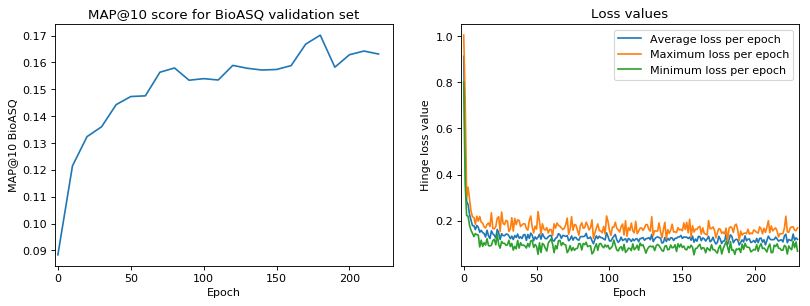

In [136]:
scale_by_steps=lambda x: x# list(map(lambda y:y*8,x))

figure(num=None, figsize=(12, 4), dpi=80, facecolor='w', edgecolor='k')

diff_val_test = 0.01700594686722892 #0#0.03790193327418298#0.01700594686722892
map_bioasq_validation_shift = [(i,v-diff_val_test) for (i,v) in map_bioasq_validation]

x_validation, y_validaiton = list(zip(*map_bioasq_validation_shift))

plt.subplot(1, 2, 1)

plt.plot(scale_by_steps(x_validation), y_validaiton, '-')
#plt.plot(x_test, y_test,  '-')
plt.xlim((-2,230))


plt.title("MAP@10 score for BioASQ validation set")
plt.xlabel("Epoch")
plt.ylabel("MAP@10 BioASQ")

plt.subplot(1, 2, 2)



x_loss, y_loss = list(zip(*avg_loss))
x_max_loss, y_max_loss = list(zip(*max_loss))
x_min_loss, y_min_loss = list(zip(*min_loss))

plt.plot(scale_by_steps(x_loss), y_loss, '-')
plt.plot(scale_by_steps(x_max_loss), y_max_loss, '-')
plt.plot(scale_by_steps(x_min_loss), y_min_loss, '-')
#plt.legend(["Validation"])

plt.xlim((-2,230))

#plt.axis([0, 950, 0, 1])

plt.legend(["Average loss per epoch","Maximum loss per epoch","Minimum loss per epoch"])

plt.title("Loss values")
plt.xlabel("Epoch")
plt.ylabel("Hinge loss value")



In [118]:
har_output = """
Step: 7 | loss: 0.9999068 | current max loss: 1.0000179 | current min loss: 0.9998466 | time: 4.0773279666900635184
Predict query: 81
TEST set, len  79
MAP @10 bioASQ: 0.004641350210970465
MAP @25: 0.006070655932943393
MAP @50: 0.007180333511534399
MAP @100: 0.008957088757646515
MAP @200: 0.011835962089100304
MAP @300: 0.013311629837215512
MAP: 0.018925127286509552
RECALL@10: 0.03703079934288114
RECALL@50: 0.08925442310106156
RECALL@100: 0.1646975411274574
Epoach: 0 | avg loss: 0.9999656 | max loss: 1.0000179 | min loss: 0.9998466
Epoach: 1 | avg loss: 0.9997522 | max loss: 0.99988616 | min loss: 0.999530260.99953026 | time: 4.07522320747375596
Epoach: 2 | avg loss: 0.9994706 | max loss: 0.9997447 | min loss: 0.9991375 0.9991375 | time: 4.098817110061645552
Epoach: 3 | avg loss: 0.9992447 | max loss: 0.9998226 | min loss: 0.9990457 0.9990457 | time: 4.12006115913391189
Epoach: 4 | avg loss: 0.9986829 | max loss: 0.99925464 | min loss: 0.99808854 0.99808854 | time: 4.139498472213745
Epoach: 5 | avg loss: 0.99830914 | max loss: 0.99925715 | min loss: 0.99746280.9974628 | time: 4.136580467224121
Epoach: 6 | avg loss: 0.99624944 | max loss: 0.9969932 | min loss: 0.99525490.9952549 | time: 4.09851288795471263
Epoach: 7 | avg loss: 0.9901439 | max loss: 0.9959098 | min loss: 0.9856742: 0.9856742 | time: 4.100876569747925
Epoach: 8 | avg loss: 0.9431498 | max loss: 0.98253506 | min loss: 0.83836037 0.83836037 | time: 4.1365191936492925
Epoach: 9 | avg loss: 0.76190865 | max loss: 0.87792087 | min loss: 0.565477550.56547755 | time: 4.078354597091675
Step: 7 | loss: 0.4438497 | current max loss: 0.59998876 | current min loss: 0.4438497 | time: 4.12343263626098665
Predict query: 81
TEST set, len  79
MAP @10 bioASQ: 0.009697106690777578
MAP @25: 0.010934261494995089
MAP @50: 0.012525447871446613
MAP @100: 0.015434354996521592
MAP @200: 0.018907926089249547
MAP @300: 0.021512515223084217
MAP: 0.04226938596778992
RECALL@10: 0.07022593531949613
RECALL@50: 0.12562367084135181
RECALL@100: 0.2143090930430529
Epoach: 10 | avg loss: 0.55097747 | max loss: 0.59998876 | min loss: 0.4438497
Epoach: 11 | avg loss: 0.5341597 | max loss: 0.602711 | min loss: 0.47441366.47441366 | time: 4.0582401752471921025
Epoach: 12 | avg loss: 0.5116685 | max loss: 0.6330652 | min loss: 0.41089510.4108951 | time: 4.112201929092407321
Epoach: 13 | avg loss: 0.51788247 | max loss: 0.6102243 | min loss: 0.4541813.4541813 | time: 4.064067602157593507
Epoach: 14 | avg loss: 0.5019046 | max loss: 0.5609414 | min loss: 0.439873550.43987355 | time: 4.1080214977264498
Epoach: 15 | avg loss: 0.45651892 | max loss: 0.53618026 | min loss: 0.33508220.3350822 | time: 4.0661511421203615
Epoach: 16 | avg loss: 0.47250926 | max loss: 0.55492663 | min loss: 0.35105038.35105038 | time: 4.082173585891724
Epoach: 17 | avg loss: 0.45191312 | max loss: 0.52046704 | min loss: 0.35992253.35992253 | time: 4.0724556446075444
Epoach: 18 | avg loss: 0.47986138 | max loss: 0.62113297 | min loss: 0.36782363.36782363 | time: 4.0957212448120125
Predict query: 81.4694698 | current max loss: 0.47978386 | current min loss: 0.4694698 | time: 4.09495615959167527
TEST set, len  79
MAP @10 bioASQ: 0.010407373920032147
MAP @25: 0.014251522884591031
MAP @50: 0.01783005378590862
MAP @100: 0.023311398150647575
MAP @200: 0.02868279809153396
MAP @300: 0.031226726242336172
MAP: 0.04319823827548491
RECALL@10: 0.07598856228465474
RECALL@50: 0.16658494196280593
RECALL@100: 0.2491154656590018
Epoach: 20 | avg loss: 0.4459644 | max loss: 0.52041954 | min loss: 0.39520702
Epoach: 21 | avg loss: 0.47311693 | max loss: 0.54269296 | min loss: 0.36532864.36532864 | time: 4.073443651199341
Epoach: 22 | avg loss: 0.4465195 | max loss: 0.50966376 | min loss: 0.387920530.38792053 | time: 4.076271057128906
Epoach: 23 | avg loss: 0.46963614 | max loss: 0.53816557 | min loss: 0.35535340.3553534 | time: 4.0791003704071045
Epoach: 24 | avg loss: 0.4575225 | max loss: 0.533234 | min loss: 0.391445 0.391445 | time: 4.10676741600036675617
Epoach: 25 | avg loss: 0.43265116 | max loss: 0.4884477 | min loss: 0.35744235.35744235 | time: 4.07825565338134855
Epoach: 26 | avg loss: 0.44054914 | max loss: 0.48648366 | min loss: 0.4011197.4011197 | time: 4.071771144866943314
Epoach: 27 | avg loss: 0.45433438 | max loss: 0.49865425 | min loss: 0.3862381638623816 | time: 4.13943362236022955
Epoach: 28 | avg loss: 0.44101632 | max loss: 0.5343235 | min loss: 0.3459974234599742 | time: 4.09174060821533222
Epoach: 29 | avg loss: 0.44654363 | max loss: 0.48635963 | min loss: 0.39396322.39396322 | time: 4.0991132259368925
Step: 7 | loss: 0.40174958 | current max loss: 0.5086353 | current min loss: 0.3780139 | time: 4.0775685310363776
Predict query: 81
TEST set, len  79
MAP @10 bioASQ: 0.01069971870604782
MAP @25: 0.014129172583241565
MAP @50: 0.01794437772696219
MAP @100: 0.022683561505944225
MAP @200: 0.028307810057456945
MAP @300: 0.031178031517373597
MAP: 0.049333082682009484
RECALL@10: 0.07099489210111114
RECALL@50: 0.18547343744965616
RECALL@100: 0.252687329093131
Epoach: 30 | avg loss: 0.44171858 | max loss: 0.5086353 | min loss: 0.3780139
Epoach: 31 | avg loss: 0.4483081 | max loss: 0.5524304 | min loss: 0.36387030.3638703 | time: 4.058098316192627856
Epoach: 32 | avg loss: 0.43771872 | max loss: 0.56838316 | min loss: 0.342857874285787 | time: 4.086220264434814585
Epoach: 33 | avg loss: 0.42811802 | max loss: 0.56559026 | min loss: 0.3222798.3222798 | time: 4.04639744758606246
Epoach: 34 | avg loss: 0.4532496 | max loss: 0.5107726 | min loss: 0.42537203.42537203 | time: 4.113814115524292445
Epoach: 35 | avg loss: 0.44070607 | max loss: 0.5834384 | min loss: 0.3149807531498075 | time: 4.07292866706848145
Epoach: 36 | avg loss: 0.47290957 | max loss: 0.5564854 | min loss: 0.39067170.3906717 | time: 4.10346770286560182
Epoach: 37 | avg loss: 0.4631014 | max loss: 0.5062106 | min loss: 0.410783050.41078305 | time: 4.08684825897216864
Epoach: 38 | avg loss: 0.44971597 | max loss: 0.544528 | min loss: 0.3683284236832842 | time: 4.0936141014099126365
Epoach: 39 | avg loss: 0.44594622 | max loss: 0.5557155 | min loss: 0.3997906.3997906 | time: 4.07918167114257885
Step: 7 | loss: 0.41705745 | current max loss: 0.46243727 | current min loss: 0.36915344 | time: 4.099081754684448
Predict query: 81
TEST set, len  79
MAP @10 bioASQ: 0.015150693188667873
MAP @25: 0.01850770148481308
MAP @50: 0.024114806157700275
MAP @100: 0.029885378108708675
MAP @200: 0.034508890097663426
MAP @300: 0.03748033042990794
MAP: 0.0581258443072789
RECALL@10: 0.08180483370356788
RECALL@50: 0.18354436905098784
RECALL@100: 0.27035255803779684
Epoach: 40 | avg loss: 0.42279518 | max loss: 0.46243727 | min loss: 0.36915344
Epoach: 41 | avg loss: 0.4399809 | max loss: 0.5147463 | min loss: 0.3646476 0.3646476 | time: 4.11259651184082761
Epoach: 42 | avg loss: 0.42695677 | max loss: 0.5188213 | min loss: 0.32078707.32078707 | time: 4.0913400650024415
Epoach: 43 | avg loss: 0.43944818 | max loss: 0.51110524 | min loss: 0.33268228.33268228 | time: 4.1057696342468265
Epoach: 44 | avg loss: 0.43390208 | max loss: 0.5038674 | min loss: 0.34752393.34752393 | time: 4.0909051895141645
Epoach: 45 | avg loss: 0.44281176 | max loss: 0.5292982 | min loss: 0.38249385.38249385 | time: 4.0884432792663575
Epoach: 46 | avg loss: 0.45138067 | max loss: 0.5706488 | min loss: 0.3913775.3913775 | time: 4.08470463752746669
Epoach: 47 | avg loss: 0.42961478 | max loss: 0.52138495 | min loss: 0.36168540.3616854 | time: 4.1185314655303955
Epoach: 48 | avg loss: 0.46492702 | max loss: 0.501955 | min loss: 0.38450770.3845077 | time: 4.108451604843146936
Epoach: 49 | avg loss: 0.4731167 | max loss: 0.53755015 | min loss: 0.40228477.40228477 | time: 4.15160107612609925
Step: 7 | loss: 0.52033466 | current max loss: 0.52033466 | current min loss: 0.41956213 | time: 4.0808908939361575
Predict query: 81
TEST set, len  79
MAP @10 bioASQ: 0.015145167771750052
MAP @25: 0.01912864386164241
MAP @50: 0.02434140528945739
MAP @100: 0.029370008730898324
MAP @200: 0.03492612169007724
MAP @300: 0.037655545405691306
MAP: 0.06859660588596303
RECALL@10: 0.08467389945100456
RECALL@50: 0.18919722197681818
RECALL@100: 0.27227440552926463
Epoach: 50 | avg loss: 0.47027463 | max loss: 0.52033466 | min loss: 0.41956213

Epoach: 51 | avg loss: 0.46948433 | max loss: 0.51760983 | min loss: 0.34422597.34422597 | time: 4.101299285888672
Epoach: 52 | avg loss: 0.431451 | max loss: 0.4714445 | min loss: 0.3976956 0.3976956 | time: 4.077629089355469836
Epoach: 53 | avg loss: 0.44243973 | max loss: 0.5139876 | min loss: 0.35943228.35943228 | time: 4.0946240425109865
Epoach: 54 | avg loss: 0.42492357 | max loss: 0.5054831 | min loss: 0.3363514.3363514 | time: 4.082793951034546525
Epoach: 55 | avg loss: 0.4461637 | max loss: 0.50252485 | min loss: 0.417214040.41721404 | time: 4.100287199020386
Epoach: 56 | avg loss: 0.4738482 | max loss: 0.50607985 | min loss: 0.406682: 0.406682 | time: 4.091760635375977055
Epoach: 57 | avg loss: 0.4054633 | max loss: 0.47596794 | min loss: 0.374825330.37482533 | time: 4.119643449783325
Epoach: 58 | avg loss: 0.42678285 | max loss: 0.52278763 | min loss: 0.34420475.34420475 | time: 4.075857162475586
Epoach: 59 | avg loss: 0.4287005 | max loss: 0.51542574 | min loss: 0.33950310.3395031 | time: 4.072401523590088945
Step: 7 | loss: 0.48632494 | current max loss: 0.51114625 | current min loss: 0.330275 | time: 4.099639892578125285
Predict query: 81
TEST set, len  79
MAP @10 bioASQ: 0.015172292545710269
MAP @25: 0.018842134323636853
MAP @50: 0.02395424336026654
MAP @100: 0.029472979446981046
MAP @200: 0.0350050792802533
MAP @300: 0.03805346856458922
MAP: 0.062038335703718195
RECALL@10: 0.08467389945100456
RECALL@50: 0.1859678987505364
RECALL@100: 0.26069717031416473
Epoach: 60 | avg loss: 0.45790267 | max loss: 0.51114625 | min loss: 0.330275
Epoach: 61 | avg loss: 0.4155563 | max loss: 0.47899902 | min loss: 0.358299430.35829943 | time: 4.084604263305664
Epoach: 62 | avg loss: 0.4118357 | max loss: 0.49329093 | min loss: 0.37435750.3743575 | time: 4.091809749603271545
Epoach: 63 | avg loss: 0.42430833 | max loss: 0.57240343 | min loss: 0.34471858.34471858 | time: 4.0950319766998295
Epoach: 64 | avg loss: 0.42607695 | max loss: 0.47709215 | min loss: 0.38165873.38165873 | time: 4.0801835060119635
Epoach: 65 | avg loss: 0.42659074 | max loss: 0.49991438 | min loss: 0.33296287.33296287 | time: 4.096298933029175
Epoach: 66 | avg loss: 0.41077158 | max loss: 0.4780805 | min loss: 0.31294215.31294215 | time: 4.094760179519653
Epoach: 67 | avg loss: 0.42831123 | max loss: 0.50835186 | min loss: 0.29278390.2927839 | time: 4.14363288879394545
Epoach: 68 | avg loss: 0.4441116 | max loss: 0.5400259 | min loss: 0.34354934.34354934 | time: 4.08643841743469225
Epoach: 69 | avg loss: 0.4161329 | max loss: 0.49342248 | min loss: 0.299513040.29951304 | time: 4.1228365898132326
Step: 7 | loss: 0.4467281 | current max loss: 0.48319006 | current min loss: 0.32517156 | time: 4.0936405658721922
Predict query: 81
TEST set, len  79
MAP @10 bioASQ: 0.016323588507132808
MAP @25: 0.01974414821548105
MAP @50: 0.023696142137801253
MAP @100: 0.029450264707351747
MAP @200: 0.034742960624870645
MAP @300: 0.038433999604018394
MAP: 0.05796376122807053
RECALL@10: 0.0940242537380677
RECALL@50: 0.17644946285164398
RECALL@100: 0.26710312407550485
Epoach: 70 | avg loss: 0.42361778 | max loss: 0.48319006 | min loss: 0.32517156
Epoach: 71 | avg loss: 0.39342967 | max loss: 0.44105417 | min loss: 0.3490226634902266 | time: 4.08688807487487824
Epoach: 72 | avg loss: 0.423362 | max loss: 0.5402341 | min loss: 0.35398903 0.35398903 | time: 4.07918691635131865
Epoach: 73 | avg loss: 0.39836854 | max loss: 0.44692013 | min loss: 0.32632160.3263216 | time: 4.1265921592712433
Epoach: 74 | avg loss: 0.43056726 | max loss: 0.52553844 | min loss: 0.36055723.36055723 | time: 4.0747034549713135
Epoach: 75 | avg loss: 0.41751313 | max loss: 0.51731414 | min loss: 0.34150445.34150445 | time: 4.1096916198730475
Epoach: 76 | avg loss: 0.4087047 | max loss: 0.48234788 | min loss: 0.33419740.3341974 | time: 4.06239986419677719
Epoach: 77 | avg loss: 0.38459748 | max loss: 0.4462993 | min loss: 0.32283646.32283646 | time: 4.0483539104461675
Epoach: 78 | avg loss: 0.43810815 | max loss: 0.50746167 | min loss: 0.35510385.35510385 | time: 4.1175978183746345
Epoach: 79 | avg loss: 0.39920062 | max loss: 0.4154222 | min loss: 0.38057238.38057238 | time: 4.1061069965362556
Step: 7 | loss: 0.2945127 | current max loss: 0.4200655 | current min loss: 0.2945127 | time: 4.11581134796142655
Predict query: 81
TEST set, len  79
MAP @10 bioASQ: 0.012250351617440225
MAP @25: 0.01599217566678134
MAP @50: 0.02149475552787168
MAP @100: 0.026932970530676524
MAP @200: 0.03226826517085233
MAP @300: 0.03528444599671928
MAP: 0.05136274711295351
RECALL@10: 0.09240523281524933
RECALL@50: 0.18674518813650695
RECALL@100: 0.2789198292976933
Epoach: 80 | avg loss: 0.37543517 | max loss: 0.4200655 | min loss: 0.2945127
Epoach: 81 | avg loss: 0.37216857 | max loss: 0.41947198 | min loss: 0.29680547.29680547 | time: 4.1227588653564455
Epoach: 82 | avg loss: 0.39602605 | max loss: 0.4601932 | min loss: 0.33478698.33478698 | time: 4.1249506473541261
Epoach: 83 | avg loss: 0.3725102 | max loss: 0.42331496 | min loss: 0.313405480.31340548 | time: 4.085369110107422
Epoach: 84 | avg loss: 0.34428898 | max loss: 0.37923235 | min loss: 0.2958861629588616 | time: 4.1169035434722932
Epoach: 85 | avg loss: 0.3824906 | max loss: 0.48260584 | min loss: 0.27917618.27917618 | time: 4.10554790496826245
Epoach: 86 | avg loss: 0.3649138 | max loss: 0.40851763 | min loss: 0.322905480.32290548 | time: 4.115839958190918
Epoach: 87 | avg loss: 0.36859834 | max loss: 0.46698296 | min loss: 0.28551114.28551114 | time: 4.0957047939300545
Epoach: 88 | avg loss: 0.36512977 | max loss: 0.4595054 | min loss: 0.31667766.31667766 | time: 4.0705633163452159
Epoach: 89 | avg loss: 0.40154433 | max loss: 0.48024723 | min loss: 0.34878270.3487827 | time: 4.1064009666442875
Step: 7 | loss: 0.29735145 | current max loss: 0.4218704 | current min loss: 0.2735 | time: 4.095411062240601033
Predict query: 81
TEST set, len  79
MAP @10 bioASQ: 0.013214788024914605
MAP @25: 0.019278164181728043
MAP @50: 0.02329734309198091
MAP @100: 0.03188450094195453
MAP @200: 0.03718653767035855
MAP @300: 0.04034667539271919
MAP: 0.0465835582098653
RECALL@10: 0.08725500329793119
RECALL@50: 0.20306312272921492
RECALL@100: 0.3026604171205597
Epoach: 90 | avg loss: 0.34369412 | max loss: 0.4218704 | min loss: 0.2735
Epoach: 91 | avg loss: 0.36725068 | max loss: 0.41486832 | min loss: 0.3118965.3118965 | time: 4.0885527133941652
Epoach: 92 | avg loss: 0.3793912 | max loss: 0.44209436 | min loss: 0.2924949 0.2924949 | time: 4.0904014110565186
Epoach: 93 | avg loss: 0.35793942 | max loss: 0.4190132 | min loss: 0.3093377630933776 | time: 4.123785495758057535
Epoach: 94 | avg loss: 0.37532812 | max loss: 0.44915953 | min loss: 0.33192486.33192486 | time: 4.1154005527496345
Epoach: 95 | avg loss: 0.36923254 | max loss: 0.4823826 | min loss: 0.3051138830511388 | time: 4.09748435020446828
Epoach: 96 | avg loss: 0.37480572 | max loss: 0.4437546 | min loss: 0.32430282.32430282 | time: 4.1063799858093265
Epoach: 97 | avg loss: 0.34625453 | max loss: 0.43882418 | min loss: 0.29017872901787 | time: 4.088528394699097091
Epoach: 98 | avg loss: 0.33781773 | max loss: 0.4023924 | min loss: 0.28539506.28539506 | time: 4.065295457839966
Epoach: 99 | avg loss: 0.35012275 | max loss: 0.45157656 | min loss: 0.2866539.2866539 | time: 4.082809448242187515
Step: 7 | loss: 0.3858675 | current max loss: 0.3858675 | current min loss: 0.27637216 | time: 4.08616828918457523
Predict query: 81
TEST set, len  79
MAP @10 bioASQ: 0.01744675507333736
MAP @25: 0.0223909053096415
MAP @50: 0.027486759498217366
MAP @100: 0.0351547606947146
MAP @200: 0.04034575229688871
MAP @300: 0.04357661500505777
MAP: 0.06156495162990832
RECALL@10: 0.0995554134961197
RECALL@50: 0.1924558839104939
RECALL@100: 0.2970795223324696
Epoach: 100 | avg loss: 0.32383466 | max loss: 0.3858675 | min loss: 0.27637216
Epoach: 101 | avg loss: 0.33117408 | max loss: 0.44249076 | min loss: 0.2633443226334432 | time: 4.0567831993103035
Epoach: 102 | avg loss: 0.37250382 | max loss: 0.43259332 | min loss: 0.3183751.3183751 | time: 4.10581898689278965

Epoach: 103 | avg loss: 0.32563487 | max loss: 0.38209397 | min loss: 0.2590981725909817 | time: 4.1154434680938725
Epoach: 104 | avg loss: 0.36174148 | max loss: 0.39712748 | min loss: 0.319688861968886 | time: 4.10048675537109445
Epoach: 105 | avg loss: 0.3765058 | max loss: 0.4281846 | min loss: 0.3175946831759468 | time: 4.1132142543792725
Epoach: 106 | avg loss: 0.35587472 | max loss: 0.4235112 | min loss: 0.3099613530996135 | time: 4.0876524448394775
Epoach: 107 | avg loss: 0.33411694 | max loss: 0.39640218 | min loss: 0.2224225.2224225 | time: 4.1280879974365232
Epoach: 108 | avg loss: 0.35930446 | max loss: 0.4122464 | min loss: 0.3085161.3085161 | time: 4.0506255626678476
Epoach: 109 | avg loss: 0.34274554 | max loss: 0.395785 | min loss: 0.2703157427031574 | time: 4.093558549880981464
Step: 7 | loss: 0.3477659 | current max loss: 0.38112137 | current min loss: 0.26191828 | time: 4.1010317802429275
Predict query: 81
TEST set, len  79
MAP @10 bioASQ: 0.01292646172393008
MAP @25: 0.018569064012846588
MAP @50: 0.02252780679057438
MAP @100: 0.030513496630205642
MAP @200: 0.03637549513414533
MAP @300: 0.039837199336685065
MAP: 0.046502671027987476
RECALL@10: 0.09088738265953455
RECALL@50: 0.20550337050423947
RECALL@100: 0.29864904764087913
Epoach: 110 | avg loss: 0.33141547 | max loss: 0.38112137 | min loss: 0.26191828
Epoach: 111 | avg loss: 0.32219166 | max loss: 0.37339693 | min loss: 0.2547525825475258 | time: 4.1211371421813965
Epoach: 112 | avg loss: 0.3494802 | max loss: 0.40942627 | min loss: 0.30433595.30433595 | time: 4.109554767608643
Epoach: 113 | avg loss: 0.31260428 | max loss: 0.36454257 | min loss: 0.2521857.2521857 | time: 4.085524559020996
Epoach: 114 | avg loss: 0.34422022 | max loss: 0.37534457 | min loss: 0.3179391331793913 | time: 4.099982023239136
Epoach: 115 | avg loss: 0.33960792 | max loss: 0.45520517 | min loss: 0.252172565217256 | time: 4.07994842529296915
Epoach: 116 | avg loss: 0.30872306 | max loss: 0.34630847 | min loss: 0.2595105.2595105 | time: 4.0864634513854981
Epoach: 117 | avg loss: 0.33123046 | max loss: 0.38119784 | min loss: 0.2487051524870515 | time: 4.0849080085754395
Epoach: 118 | avg loss: 0.30501348 | max loss: 0.37207502 | min loss: 0.2384809123848091 | time: 4.095370292663574
Epoach: 119 | avg loss: 0.32655635 | max loss: 0.42092675 | min loss: 0.25359952535995 | time: 4.072819948196411375
Step: 7 | loss: 0.31189856 | current max loss: 0.34781608 | current min loss: 0.27455553 | time: 4.0522501468658455
Predict query: 81
TEST set, len  79
MAP @10 bioASQ: 0.014555455093429774
MAP @25: 0.01880609929195143
MAP @50: 0.025756519478209887
MAP @100: 0.03291904578424254
MAP @200: 0.0383355578758027
MAP @300: 0.0414781193302264
MAP: 0.05959470909424908
RECALL@10: 0.108903572369595
RECALL@50: 0.23867042202680766
RECALL@100: 0.3477051552807571
Epoach: 120 | avg loss: 0.3103026 | max loss: 0.34781608 | min loss: 0.27455553
Epoach: 121 | avg loss: 0.306818 | max loss: 0.3693648 | min loss: 0.218423590.21842359 | time: 4.0666999816894539
Epoach: 122 | avg loss: 0.30240685 | max loss: 0.34651563 | min loss: 0.2628145826281458 | time: 4.0862283706665045
Epoach: 123 | avg loss: 0.31030142 | max loss: 0.38887098 | min loss: 0.2451672624516726 | time: 4.112145423889165
Epoach: 124 | avg loss: 0.29385358 | max loss: 0.3522325 | min loss: 0.255831425583142 | time: 4.09848666191101162
Epoach: 125 | avg loss: 0.30841142 | max loss: 0.33812186 | min loss: 0.2697112.2697112 | time: 4.107103109359741
Epoach: 126 | avg loss: 0.29954576 | max loss: 0.35586074 | min loss: 0.197578399757839 | time: 4.0879592895507819
Epoach: 127 | avg loss: 0.29492348 | max loss: 0.3854974 | min loss: 0.2521855225218552 | time: 4.0854640007019045
Epoach: 128 | avg loss: 0.27706802 | max loss: 0.35119095 | min loss: 0.2069861120698611 | time: 4.116545200347965
Epoach: 129 | avg loss: 0.31809235 | max loss: 0.389073 | min loss: 0.25187452518745 | time: 4.138366699218756909
Step: 7 | loss: 0.36115688 | current max loss: 0.37121764 | current min loss: 0.25204867 | time: 4.093933820724487
Predict query: 81
TEST set, len  79
MAP @10 bioASQ: 0.010607795860960419
MAP @25: 0.016132677476651914
MAP @50: 0.02093006603918388
MAP @100: 0.02664855032050349
MAP @200: 0.03252754951526891
MAP @300: 0.03601957240378746
MAP: 0.04539116994979753
RECALL@10: 0.10383274657092112
RECALL@50: 0.2627703909957769
RECALL@100: 0.37684878999509824
Epoach: 130 | avg loss: 0.32103163 | max loss: 0.37121764 | min loss: 0.25204867
Epoach: 131 | avg loss: 0.296925 | max loss: 0.32018724 | min loss: 0.213676810.21367681 | time: 4.094275712966919
Epoach: 132 | avg loss: 0.28933236 | max loss: 0.33984232 | min loss: 0.1952958919529589 | time: 4.086160659790039
Epoach: 133 | avg loss: 0.30056515 | max loss: 0.354241 | min loss: 0.249259714925971 | time: 4.0926787853240978515
Epoach: 134 | avg loss: 0.3098245 | max loss: 0.41398406 | min loss: 0.27033243.27033243 | time: 4.144645452499393
Epoach: 135 | avg loss: 0.28585845 | max loss: 0.35471985 | min loss: 0.21935512193551 | time: 4.0869417190551769
Epoach: 136 | avg loss: 0.29566795 | max loss: 0.34623376 | min loss: 0.2414076224140762 | time: 4.094833850860596
Epoach: 137 | avg loss: 0.2753385 | max loss: 0.33574048 | min loss: 0.23626873.23626873 | time: 4.070320367813116
Epoach: 138 | avg loss: 0.2912779 | max loss: 0.32974508 | min loss: 0.2361645823616458 | time: 4.1227929592132578
Epoach: 139 | avg loss: 0.3033116 | max loss: 0.35854998 | min loss: 0.2413926624139266 | time: 4.0892384052276615
Step: 7 | loss: 0.28662738 | current max loss: 0.3845298 | current min loss: 0.24975243 | time: 4.0717442035675052
Predict query: 81
TEST set, len  79
MAP @10 bioASQ: 0.017164456499899537
MAP @25: 0.022836572804934906
MAP @50: 0.028093682634347382
MAP @100: 0.03504377967673131
MAP @200: 0.0408013632380803
MAP @300: 0.044107553898998106
MAP: 0.06864217861677889
RECALL@10: 0.11281958658707493
RECALL@50: 0.2532847927610115
RECALL@100: 0.37152624798143724
Epoach: 140 | avg loss: 0.2915035 | max loss: 0.3845298 | min loss: 0.24975243
Epoach: 141 | avg loss: 0.28946877 | max loss: 0.38976002 | min loss: 0.2293439422934394 | time: 4.091121196746826
Epoach: 142 | avg loss: 0.27115023 | max loss: 0.3072774 | min loss: 0.239284723928472 | time: 4.09462523460388255
Epoach: 143 | avg loss: 0.25675368 | max loss: 0.3426455 | min loss: 0.19998931999893 | time: 4.06336331367492784
Epoach: 144 | avg loss: 0.2620822 | max loss: 0.28942767 | min loss: 0.23288925.23288925 | time: 4.0864031314849855
Epoach: 145 | avg loss: 0.26950803 | max loss: 0.3356374 | min loss: 0.2248153822481538 | time: 4.0942220687866216
Epoach: 146 | avg loss: 0.2667802 | max loss: 0.30002895 | min loss: 0.20483892.20483892 | time: 4.0817351341247565
Epoach: 147 | avg loss: 0.25946608 | max loss: 0.31046918 | min loss: 0.2107595821075958 | time: 4.080127716064453
Epoach: 148 | avg loss: 0.276295 | max loss: 0.33110988 | min loss: 0.231645050.23164505 | time: 4.0892393589019775
Epoach: 149 | avg loss: 0.26721925 | max loss: 0.3288476 | min loss: 0.190426839042683 | time: 4.10375213623046901
Step: 7 | loss: 0.23553741 | current max loss: 0.2899956 | current min loss: 0.23509118 | time: 4.0888226032257084
Predict query: 81
TEST set, len  79
MAP @10 bioASQ: 0.015445047217199115
MAP @25: 0.02349753003853893
MAP @50: 0.029660685896053463
MAP @100: 0.03589848048390055
MAP @200: 0.04261139545856841
MAP @300: 0.04624185807961136
MAP: 0.0722638463394626
RECALL@10: 0.11777924311235435
RECALL@50: 0.2489590136101157
RECALL@100: 0.3582706180535887
Epoach: 150 | avg loss: 0.25554848 | max loss: 0.2899956 | min loss: 0.23509118
Epoach: 151 | avg loss: 0.2919504 | max loss: 0.3281253 | min loss: 0.25586936.25586936 | time: 4.0668120384216316
Epoach: 152 | avg loss: 0.2696312 | max loss: 0.3084352 | min loss: 0.21512158.21512158 | time: 4.1119139194488525
Epoach: 153 | avg loss: 0.27074444 | max loss: 0.32984325 | min loss: 0.233540253354025 | time: 4.0879817008972174
Epoach: 154 | avg loss: 0.275848 | max loss: 0.35540622 | min loss: 0.23591623.23591623 | time: 4.0977501869201669

Epoach: 155 | avg loss: 0.26395836 | max loss: 0.28350163 | min loss: 0.2079780820797808 | time: 4.119190216064453
Epoach: 156 | avg loss: 0.2430537 | max loss: 0.27793616 | min loss: 0.18441603.18441603 | time: 4.062939882278442
Epoach: 157 | avg loss: 0.2553147 | max loss: 0.32257822 | min loss: 0.20040652.20040652 | time: 4.1239666938781745
Epoach: 158 | avg loss: 0.2597445 | max loss: 0.29651287 | min loss: 0.22125617.22125617 | time: 4.075632095336914
Epoach: 159 | avg loss: 0.28044274 | max loss: 0.36386847 | min loss: 0.2064179.2064179 | time: 4.09612393379211455
Step: 7 | loss: 0.21968067 | current max loss: 0.31333923 | current min loss: 0.21968067 | time: 4.1052703857421875
Predict query: 81
TEST set, len  79
MAP @10 bioASQ: 0.019561482820976493
MAP @25: 0.028411934942643366
MAP @50: 0.03503393965875059
MAP @100: 0.04086206551658496
MAP @200: 0.04648665894316095
MAP @300: 0.049362077159853274
MAP: 0.0675690803788441
RECALL@10: 0.11787680729219703
RECALL@50: 0.2751071296963166
RECALL@100: 0.36992429582956193
Epoach: 160 | avg loss: 0.2611935 | max loss: 0.31333923 | min loss: 0.21968067
Epoach: 161 | avg loss: 0.25164872 | max loss: 0.27962634 | min loss: 0.2167542621675426 | time: 4.1230781078338625
Epoach: 162 | avg loss: 0.25281554 | max loss: 0.29772973 | min loss: 0.205011030501103 | time: 4.0653831958770759
Epoach: 163 | avg loss: 0.24073103 | max loss: 0.29576626 | min loss: 0.170641827064182 | time: 4.0919628143310555
Epoach: 164 | avg loss: 0.24063352 | max loss: 0.33846313 | min loss: 0.1712154417121544 | time: 4.0665016174316415
Epoach: 165 | avg loss: 0.25370938 | max loss: 0.2884165 | min loss: 0.2041873620418736 | time: 4.0854799747467045
Epoach: 166 | avg loss: 0.25801843 | max loss: 0.2986494 | min loss: 0.2071974.2071974 | time: 4.112434625625615455
Epoach: 167 | avg loss: 0.24971849 | max loss: 0.28659678 | min loss: 0.199470829947082 | time: 4.06145572662353525
Epoach: 168 | avg loss: 0.24832718 | max loss: 0.2904839 | min loss: 0.1752632317526323 | time: 4.0939731597900393
Epoach: 169 | avg loss: 0.23226276 | max loss: 0.26264033 | min loss: 0.1958257619582576 | time: 4.0850722789764445
Step: 7 | loss: 0.23006405 | current max loss: 0.29000187 | current min loss: 0.22949788 | time: 4.115551233291626
Predict query: 81
TEST set, len  79
MAP @10 bioASQ: 0.019952782800884066
MAP @25: 0.02789319800845067
MAP @50: 0.03413718999004377
MAP @100: 0.040564340476350075
MAP @200: 0.0461740451200751
MAP @300: 0.04912742471720537
MAP: 0.06380385570780381
RECALL@10: 0.10264784940363542
RECALL@50: 0.2661326481405125
RECALL@100: 0.3625749109921256
Epoach: 170 | avg loss: 0.251051 | max loss: 0.29000187 | min loss: 0.22949788
Epoach: 171 | avg loss: 0.25573403 | max loss: 0.30161086 | min loss: 0.1942524319425243 | time: 4.0848860740661625
Epoach: 172 | avg loss: 0.24363631 | max loss: 0.29882202 | min loss: 0.2123341621233416 | time: 4.1167399883270265
Epoach: 173 | avg loss: 0.24110335 | max loss: 0.3425554 | min loss: 0.1931501319315013 | time: 4.1472353935241716
Epoach: 174 | avg loss: 0.23573585 | max loss: 0.30651268 | min loss: 0.1941191119411911 | time: 4.093453884124756
Epoach: 175 | avg loss: 0.24319965 | max loss: 0.28821146 | min loss: 0.2171356221713562 | time: 4.101583957672119
Epoach: 176 | avg loss: 0.22943631 | max loss: 0.2878838 | min loss: 0.1921562.1921562 | time: 4.076495647430426325
Epoach: 177 | avg loss: 0.23414049 | max loss: 0.30712733 | min loss: 0.1307813513078135 | time: 4.1065907478332524
Epoach: 178 | avg loss: 0.23243052 | max loss: 0.3261012 | min loss: 0.182870678287067 | time: 4.08660006523132345
Epoach: 179 | avg loss: 0.24430986 | max loss: 0.29986286 | min loss: 0.2128289221282892 | time: 4.1208610534667974
Step: 7 | loss: 0.26696658 | current max loss: 0.2901142 | current min loss: 0.21973597 | time: 4.0690984725952155
Predict query: 81
TEST set, len  79
MAP @10 bioASQ: 0.022106188466947962
MAP @25: 0.028626277910289332
MAP @50: 0.033601719537327594
MAP @100: 0.04072111596827475
MAP @200: 0.04679128161569731
MAP @300: 0.05009536521469955
MAP: 0.07703595630810822
RECALL@10: 0.12528043335005357
RECALL@50: 0.25613535252833686
RECALL@100: 0.3812642091467802
Epoach: 180 | avg loss: 0.25193438 | max loss: 0.2901142 | min loss: 0.21973597
Epoach: 181 | avg loss: 0.24275805 | max loss: 0.34165224 | min loss: 0.1816440518164405 | time: 4.1226906776428225
Epoach: 182 | avg loss: 0.20877087 | max loss: 0.26463112 | min loss: 0.136139413613941 | time: 4.0417265892028811
Epoach: 183 | avg loss: 0.23746112 | max loss: 0.26335973 | min loss: 0.168523866852386 | time: 4.12783956527718185
Epoach: 184 | avg loss: 0.22682826 | max loss: 0.26285386 | min loss: 0.1808382618083826 | time: 4.1000366210937525
Epoach: 185 | avg loss: 0.23749542 | max loss: 0.2689902 | min loss: 0.20735659735659 | time: 4.155840635299683615
Epoach: 186 | avg loss: 0.24739274 | max loss: 0.30268368 | min loss: 0.2128968.2128968 | time: 4.0498702526092535
Epoach: 187 | avg loss: 0.21882841 | max loss: 0.2712826 | min loss: 0.1782289617822896 | time: 4.0976746082305911
Epoach: 188 | avg loss: 0.24134614 | max loss: 0.26820275 | min loss: 0.199280819928081 | time: 4.0910270214080819
Epoach: 189 | avg loss: 0.22483963 | max loss: 0.25341338 | min loss: 0.1888909518889095 | time: 4.108493804931641
Step: 7 | loss: 0.22087571 | current max loss: 0.3226528 | current min loss: 0.17859863 | time: 4.0624382495880135
Predict query: 81
TEST set, len  79
MAP @10 bioASQ: 0.023989853325296368
MAP @25: 0.03218516425780977
MAP @50: 0.03822836790849933
MAP @100: 0.045413178593990064
MAP @200: 0.05108209964131967
MAP @300: 0.053927882022027564
MAP: 0.0987980240240638
RECALL@10: 0.1505050856316679
RECALL@50: 0.28667508613906656
RECALL@100: 0.3895483973843328
Epoach: 190 | avg loss: 0.23457034 | max loss: 0.3226528 | min loss: 0.17859863
Epoach: 191 | avg loss: 0.22197792 | max loss: 0.27859437 | min loss: 0.1789405517894055 | time: 4.0774064064025884
Epoach: 192 | avg loss: 0.20869648 | max loss: 0.25009838 | min loss: 0.1809432418094324 | time: 4.096359491348267
Epoach: 193 | avg loss: 0.24078357 | max loss: 0.2878211 | min loss: 0.1929541219295412 | time: 4.0839855670928955
Epoach: 194 | avg loss: 0.22544909 | max loss: 0.27835375 | min loss: 0.1686384716863847 | time: 4.0768778324127275
Epoach: 195 | avg loss: 0.2352384 | max loss: 0.2869275 | min loss: 0.17795083.17795083 | time: 4.0672199726104748
Epoach: 196 | avg loss: 0.22615525 | max loss: 0.26076582 | min loss: 0.1990180.199018 | time: 4.076047182083136305
Epoach: 197 | avg loss: 0.22987223 | max loss: 0.26322785 | min loss: 0.1956272319562723 | time: 4.100222110748291
Epoach: 198 | avg loss: 0.2188704 | max loss: 0.24617873 | min loss: 0.1767124717671247 | time: 4.1045863628387458
Epoach: 199 | avg loss: 0.22387221 | max loss: 0.25228077 | min loss: 0.18903821890382 | time: 4.08673000335693464
Step: 7 | loss: 0.21937682 | current max loss: 0.25091994 | current min loss: 0.18547454 | time: 4.0935256481170655
Predict query: 81
TEST set, len  79
MAP @10 bioASQ: 0.02389089813140446
MAP @25: 0.03195119153499628
MAP @50: 0.03947872309327123
MAP @100: 0.04652657376151899
MAP @200: 0.05273964542039312
MAP @300: 0.055776402207158564
MAP: 0.08390930146807181
RECALL@10: 0.1684048335630614
RECALL@50: 0.3018316840960439
RECALL@100: 0.38875982570664375
Epoach: 200 | avg loss: 0.21485698 | max loss: 0.25091994 | min loss: 0.18547454
Epoach: 201 | avg loss: 0.22050431 | max loss: 0.28180283 | min loss: 0.1608759516087595 | time: 4.1238887310028085
Epoach: 202 | avg loss: 0.21793073 | max loss: 0.29622856 | min loss: 0.1525672115256721 | time: 4.0887510776519775
Epoach: 203 | avg loss: 0.24039203 | max loss: 0.32415426 | min loss: 0.1710832.1710832 | time: 4.1176011562347414
Epoach: 204 | avg loss: 0.19235113 | max loss: 0.29880056 | min loss: 0.1168738311687383 | time: 4.1193249225616455
Epoach: 205 | avg loss: 0.2119894 | max loss: 0.24638382 | min loss: 0.18232325.18232325 | time: 4.1002674102783245
Epoach: 206 | avg loss: 0.23177303 | max loss: 0.30421337 | min loss: 0.1869838118698381 | time: 4.105871915817261

Epoach: 207 | avg loss: 0.18882485 | max loss: 0.22223069 | min loss: 0.1588965415889654 | time: 4.1062886714935375
Epoach: 208 | avg loss: 0.23944803 | max loss: 0.27511638 | min loss: 0.2107782721077827 | time: 4.105455636978149
Epoach: 209 | avg loss: 0.21721336 | max loss: 0.27301624 | min loss: 0.1646326516463265 | time: 4.0687520503997855
Step: 7 | loss: 0.21847059 | current max loss: 0.28381935 | current min loss: 0.17132047 | time: 4.159021854400635
Predict query: 81
TEST set, len  79
MAP @10 bioASQ: 0.02117992766726944
MAP @25: 0.028487925682636455
MAP @50: 0.03632395291393341
MAP @100: 0.04273943532208728
MAP @200: 0.04890766220184554
MAP @300: 0.05172810113449359
MAP: 0.07096074284365425
RECALL@10: 0.14487484034952391
RECALL@50: 0.2933562170304343
RECALL@100: 0.39067004298408
Epoach: 210 | avg loss: 0.22186157 | max loss: 0.28381935 | min loss: 0.17132047
Epoach: 211 | avg loss: 0.21164265 | max loss: 0.26479593 | min loss: 0.1827032118270321 | time: 4.108653306961067
Epoach: 212 | avg loss: 0.20847747 | max loss: 0.218223 | min loss: 0.1875438718754387 | time: 4.096351385116577
Epoach: 213 | avg loss: 0.22734383 | max loss: 0.2509814 | min loss: 0.1855933818559338 | time: 4.0978138446807867
Epoach: 214 | avg loss: 0.24325767 | max loss: 0.2900492 | min loss: 0.2069384920693849 | time: 4.0773136615753171
Epoach: 215 | avg loss: 0.22925138 | max loss: 0.28534546 | min loss: 0.1736002417360024 | time: 4.100922346115112
Epoach: 216 | avg loss: 0.19782801 | max loss: 0.2245046 | min loss: 0.1566263.1566263 | time: 4.05412673950195345
Epoach: 217 | avg loss: 0.22120766 | max loss: 0.29966405 | min loss: 0.148540534854053 | time: 4.0711874961853035
Epoach: 218 | avg loss: 0.20980066 | max loss: 0.26890683 | min loss: 0.1841246318412463 | time: 4.0867760181427195
Epoach: 219 | avg loss: 0.19610064 | max loss: 0.24280882 | min loss: 0.14391981439198 | time: 4.12712979316711415
Step: 7 | loss: 0.17670804 | current max loss: 0.2721727 | current min loss: 0.16568711 | time: 4.06089782714843755
Predict query: 81
TEST set, len  79
MAP @10 bioASQ: 0.02231665662045409
MAP @25: 0.030165074054108815
MAP @50: 0.0369645649443655
MAP @100: 0.04510095079764638
MAP @200: 0.052040486578988125
MAP @300: 0.05504311344990641
MAP: 0.07467788661843815
RECALL@10: 0.12227066182762385
RECALL@50: 0.27652898751195526
RECALL@100: 0.3881600148733654
Epoach: 220 | avg loss: 0.21424203 | max loss: 0.2721727 | min loss: 0.16568711
Epoach: 221 | avg loss: 0.20771882 | max loss: 0.23642732 | min loss: 0.1550624815506248 | time: 4.063316345214844
Epoach: 222 | avg loss: 0.19086978 | max loss: 0.24358892 | min loss: 0.1581718215817182 | time: 4.0756464004516645
Epoach: 223 | avg loss: 0.20585966 | max loss: 0.23414285 | min loss: 0.1807631918076319 | time: 4.1164119243621835
Epoach: 224 | avg loss: 0.21077329 | max loss: 0.2632805 | min loss: 0.181574488157448 | time: 4.099187374114991865
Epoach: 225 | avg loss: 0.18357936 | max loss: 0.2348198 | min loss: 0.1553254115532541 | time: 4.1078937053680425
Epoach: 226 | avg loss: 0.196161 | max loss: 0.23889324 | min loss: 0.150718: 0.150718 | time: 4.06989765167236325
Epoach: 227 | avg loss: 0.20678899 | max loss: 0.2566196 | min loss: 0.16177994177994 | time: 4.071364164352417661
Epoach: 228 | avg loss: 0.18329757 | max loss: 0.22685741 | min loss: 0.118157454118157454 | time: 4.138075828552246
Epoach: 229 | avg loss: 0.21136189 | max loss: 0.25202405 | min loss: 0.1691911.1691911 | time: 4.124424457550049
Step: 7 | loss: 0.2417311 | current max loss: 0.2417311 | current min loss: 0.13439077 | time: 4.06522154808044486
Predict query: 81
TEST set, len  79
MAP @10 bioASQ: 0.021824894514767934
MAP @25: 0.030722628768727188
MAP @50: 0.03550575525497966
MAP @100: 0.0425673038197059
MAP @200: 0.049479552435803986
MAP @300: 0.052679064960211595
MAP: 0.07443853915824983
RECALL@10: 0.14233963294089874
RECALL@50: 0.28816711584366483
RECALL@100: 0.41195229742980527
Epoach: 230 | avg loss: 0.19219601 | max loss: 0.2417311 | min loss: 0.13439077
Epoach: 231 | avg loss: 0.21018781 | max loss: 0.24292733 | min loss: 0.1772355717723557 | time: 4.0634791851043745
Epoach: 232 | avg loss: 0.16297351 | max loss: 0.23433013 | min loss: 0.1349966513499665 | time: 4.1758544445037845
Epoach: 233 | avg loss: 0.18921341 | max loss: 0.27020174 | min loss: 0.1360716813607168 | time: 4.097584962844849
Epoach: 234 | avg loss: 0.19960444 | max loss: 0.2403413 | min loss: 0.1340814113408141 | time: 4.0855047702789315
Epoach: 235 | avg loss: 0.16672063 | max loss: 0.20184475 | min loss: 0.1199634511996345 | time: 4.108513116836548
Epoach: 236 | avg loss: 0.17773506 | max loss: 0.24103007 | min loss: 0.1493242714932427 | time: 4.089129447937012
Epoach: 237 | avg loss: 0.19693194 | max loss: 0.24840797 | min loss: 0.1673809416738094 | time: 4.054675817489624
Epoach: 238 | avg loss: 0.20697403 | max loss: 0.25983787 | min loss: 0.1506806915068069 | time: 4.1113049983978275
Epoach: 239 | avg loss: 0.20653763 | max loss: 0.25884795 | min loss: 0.167782996778299 | time: 4.1139271259307862
Step: 7 | loss: 0.14901781 | current max loss: 0.22002846 | current min loss: 0.14901781 | time: 4.1274576187133795
Predict query: 81
TEST set, len  79
MAP @10 bioASQ: 0.0196252762708459
MAP @25: 0.025520421056198995
MAP @50: 0.03360413115893466
MAP @100: 0.04036074948656506
MAP @200: 0.04854153125905947
MAP @300: 0.05213516118340566
MAP: 0.07390025720043804
RECALL@10: 0.14131829141322813
RECALL@50: 0.2529032722243047
RECALL@100: 0.3908087524418665
Epoach: 240 | avg loss: 0.179647 | max loss: 0.22002846 | min loss: 0.14901781
Epoach: 241 | avg loss: 0.18997368 | max loss: 0.21988115 | min loss: 0.1376698213766982 | time: 4.0974199771881114
Epoach: 242 | avg loss: 0.2063279 | max loss: 0.2582248 | min loss: 0.15424636.15424636 | time: 4.1276626586914064
Epoach: 243 | avg loss: 0.19163647 | max loss: 0.2328673 | min loss: 0.1610682616106826 | time: 4.0947887897491455
Epoach: 244 | avg loss: 0.1978892 | max loss: 0.24094315 | min loss: 0.15810066.15810066 | time: 4.1233336925506595
Epoach: 245 | avg loss: 0.20081176 | max loss: 0.25629637 | min loss: 0.1494562314945623 | time: 4.087224245071411
Epoach: 246 | avg loss: 0.18885905 | max loss: 0.23791783 | min loss: 0.1407967414079674 | time: 4.084851026535034
Epoach: 247 | avg loss: 0.19952476 | max loss: 0.24701098 | min loss: 0.1543278715432787 | time: 4.0681731700897225
Epoach: 248 | avg loss: 0.17812188 | max loss: 0.20500429 | min loss: 0.1562118.1562118 | time: 4.1351823806762695
Epoach: 249 | avg loss: 0.19367123 | max loss: 0.3110546 | min loss: 0.1436483314364833 | time: 4.0484094619750985
Step: 7 | loss: 0.16514423 | current max loss: 0.2108864 | current min loss: 0.16514423 | time: 4.10538053512573225
Predict query: 81
TEST set, len  79
MAP @10 bioASQ: 0.017163954189270646
MAP @25: 0.022992179601113796
MAP @50: 0.029855253472635682
MAP @100: 0.03788459647853417
MAP @200: 0.0460886154487198
MAP @300: 0.04963462876834163
MAP: 0.06965514371854788
RECALL@10: 0.1379893208057765
RECALL@50: 0.2917480086190076
RECALL@100: 0.3981355399485342
Epoach: 250 | avg loss: 0.18690515 | max loss: 0.2108864 | min loss: 0.16514423
Epoach: 251 | avg loss: 0.19244438 | max loss: 0.24931626 | min loss: 0.1422202314222023 | time: 4.080478906631476
Epoach: 252 | avg loss: 0.20270109 | max loss: 0.2489674 | min loss: 0.1365589413655894 | time: 4.0335061550140385
Epoach: 253 | avg loss: 0.20817584 | max loss: 0.27294064 | min loss: 0.1713827417138274 | time: 4.084442138671875
Epoach: 254 | avg loss: 0.20587943 | max loss: 0.23644008 | min loss: 0.1543796515437965 | time: 4.0950510501861575
Epoach: 255 | avg loss: 0.17768598 | max loss: 0.22298147 | min loss: 0.1553452815534528 | time: 4.057886600494385
Epoach: 256 | avg loss: 0.20076443 | max loss: 0.26698267 | min loss: 0.1398585.1398585 | time: 4.11862134933471764
Epoach: 257 | avg loss: 0.19041017 | max loss: 0.23655978 | min loss: 0.1564244215642442 | time: 4.092902660369873
Epoach: 258 | avg loss: 0.19264579 | max loss: 0.22373539 | min loss: 0.1361852413618524 | time: 4.0646951198577885

Epoach: 259 | avg loss: 0.19837078 | max loss: 0.23971462 | min loss: 0.1556606415566064 | time: 4.0831081867218025
Step: 7 | loss: 0.14644288 | current max loss: 0.21220209 | current min loss: 0.14644288 | time: 4.115859270095825
Predict query: 81
TEST set, len  79
MAP @10 bioASQ: 0.029147578862768735
MAP @25: 0.03707592422165059
MAP @50: 0.04523625602978657
MAP @100: 0.05266061709219915
MAP @200: 0.06024164096795903
MAP @300: 0.06353728604433266
MAP: 0.08112975963971134
RECALL@10: 0.14728446714289484
RECALL@50: 0.2926561962194004
RECALL@100: 0.4085803590115209
Epoach: 260 | avg loss: 0.171507 | max loss: 0.21220209 | min loss: 0.14644288
Epoach: 261 | avg loss: 0.19387968 | max loss: 0.23551087 | min loss: 0.1594358.1594358 | time: 4.0894150733947753
Epoach: 262 | avg loss: 0.17727533 | max loss: 0.20771845 | min loss: 0.1420514614205146 | time: 4.0669543743133545
Epoach: 263 | avg loss: 0.17192486 | max loss: 0.2453829 | min loss: 0.1351116413511164 | time: 4.104045152664185
Epoach: 264 | avg loss: 0.17073157 | max loss: 0.21705106 | min loss: 0.12562819562819 | time: 4.075840234756470135
Epoach: 265 | avg loss: 0.2014414 | max loss: 0.2524844 | min loss: 0.1389535513895355 | time: 4.09648299217224142
Epoach: 266 | avg loss: 0.20205855 | max loss: 0.27326828 | min loss: 0.1096866910968669 | time: 4.059051752090454
Epoach: 267 | avg loss: 0.19413142 | max loss: 0.21649341 | min loss: 0.1631256516312565 | time: 4.108031749725342
Epoach: 268 | avg loss: 0.19118068 | max loss: 0.22103228 | min loss: 0.1643681716436817 | time: 4.1110920906066895
Epoach: 269 | avg loss: 0.18537277 | max loss: 0.24844146 | min loss: 0.1417205214172052 | time: 4.1149585247039795
Step: 7 | loss: 0.12693933 | current max loss: 0.21275386 | current min loss: 0.12693933 | time: 4.102584123611458
Predict query: 81
TEST set, len  79
MAP @10 bioASQ: 0.028057062487442233
MAP @25: 0.03650901084964309
MAP @50: 0.04495955712785559
MAP @100: 0.05384174362820227
MAP @200: 0.06183106044914187
MAP @300: 0.065283049044855
MAP: 0.09224644050284618
RECALL@10: 0.14679967858711016
RECALL@50: 0.3033608823837801
RECALL@100: 0.4110209922629903
Epoach: 270 | avg loss: 0.16338697 | max loss: 0.21275386 | min loss: 0.12693933
Epoach: 271 | avg loss: 0.16622469 | max loss: 0.19640101 | min loss: 0.1335344813353448 | time: 4.0935075283050545
Epoach: 272 | avg loss: 0.17080688 | max loss: 0.23328972 | min loss: 0.1425356414253564 | time: 4.1523742675781255
Epoach: 273 | avg loss: 0.16383561 | max loss: 0.18521243 | min loss: 0.1499451.1499451 | time: 4.1188569068908695
Epoach: 274 | avg loss: 0.17282373 | max loss: 0.20232607 | min loss: 0.1305575513055755 | time: 4.0850183963775635
Epoach: 275 | avg loss: 0.15384819 | max loss: 0.18529724 | min loss: 0.1082865710828657 | time: 4.0712153911590584
Epoach: 276 | avg loss: 0.1672233 | max loss: 0.22080909 | min loss: 0.13714023.13714023 | time: 4.0957875251770026
Epoach: 277 | avg loss: 0.20043659 | max loss: 0.24092014 | min loss: 0.13415171341517 | time: 4.06955885887146281
Epoach: 278 | avg loss: 0.18087924 | max loss: 0.21113065 | min loss: 0.14865 0.14865 | time: 4.121127128601074524
Epoach: 279 | avg loss: 0.19110432 | max loss: 0.24014792 | min loss: 0.1031786810317868 | time: 4.1583907604217534
Step: 7 | loss: 0.13633826 | current max loss: 0.22482374 | current min loss: 0.119439244 | time: 4.0801992416381845
Predict query: 81
TEST set, len  79
MAP @10 bioASQ: 0.024579063692987745
MAP @25: 0.031333806771764595
MAP @50: 0.037325157136577636
MAP @100: 0.044347341262764725
MAP @200: 0.053294515668290424
MAP @300: 0.05626416615679112
MAP: 0.08475942147732383
RECALL@10: 0.13432183849905366
RECALL@50: 0.28297532117680996
RECALL@100: 0.39432867782026304
Epoach: 280 | avg loss: 0.16248775 | max loss: 0.22482374 | min loss: 0.119439244
Epoach: 281 | avg loss: 0.17814256 | max loss: 0.24778096 | min loss: 0.1194273.1194273 | time: 4.0903477668762215
Epoach: 282 | avg loss: 0.17932236 | max loss: 0.24273147 | min loss: 0.1121190411211904 | time: 4.060802698135376
Epoach: 283 | avg loss: 0.16892204 | max loss: 0.20587026 | min loss: 0.1251750.125175 | time: 4.11582231521606455
Epoach: 284 | avg loss: 0.18051401 | max loss: 0.21496591 | min loss: 0.1437477514374775 | time: 4.057757377624512
Epoach: 285 | avg loss: 0.17630269 | max loss: 0.21094695 | min loss: 0.1343829.1343829 | time: 4.074307203292847
Epoach: 286 | avg loss: 0.17189708 | max loss: 0.22523856 | min loss: 0.09501190595011905 | time: 4.0983211994171145
Epoach: 287 | avg loss: 0.18301693 | max loss: 0.21989593 | min loss: 0.1169609356960935 | time: 4.11661124229431159
Epoach: 288 | avg loss: 0.18072137 | max loss: 0.22309457 | min loss: 0.1487389414873894 | time: 4.1220819950103765
Epoach: 289 | avg loss: 0.1746287 | max loss: 0.2183219 | min loss: 0.14894404.14894404 | time: 4.1241495609283456
Step: 7 | loss: 0.19082454 | current max loss: 0.26551878 | current min loss: 0.120611444 | time: 4.1003170013427731
Predict query: 81
TEST set, len  79
MAP @10 bioASQ: 0.021615933293148478
MAP @25: 0.0346039614387898
MAP @50: 0.04484245134107445
MAP @100: 0.05399851607333656
MAP @200: 0.06257161319260775
MAP @300: 0.06511073905212171
MAP: 0.07402471954545417
RECALL@10: 0.14827037089724282
RECALL@50: 0.33522489186604415
RECALL@100: 0.4449600393732568
Epoach: 290 | avg loss: 0.18113756 | max loss: 0.26551878 | min loss: 0.120611444
Epoach: 291 | avg loss: 0.15718924 | max loss: 0.17367615 | min loss: 0.1156553411565534 | time: 4.106805801391602
Epoach: 292 | avg loss: 0.17539728 | max loss: 0.22617888 | min loss: 0.1355923413559234 | time: 4.0894379615783695
Epoach: 293 | avg loss: 0.16847113 | max loss: 0.19350885 | min loss: 0.1508917415089174 | time: 4.073887348175049
Epoach: 294 | avg loss: 0.16547474 | max loss: 0.2094317 | min loss: 0.09906 0.09906 | time: 4.0681204795837418
Epoach: 295 | avg loss: 0.16967487 | max loss: 0.19982931 | min loss: 0.1193257611932576 | time: 4.0950500965118415
Epoach: 296 | avg loss: 0.18493031 | max loss: 0.22586648 | min loss: 0.1579658.1579658 | time: 4.0626618862152155
Epoach: 297 | avg loss: 0.1684149 | max loss: 0.21619241 | min loss: 0.1364363.1364363 | time: 4.092805385589608155
Epoach: 298 | avg loss: 0.18868688 | max loss: 0.25041503 | min loss: 0.1349431313494313 | time: 4.1169285774230965
Epoach: 299 | avg loss: 0.16927662 | max loss: 0.19989169 | min loss: 0.1226366512263665 | time: 4.1031341552734375
Step: 7 | loss: 0.1988503 | current max loss: 0.20102371 | current min loss: 0.13506326 | time: 4.14059829711914105
Predict query: 81
TEST set, len  79
MAP @10 bioASQ: 0.023972774763914007
MAP @25: 0.033554815451817196
MAP @50: 0.04224673453509952
MAP @100: 0.051924623309442135
MAP @200: 0.05936733298644892
MAP @300: 0.06258708004524474
MAP: 0.08332145054097084
RECALL@10: 0.16092537320551978
RECALL@50: 0.3397814837597012
RECALL@100: 0.45278294782907663
Epoach: 300 | avg loss: 0.17797565 | max loss: 0.20102371 | min loss: 0.13506326
Epoach: 301 | avg loss: 0.17350845 | max loss: 0.2200443 | min loss: 0.106702775106702775 | time: 4.081145286560059
Epoach: 302 | avg loss: 0.16181332 | max loss: 0.20649408 | min loss: 0.115353291535329 | time: 4.0802164077758794
Epoach: 303 | avg loss: 0.14265071 | max loss: 0.18330239 | min loss: 0.1050491510504915 | time: 4.090773582458496
Epoach: 304 | avg loss: 0.17683065 | max loss: 0.23938127 | min loss: 0.1451122514511225 | time: 4.1253843307495125
Epoach: 305 | avg loss: 0.17770323 | max loss: 0.20541534 | min loss: 0.146290824629082 | time: 4.05781364440918245
Epoach: 306 | avg loss: 0.17714122 | max loss: 0.20999168 | min loss: 0.1228685.1228685 | time: 4.1232070922851561
Epoach: 307 | avg loss: 0.15168966 | max loss: 0.20811294 | min loss: 0.1088840310888403 | time: 4.09872555732727053
Epoach: 308 | avg loss: 0.17575946 | max loss: 0.22579971 | min loss: 0.1296633612966336 | time: 4.0730624198913575
Epoach: 309 | avg loss: 0.13734113 | max loss: 0.17281485 | min loss: 0.1046362510463625 | time: 4.0951173305511475
Step: 7 | loss: 0.17403606 | current max loss: 0.18737236 | current min loss: 0.12670384 | time: 4.0975520610809335
Predict query: 81
TEST set, len  79
MAP @10 bioASQ: 0.031390898131404464
MAP @25: 0.04309422843492542
MAP @50: 0.05197211251765452

MAP @100: 0.06178013464880781
MAP @200: 0.06950407821429515
MAP @300: 0.07211700522283852
MAP: 0.08557419080537002
RECALL@10: 0.13704363313790363
RECALL@50: 0.33283377588369906
RECALL@100: 0.43561378953899876
Epoach: 310 | avg loss: 0.16379729 | max loss: 0.18737236 | min loss: 0.12670384
Epoach: 311 | avg loss: 0.17389561 | max loss: 0.22999458 | min loss: 0.140209150915 | time: 4.0985064506530769492
Epoach: 312 | avg loss: 0.16252147 | max loss: 0.2026935 | min loss: 0.1485458814854588 | time: 4.1067166328430184
Epoach: 313 | avg loss: 0.15322843 | max loss: 0.22741719 | min loss: 0.1196918211969182 | time: 4.0689051151275635
Epoach: 314 | avg loss: 0.14121312 | max loss: 0.17659052 | min loss: 0.05679650656796506 | time: 4.073686599731445
Epoach: 315 | avg loss: 0.1659287 | max loss: 0.19617245 | min loss: 0.13567057.13567057 | time: 4.0991983413696295
Epoach: 316 | avg loss: 0.17320168 | max loss: 0.1985247 | min loss: 0.1555336715553367 | time: 4.0718529224395755
Epoach: 317 | avg loss: 0.15638974 | max loss: 0.19604662 | min loss: 0.1098859910988599 | time: 4.088342666625977
Epoach: 318 | avg loss: 0.16104977 | max loss: 0.18334973 | min loss: 0.1268346212683462 | time: 4.0814938545227055
Epoach: 319 | avg loss: 0.14548671 | max loss: 0.2145877 | min loss: 0.09431050943105 | time: 4.090077638626099455
Step: 7 | loss: 0.19458258 | current max loss: 0.19741243 | current min loss: 0.09761285 | time: 4.0891826152801514
Predict query: 81
TEST set, len  79
MAP @10 bioASQ: 0.02341922845087403
MAP @25: 0.03257759186176004
MAP @50: 0.04172695540736602
MAP @100: 0.05123983252481889
MAP @200: 0.05881883988786588
MAP @300: 0.06208926981120096
MAP: 0.08840507774587433
RECALL@10: 0.15761754179642254
RECALL@50: 0.3468299658578602
RECALL@100: 0.4464247028465811
Epoach: 320 | avg loss: 0.1554181 | max loss: 0.19741243 | min loss: 0.09761285
Epoach: 321 | avg loss: 0.14458026 | max loss: 0.19554186 | min loss: 0.09252681692526816 | time: 4.09361672401428225
Epoach: 322 | avg loss: 0.14784175 | max loss: 0.1829307 | min loss: 0.1168328156832815 | time: 4.124332427978516651
Epoach: 323 | avg loss: 0.1522855 | max loss: 0.2376585 | min loss: 0.10764675.10764675 | time: 4.09021115303039555
Epoach: 324 | avg loss: 0.16766675 | max loss: 0.19705212 | min loss: 0.13483631348363 | time: 4.112325668334961974
Epoach: 325 | avg loss: 0.15168232 | max loss: 0.21884742 | min loss: 0.118293371829337 | time: 4.0920429229736331
Epoach: 326 | avg loss: 0.15123229 | max loss: 0.22446266 | min loss: 0.1048466810484668 | time: 4.0805768966674805
Epoach: 327 | avg loss: 0.15355411 | max loss: 0.186965 | min loss: 0.0887470848747084 | time: 4.096232891082764965
Epoach: 328 | avg loss: 0.13796632 | max loss: 0.16938312 | min loss: 0.1176346311763463 | time: 4.07268643379211431
Epoach: 329 | avg loss: 0.14961758 | max loss: 0.19630148 | min loss: 0.114632346114632346 | time: 4.094175815582275
Step: 7 | loss: 0.11372447 | current max loss: 0.2032983 | current min loss: 0.11372447 | time: 4.1006615161895753
Predict query: 81
TEST set, len  79
MAP @10 bioASQ: 0.02519087803897931
MAP @25: 0.03193870044762247
MAP @50: 0.039265356395817526
MAP @100: 0.048986814647597327
MAP @200: 0.056852185284461135
MAP @300: 0.06033163745044601
MAP: 0.0916162929558166
RECALL@10: 0.17131872457988379
RECALL@50: 0.3093378565902679
RECALL@100: 0.43045416698734773
Epoach: 330 | avg loss: 0.15868732 | max loss: 0.2032983 | min loss: 0.11372447
Epoach: 331 | avg loss: 0.16338307 | max loss: 0.19948284 | min loss: 0.1384964413849644 | time: 4.0710990428924565
Epoach: 332 | avg loss: 0.16573218 | max loss: 0.22514808 | min loss: 0.10831953608319536 | time: 4.0874247550964355
Epoach: 333 | avg loss: 0.14802949 | max loss: 0.17378768 | min loss: 0.1221473412214734 | time: 4.126461505889893
Epoach: 334 | avg loss: 0.13875711 | max loss: 0.1960871 | min loss: 0.0944680109446801 | time: 4.09581327438354555
Epoach: 335 | avg loss: 0.14987049 | max loss: 0.20573255 | min loss: 0.1073397810733978 | time: 4.0647578239440925
Epoach: 336 | avg loss: 0.14603032 | max loss: 0.1734465 | min loss: 0.1245376312453763 | time: 4.0559806823730474
Epoach: 337 | avg loss: 0.15097311 | max loss: 0.22506526 | min loss: 0.0927462809274628 | time: 4.1191909313201978
Epoach: 338 | avg loss: 0.15531352 | max loss: 0.20532002 | min loss: 0.102504924102504924 | time: 4.074426174163818
Epoach: 339 | avg loss: 0.1649331 | max loss: 0.23110744 | min loss: 0.090007626090007626 | time: 4.0675258636474619
Step: 7 | loss: 0.101861455 | current max loss: 0.19829015 | current min loss: 0.101861455 | time: 4.112729549407959
Predict query: 81
TEST set, len  79
MAP @10 bioASQ: 0.026098553345388787
MAP @25: 0.03659464855579466
MAP @50: 0.04837437245997903
MAP @100: 0.056637437639844655
MAP @200: 0.0642590147442695
MAP @300: 0.06761622553011679
MAP: 0.08327128109461626
RECALL@10: 0.14195783322394567
RECALL@50: 0.34505048765599705
RECALL@100: 0.43657446426354124
Epoach: 340 | avg loss: 0.1506553 | max loss: 0.19829015 | min loss: 0.101861455
Epoach: 341 | avg loss: 0.1620486 | max loss: 0.18848027 | min loss: 0.121527806121527806 | time: 4.0862159729003915
Epoach: 342 | avg loss: 0.15863153 | max loss: 0.17457269 | min loss: 0.1323889313238893 | time: 4.0914802551269535
Epoach: 343 | avg loss: 0.12706009 | max loss: 0.1799386 | min loss: 0.091273345091273345 | time: 4.129270315170288
Epoach: 344 | avg loss: 0.14538443 | max loss: 0.18490665 | min loss: 0.0908458409084584 | time: 4.0915768146514895
Epoach: 345 | avg loss: 0.14080828 | max loss: 0.16870008 | min loss: 0.11318818513188185 | time: 4.08448624610900927
Epoach: 346 | avg loss: 0.12725961 | max loss: 0.15854837 | min loss: 0.1076184810761848 | time: 4.1339044570922855
Epoach: 347 | avg loss: 0.15401329 | max loss: 0.21306928 | min loss: 0.12578411257841 | time: 4.15128540992736895
Epoach: 348 | avg loss: 0.15320568 | max loss: 0.20538723 | min loss: 0.1281018912810189 | time: 4.1021213531494145
Epoach: 349 | avg loss: 0.15410033 | max loss: 0.19263679 | min loss: 0.11462911146291 | time: 4.09336948394775425
Step: 7 | loss: 0.20617712 | current max loss: 0.20617712 | current min loss: 0.10079689 | time: 4.1323986053466855
Predict query: 81
TEST set, len  79
MAP @10 bioASQ: 0.02160136628491059
MAP @25: 0.03168885083687534
MAP @50: 0.04072444503953322
MAP @100: 0.050161757434702935
MAP @200: 0.05762963715476125
MAP @300: 0.061215586140243514
MAP: 0.07645140005237441
RECALL@10: 0.13856896434677912
RECALL@50: 0.3262265197813961
RECALL@100: 0.4194213647536793
Epoach: 350 | avg loss: 0.15267938 | max loss: 0.20617712 | min loss: 0.10079689
Epoach: 351 | avg loss: 0.13805096 | max loss: 0.16971053 | min loss: 0.0992216.0992216 | time: 4.0751659870147705
Epoach: 352 | avg loss: 0.1294924 | max loss: 0.16237676 | min loss: 0.09102096.09102096 | time: 4.068675994873047
Epoach: 353 | avg loss: 0.14532816 | max loss: 0.23545061 | min loss: 0.1044993210449932 | time: 4.099867820739746
Epoach: 354 | avg loss: 0.14350119 | max loss: 0.21922688 | min loss: 0.0852633408526334 | time: 4.1123757362365725
Epoach: 355 | avg loss: 0.14808954 | max loss: 0.17939158 | min loss: 0.10314356503143565 | time: 4.05088567733764655
Epoach: 356 | avg loss: 0.1505424 | max loss: 0.18723242 | min loss: 0.11542970.1154297 | time: 4.1070747375488283
Epoach: 357 | avg loss: 0.1593731 | max loss: 0.21888286 | min loss: 0.10059217.10059217 | time: 4.0808088779449465
Epoach: 358 | avg loss: 0.15305114 | max loss: 0.18386225 | min loss: 0.1007490710074907 | time: 4.0960924625396735
Epoach: 359 | avg loss: 0.17533149 | max loss: 0.23284097 | min loss: 0.1426617714266177 | time: 4.061766147613525
Step: 7 | loss: 0.12771684 | current max loss: 0.18778025 | current min loss: 0.08827706 | time: 4.10762119293212977
Predict query: 81
TEST set, len  79
MAP @10 bioASQ: 0.02071880650994575
MAP @25: 0.031214544478917253
MAP @50: 0.042672958383223776
MAP @100: 0.05284873338283904
MAP @200: 0.061472285247793364
MAP @300: 0.0646695363845151
MAP: 0.06884798595934237
RECALL@10: 0.14192468072243875
RECALL@50: 0.33289929552146047
RECALL@100: 0.4393958467371121
Epoach: 360 | avg loss: 0.12826487 | max loss: 0.18778025 | min loss: 0.08827706

Epoach: 361 | avg loss: 0.15428084 | max loss: 0.21490666 | min loss: 0.101180516101180516 | time: 4.096714973449707
Epoach: 362 | avg loss: 0.13258411 | max loss: 0.14972359 | min loss: 0.1030198110301981 | time: 4.073448896408081
Epoach: 363 | avg loss: 0.14459883 | max loss: 0.16961472 | min loss: 0.09754906697549066 | time: 4.07357788085937551
Epoach: 364 | avg loss: 0.16714911 | max loss: 0.22998698 | min loss: 0.1242689312426893 | time: 4.1253631114959725
Epoach: 365 | avg loss: 0.146245 | max loss: 0.17408411 | min loss: 0.106615390.10661539 | time: 4.096077203750615
Epoach: 366 | avg loss: 0.14668359 | max loss: 0.20156756 | min loss: 0.1234568512345685 | time: 4.0962433815002444
Epoach: 367 | avg loss: 0.14513542 | max loss: 0.18822338 | min loss: 0.1025622710256227 | time: 4.1171815395355225
Epoach: 368 | avg loss: 0.14509699 | max loss: 0.16848083 | min loss: 0.1129210211292102 | time: 4.0697915554046635
Epoach: 369 | avg loss: 0.15763555 | max loss: 0.18137245 | min loss: 0.1411133314111333 | time: 4.085155963897705
Step: 7 | loss: 0.123784356 | current max loss: 0.15776482 | current min loss: 0.08636594 | time: 4.1268532276153564
Predict query: 81
TEST set, len  79
MAP @10 bioASQ: 0.023816053847699418
MAP @25: 0.03347085998372397
MAP @50: 0.045471933414984275
MAP @100: 0.057157140047634905
MAP @200: 0.06537757455446691
MAP @300: 0.0682546858181379
MAP: 0.06966974038907449
RECALL@10: 0.1448938394044555
RECALL@50: 0.3174077680165651
RECALL@100: 0.4457026844455516
Epoach: 370 | avg loss: 0.12745133 | max loss: 0.15776482 | min loss: 0.08636594
Epoach: 371 | avg loss: 0.14666256 | max loss: 0.19149418 | min loss: 0.09465828594658285 | time: 4.1025388240814215
Epoach: 372 | avg loss: 0.15135412 | max loss: 0.16767024 | min loss: 0.1369427313694273 | time: 4.104085445404053
Epoach: 373 | avg loss: 0.13347316 | max loss: 0.16036534 | min loss: 0.1065542556554255 | time: 4.140525102615356455
Epoach: 374 | avg loss: 0.14919677 | max loss: 0.19366522 | min loss: 0.11227590612275906 | time: 4.1293613910675055
Epoach: 375 | avg loss: 0.14632024 | max loss: 0.19859914 | min loss: 0.10771800607718006 | time: 4.0795295238494875
Epoach: 376 | avg loss: 0.13467942 | max loss: 0.15619244 | min loss: 0.1044027610440276 | time: 4.1473109722137454
Epoach: 377 | avg loss: 0.16975608 | max loss: 0.2471077 | min loss: 0.11010681101068 | time: 4.103778123855591352
Epoach: 378 | avg loss: 0.15105636 | max loss: 0.19616851 | min loss: 0.1274146.1274146 | time: 4.1043846607208255
Epoach: 379 | avg loss: 0.13278228 | max loss: 0.17372975 | min loss: 0.0976435109764351 | time: 4.0584211349487305
Step: 7 | loss: 0.114539996 | current max loss: 0.19171023 | current min loss: 0.09894134 | time: 4.095573186874395
Predict query: 81
TEST set, len  79
MAP @10 bioASQ: 0.0258142455294354
MAP @25: 0.0339043226780673
MAP @50: 0.04584442433514915
MAP @100: 0.055080783763109244
MAP @200: 0.0643955709559497
MAP @300: 0.06740698011704821
MAP: 0.08478950754034444
RECALL@10: 0.16646020608241444
RECALL@50: 0.3408171787547131
RECALL@100: 0.44583832215700825
Epoach: 380 | avg loss: 0.14014065 | max loss: 0.19171023 | min loss: 0.09894134
Epoach: 381 | avg loss: 0.13713917 | max loss: 0.1789237 | min loss: 0.0754038507540385 | time: 4.0753257274627686
Epoach: 382 | avg loss: 0.1358085 | max loss: 0.17927763 | min loss: 0.10253937.10253937 | time: 4.0664033889770515
Epoach: 383 | avg loss: 0.14893726 | max loss: 0.19193602 | min loss: 0.112463795112463795 | time: 4.120726108551025
Epoach: 384 | avg loss: 0.13490191 | max loss: 0.19107237 | min loss: 0.09739745497397454 | time: 4.09361386299133385
Epoach: 385 | avg loss: 0.14052482 | max loss: 0.19591226 | min loss: 0.10510119.10510119 | time: 4.107323646545415
Epoach: 386 | avg loss: 0.14601597 | max loss: 0.20055483 | min loss: 0.1066389910663899 | time: 4.0979988574981695
Epoach: 387 | avg loss: 0.14001015 | max loss: 0.18263268 | min loss: 0.1122555511225555 | time: 4.096022844314575
Epoach: 388 | avg loss: 0.15516657 | max loss: 0.18690522 | min loss: 0.108088836108088836 | time: 4.109874725341797
Epoach: 389 | avg loss: 0.15242891 | max loss: 0.21056509 | min loss: 0.0880137908801379 | time: 4.1011738777160645
Step: 7 | loss: 0.14452392 | current max loss: 0.16417854 | current min loss: 0.09064364 | time: 4.095281362533569
Predict query: 81
TEST set, len  79
MAP @10 bioASQ: 0.021733473980309427
MAP @25: 0.03308997314812235
MAP @50: 0.04531481091972103
MAP @100: 0.05432358269918544
MAP @200: 0.0637932800304203
MAP @300: 0.06720689165199042
MAP: 0.07841959763921448
RECALL@10: 0.15923759395473902
RECALL@50: 0.3162939944846934
RECALL@100: 0.44772927523383754
Epoach: 390 | avg loss: 0.1308085 | max loss: 0.16417854 | min loss: 0.09064364
Epoach: 391 | avg loss: 0.13689563 | max loss: 0.16661924 | min loss: 0.10381967603819676 | time: 4.12089490890502945
Epoach: 392 | avg loss: 0.13826889 | max loss: 0.1834306 | min loss: 0.09989916599899165 | time: 4.11905097961425867
Epoach: 393 | avg loss: 0.12777995 | max loss: 0.17862555 | min loss: 0.0776452707764527 | time: 4.06800436973571851
Epoach: 394 | avg loss: 0.13919418 | max loss: 0.18416798 | min loss: 0.0946014509460145 | time: 4.1387548446655279
Epoach: 395 | avg loss: 0.13762873 | max loss: 0.19201724 | min loss: 0.0907920509079205 | time: 4.1546783447265625
Epoach: 396 | avg loss: 0.13127892 | max loss: 0.18816179 | min loss: 0.0897768608977686 | time: 4.09084320068359484
Epoach: 397 | avg loss: 0.13972852 | max loss: 0.1843782 | min loss: 0.1104517111045171 | time: 4.0877096652984629535
Epoach: 398 | avg loss: 0.12300252 | max loss: 0.18831164 | min loss: 0.07781663577816635 | time: 4.0988721847534182
Epoach: 399 | avg loss: 0.13626477 | max loss: 0.15709598 | min loss: 0.1135944911359449 | time: 4.084036588668823
Step: 7 | loss: 0.14554368 | current max loss: 0.20853521 | current min loss: 0.12968493 | time: 4.0897400379180915
Predict query: 81
TEST set, len  79
MAP @10 bioASQ: 0.029576049829214395
MAP @25: 0.04264527738651341
MAP @50: 0.05332543589544976
MAP @100: 0.06356434960670206
MAP @200: 0.0714460580593562
MAP @300: 0.07498219307999275
MAP: 0.10045087646653475
RECALL@10: 0.1696269608614277
RECALL@50: 0.3085376539268872
RECALL@100: 0.43534263936618894
Epoach: 400 | avg loss: 0.1537405 | max loss: 0.20853521 | min loss: 0.12968493
Epoach: 401 | avg loss: 0.13287283 | max loss: 0.17754452 | min loss: 0.096458055096458055 | time: 4.1503419876098635
Epoach: 402 | avg loss: 0.13269885 | max loss: 0.15926331 | min loss: 0.099116445099116445 | time: 4.1383161544799805
Epoach: 403 | avg loss: 0.13603309 | max loss: 0.18358329 | min loss: 0.09456640594566405 | time: 4.1129243373870852
Epoach: 404 | avg loss: 0.14521681 | max loss: 0.189212 | min loss: 0.1026550710265507 | time: 4.11493897438049333
Epoach: 405 | avg loss: 0.13364425 | max loss: 0.19464372 | min loss: 0.088708018870801 | time: 4.07565975189209705
Epoach: 406 | avg loss: 0.13882169 | max loss: 0.21019123 | min loss: 0.0964264809642648 | time: 4.096889257431035
Epoach: 407 | avg loss: 0.13170777 | max loss: 0.15870646 | min loss: 0.1032433.1032433 | time: 4.04355740547180255
Epoach: 408 | avg loss: 0.13030642 | max loss: 0.15439066 | min loss: 0.1101943611019436 | time: 4.0834171772003175
Epoach: 409 | avg loss: 0.13104902 | max loss: 0.17053792 | min loss: 0.097984605097984605 | time: 4.084981203079224
Step: 7 | loss: 0.11845978 | current max loss: 0.15119423 | current min loss: 0.103594616 | time: 4.129296302795416
Predict query: 81
TEST set, len  79
MAP @10 bioASQ: 0.032818967249347
MAP @25: 0.04635325981229139
MAP @50: 0.060313040910830666
MAP @100: 0.07085113108063613
MAP @200: 0.07774375309788874
MAP @300: 0.08173142581424152
MAP: 0.10272946879732035
RECALL@10: 0.16244278502606282
RECALL@50: 0.34718978498545744
RECALL@100: 0.4657325755411089
Epoach: 410 | avg loss: 0.12791952 | max loss: 0.15119423 | min loss: 0.103594616
Epoach: 411 | avg loss: 0.13730636 | max loss: 0.1742682 | min loss: 0.1050136910501369 | time: 4.0994572639465335
Epoach: 412 | avg loss: 0.13641179 | max loss: 0.18423052 | min loss: 0.10107623.10107623 | time: 4.067249774932861

Epoach: 413 | avg loss: 0.13333654 | max loss: 0.18354702 | min loss: 0.0863052108630521 | time: 4.11376023292541596
Epoach: 414 | avg loss: 0.14737996 | max loss: 0.16832352 | min loss: 0.1262519412625194 | time: 4.084449529647827
Epoach: 415 | avg loss: 0.123559475 | max loss: 0.13983712 | min loss: 0.0777630367763036 | time: 4.1377081871032715
Epoach: 416 | avg loss: 0.14440463 | max loss: 0.18303181 | min loss: 0.12364127523641275 | time: 4.1121690273284915
Epoach: 417 | avg loss: 0.116875604 | max loss: 0.15544671 | min loss: 0.07070342570703425 | time: 4.0959758758544922
Epoach: 418 | avg loss: 0.15041131 | max loss: 0.23847711 | min loss: 0.10960776960776 | time: 4.0714089870452883397
Epoach: 419 | avg loss: 0.13805613 | max loss: 0.2127412 | min loss: 0.075120017512001 | time: 4.1098256111145025195
Step: 7 | loss: 0.13961485 | current max loss: 0.19013385 | current min loss: 0.10157705 | time: 4.103621482849121
Predict query: 81
TEST set, len  79
MAP @10 bioASQ: 0.02610910186859554
MAP @25: 0.0387439612368134
MAP @50: 0.049113645293386604
MAP @100: 0.059921730961607925
MAP @200: 0.0682011140678565
MAP @300: 0.07183567272267738
MAP: 0.08098871999530101
RECALL@10: 0.14730874813182257
RECALL@50: 0.3078374706331431
RECALL@100: 0.4650524626400131
Epoach: 420 | avg loss: 0.15367264 | max loss: 0.19013385 | min loss: 0.10157705
Epoach: 421 | avg loss: 0.12432772 | max loss: 0.16020769 | min loss: 0.10481601.10481601 | time: 4.103640079498291
Epoach: 422 | avg loss: 0.13758457 | max loss: 0.20984173 | min loss: 0.11564638515646385 | time: 4.13339066505432136
Epoach: 423 | avg loss: 0.15212017 | max loss: 0.1847615 | min loss: 0.10341462503414625 | time: 4.137959241867065136
Epoach: 424 | avg loss: 0.113416836 | max loss: 0.1654116 | min loss: 0.073486187348618 | time: 4.1165680885314943275
Epoach: 425 | avg loss: 0.12025482 | max loss: 0.15388604 | min loss: 0.0716445307164453 | time: 4.1316385269165046
Epoach: 426 | avg loss: 0.13705644 | max loss: 0.19401614 | min loss: 0.10046194500461945 | time: 4.08281946182251121
Epoach: 427 | avg loss: 0.13101885 | max loss: 0.17271136 | min loss: 0.0935167.0935167 | time: 4.06516599655151455
Epoach: 428 | avg loss: 0.15071027 | max loss: 0.19771525 | min loss: 0.11816306418163064 | time: 4.13481283187866215
Epoach: 429 | avg loss: 0.1285204 | max loss: 0.15550727 | min loss: 0.10694461.10694461 | time: 4.0848040580749514
Step: 7 | loss: 0.114939556 | current max loss: 0.16683424 | current min loss: 0.114939556 | time: 4.082000255584717
Predict query: 81
TEST set, len  79
MAP @10 bioASQ: 0.024114426361261803
MAP @25: 0.037349478974075784
MAP @50: 0.04914495523339185
MAP @100: 0.05958526361103603
MAP @200: 0.06744044117527101
MAP @300: 0.07140240000319827
MAP: 0.07680057080654144
RECALL@10: 0.14008138984350496
RECALL@50: 0.3287690758471831
RECALL@100: 0.48449080041445985
Epoach: 430 | avg loss: 0.14146478 | max loss: 0.16683424 | min loss: 0.114939556
Epoach: 431 | avg loss: 0.13844314 | max loss: 0.1688919 | min loss: 0.1044753410447534 | time: 4.10651779174804785
Epoach: 432 | avg loss: 0.14989787 | max loss: 0.21476403 | min loss: 0.09657431496574314 | time: 4.107380628585815564
Epoach: 433 | avg loss: 0.122071475 | max loss: 0.14689976 | min loss: 0.080678798067879 | time: 4.1132082939147955
Epoach: 434 | avg loss: 0.1342513 | max loss: 0.1743483 | min loss: 0.08633009.08633009 | time: 4.07621645927429252
Epoach: 435 | avg loss: 0.15124236 | max loss: 0.18876252 | min loss: 0.0951650409516504 | time: 4.15101170539856759
Epoach: 436 | avg loss: 0.13120079 | max loss: 0.17502353 | min loss: 0.08640330.0864033 | time: 4.097183942794876
Epoach: 437 | avg loss: 0.14094123 | max loss: 0.17643917 | min loss: 0.1086239610862396 | time: 4.0998806953430185
Epoach: 438 | avg loss: 0.11770323 | max loss: 0.15539248 | min loss: 0.0909211.0909211 | time: 4.0932457447052368
Epoach: 439 | avg loss: 0.1473885 | max loss: 0.18657272 | min loss: 0.11615099.11615099 | time: 4.164224863052368
Step: 7 | loss: 0.11455107 | current max loss: 0.13643059 | current min loss: 0.07988541 | time: 4.095870018005371465
Predict query: 81
TEST set, len  79
MAP @10 bioASQ: 0.029884468555354635
MAP @25: 0.04073367638494765
MAP @50: 0.05157433664249458
MAP @100: 0.062039859593690634
MAP @200: 0.07032520810387345
MAP @300: 0.07405148787097963
MAP: 0.093138146596702
RECALL@10: 0.17116602677062367
RECALL@50: 0.35942612478009167
RECALL@100: 0.4766535612552759
Epoach: 440 | avg loss: 0.11755562 | max loss: 0.13643059 | min loss: 0.07988541
Epoach: 441 | avg loss: 0.13243723 | max loss: 0.18230474 | min loss: 0.1022665410226654 | time: 4.072459459304815255
Epoach: 442 | avg loss: 0.12780939 | max loss: 0.15560961 | min loss: 0.1120975111209751 | time: 4.1209678649902345
Epoach: 443 | avg loss: 0.122485735 | max loss: 0.18125874 | min loss: 0.06996012569960125 | time: 4.081387758255005
Epoach: 444 | avg loss: 0.12318202 | max loss: 0.15834606 | min loss: 0.0799198807991988 | time: 4.106266736984253
Epoach: 445 | avg loss: 0.12162871 | max loss: 0.15298958 | min loss: 0.10091437.10091437 | time: 4.08575582504272592
Epoach: 446 | avg loss: 0.13727659 | max loss: 0.20552167 | min loss: 0.07978523579785235 | time: 4.1153533458709725
Epoach: 447 | avg loss: 0.12234194 | max loss: 0.15459603 | min loss: 0.0708437207084372 | time: 4.10626411437988359
Epoach: 448 | avg loss: 0.12653303 | max loss: 0.18370451 | min loss: 0.080446138044613 | time: 4.135894536972046655
Epoach: 449 | avg loss: 0.1282651 | max loss: 0.17144193 | min loss: 0.060037374.060037374 | time: 4.081661224365234
Step: 7 | loss: 0.13506931 | current max loss: 0.17970492 | current min loss: 0.08402364 | time: 4.0974230766296395
Predict query: 81
TEST set, len  79
MAP @10 bioASQ: 0.028059574040586698
MAP @25: 0.04018908023756495
MAP @50: 0.049726408511556616
MAP @100: 0.06092187240256361
MAP @200: 0.06935578516823822
MAP @300: 0.07315233459865067
MAP: 0.08170179317666705
RECALL@10: 0.14833879016090873
RECALL@50: 0.3448615356809893
RECALL@100: 0.47494536311078916
Epoach: 450 | avg loss: 0.13364124 | max loss: 0.17970492 | min loss: 0.08402364
Epoach: 451 | avg loss: 0.12818171 | max loss: 0.17174223 | min loss: 0.068711706068711706 | time: 4.098786115646362
Epoach: 452 | avg loss: 0.12893812 | max loss: 0.18057203 | min loss: 0.0862823908628239 | time: 4.1066155433654785
Epoach: 453 | avg loss: 0.13626307 | max loss: 0.17964227 | min loss: 0.084377038437703 | time: 4.102939605712891425
Epoach: 454 | avg loss: 0.11052586 | max loss: 0.1325531 | min loss: 0.08910274589102745 | time: 4.08495020866394528
Epoach: 455 | avg loss: 0.14859071 | max loss: 0.1961417 | min loss: 0.1158795111587951 | time: 4.1075191497802736
Epoach: 456 | avg loss: 0.1294258 | max loss: 0.17104198 | min loss: 0.07075906.07075906 | time: 4.1538696289062544
Epoach: 457 | avg loss: 0.13167226 | max loss: 0.18922748 | min loss: 0.08080195.08080195 | time: 4.143064260482788
Epoach: 458 | avg loss: 0.11822977 | max loss: 0.14093404 | min loss: 0.08659841.08659841 | time: 4.109255075454712
Epoach: 459 | avg loss: 0.13278684 | max loss: 0.1597997 | min loss: 0.10809111.10809111 | time: 4.111056804656982
Step: 7 | loss: 0.13262212 | current max loss: 0.19108503 | current min loss: 0.10568404 | time: 4.08357501029968351
Predict query: 81
TEST set, len  79
MAP @10 bioASQ: 0.023040486236688765
MAP @25: 0.03296516442002487
MAP @50: 0.04392237302431798
MAP @100: 0.053913004105143617
MAP @200: 0.06174063749943141
MAP @300: 0.06588869105330426
MAP: 0.08067075292557216
RECALL@10: 0.14218747810715485
RECALL@50: 0.35514891132066634
RECALL@100: 0.4833874217891395
Epoach: 460 | avg loss: 0.13039216 | max loss: 0.19108503 | min loss: 0.10568404
Epoach: 461 | avg loss: 0.13039902 | max loss: 0.17483231 | min loss: 0.086763038676303 | time: 4.08069086074829125
Epoach: 462 | avg loss: 0.112537846 | max loss: 0.12911542 | min loss: 0.088629698862969 | time: 4.1262028217315674
Epoach: 463 | avg loss: 0.13839811 | max loss: 0.1593087 | min loss: 0.106937770693777 | time: 4.08755826950073267359
Epoach: 464 | avg loss: 0.13536052 | max loss: 0.17769186 | min loss: 0.10995012509950125 | time: 4.0491702556610112

Epoach: 465 | avg loss: 0.1162626 | max loss: 0.1653823 | min loss: 0.07888537.07888537 | time: 4.122261285781869522
Epoach: 466 | avg loss: 0.12787168 | max loss: 0.14910543 | min loss: 0.0919275209192752 | time: 4.076974391937256
Epoach: 467 | avg loss: 0.12891877 | max loss: 0.17027621 | min loss: 0.088215895088215895 | time: 4.100425958633423
Epoach: 468 | avg loss: 0.10994029 | max loss: 0.16570558 | min loss: 0.066282296628229 | time: 4.110052824020386569
Epoach: 469 | avg loss: 0.11170559 | max loss: 0.18291464 | min loss: 0.0717598107175981 | time: 4.1223607063293465836
Step: 7 | loss: 0.11863918 | current max loss: 0.16960582 | current min loss: 0.09114072 | time: 4.10369205474853555
Predict query: 81
TEST set, len  79
MAP @10 bioASQ: 0.027341269841269847
MAP @25: 0.03744866363627216
MAP @50: 0.05195815630770156
MAP @100: 0.06030222379458323
MAP @200: 0.06877050185654054
MAP @300: 0.07232127247273233
MAP: 0.0811009394831888
RECALL@10: 0.13046318862803524
RECALL@50: 0.3569521345451885
RECALL@100: 0.48243914954173334
Epoach: 470 | avg loss: 0.12981962 | max loss: 0.16960582 | min loss: 0.09114072
Epoach: 471 | avg loss: 0.10645412 | max loss: 0.13410106 | min loss: 0.07600693476006934 | time: 4.1374630928039559
Epoach: 472 | avg loss: 0.12511972 | max loss: 0.1411602 | min loss: 0.09054679490546794 | time: 4.0723350048065186
Epoach: 473 | avg loss: 0.11832407 | max loss: 0.1625947 | min loss: 0.07793806577938065 | time: 4.100730419158935598
Epoach: 474 | avg loss: 0.13109279 | max loss: 0.18189298 | min loss: 0.076977685076977685 | time: 4.072483062744141
Epoach: 475 | avg loss: 0.11630909 | max loss: 0.1420992 | min loss: 0.0948633.0948633 | time: 4.0839858055114751
Epoach: 476 | avg loss: 0.11729316 | max loss: 0.1695943 | min loss: 0.0743694407436944 | time: 4.0961880683898932545
Epoach: 477 | avg loss: 0.11543952 | max loss: 0.1532868 | min loss: 0.088966918896691 | time: 4.1397883892059331762
Epoach: 478 | avg loss: 0.1309443 | max loss: 0.16298704 | min loss: 0.094280235094280235 | time: 4.1185238361358645
Epoach: 479 | avg loss: 0.13238592 | max loss: 0.20574121 | min loss: 0.0653906606539066 | time: 4.1206755638122566
Step: 7 | loss: 0.06938465 | current max loss: 0.16646445 | current min loss: 0.06938465 | time: 4.108029127120972
Predict query: 81
TEST set, len  79
MAP @10 bioASQ: 0.028165561583283108
MAP @25: 0.04381536043044611
MAP @50: 0.05636034319649957
MAP @100: 0.06681278712228364
MAP @200: 0.07543220026667657
MAP @300: 0.07883345526832589
MAP: 0.09827629705442924
RECALL@10: 0.17129300985425885
RECALL@50: 0.3593833719730948
RECALL@100: 0.4841487111696826
Epoach: 480 | avg loss: 0.12894069 | max loss: 0.16646445 | min loss: 0.06938465
Epoach: 481 | avg loss: 0.10760351 | max loss: 0.1347405 | min loss: 0.0798398107983981 | time: 4.09185409545898436
Epoach: 482 | avg loss: 0.1335539 | max loss: 0.16911492 | min loss: 0.08565725.08565725 | time: 4.0822329521179235
Epoach: 483 | avg loss: 0.1260373 | max loss: 0.16086482 | min loss: 0.077195756.077195756 | time: 4.1289098262786865
Epoach: 484 | avg loss: 0.14198649 | max loss: 0.20312586 | min loss: 0.0915651509156515 | time: 4.109293460845947353
Epoach: 485 | avg loss: 0.119884 | max loss: 0.15482818 | min loss: 0.090961570.09096157 | time: 4.131483078002935
Epoach: 486 | avg loss: 0.13219571 | max loss: 0.16885681 | min loss: 0.0891349108913491 | time: 4.080912351608276
Epoach: 487 | avg loss: 0.12650597 | max loss: 0.16499804 | min loss: 0.0709907107099071 | time: 4.08900165557861325
Epoach: 488 | avg loss: 0.13061285 | max loss: 0.16542679 | min loss: 0.086458988645898 | time: 4.09349560737609924
Epoach: 489 | avg loss: 0.10955028 | max loss: 0.16441803 | min loss: 0.0708344507083445 | time: 4.090554475784302544
Step: 7 | loss: 0.09762909 | current max loss: 0.14091243 | current min loss: 0.08073562 | time: 4.102919578552246895
Predict query: 81
TEST set, len  79
MAP @10 bioASQ: 0.029479103877838052
MAP @25: 0.04333541153395222
MAP @50: 0.05612441639750338
MAP @100: 0.06659089934061113
MAP @200: 0.07526588365755053
MAP @300: 0.07880537436391442
MAP: 0.08955961852736441
RECALL@10: 0.15784496056843475
RECALL@50: 0.3481960111518666
RECALL@100: 0.4955125039633194
Epoach: 490 | avg loss: 0.11175752 | max loss: 0.14091243 | min loss: 0.08073562
Epoach: 491 | avg loss: 0.12964512 | max loss: 0.21236253 | min loss: 0.06164090761640907 | time: 4.0826027393341064
Epoach: 492 | avg loss: 0.13238093 | max loss: 0.15412165 | min loss: 0.09719676597196765 | time: 4.1160831451416029
Epoach: 493 | avg loss: 0.11350399 | max loss: 0.18382156 | min loss: 0.0816309508163095 | time: 4.151520252227783744
Epoach: 494 | avg loss: 0.105048016 | max loss: 0.14804713 | min loss: 0.067052066705206 | time: 4.1621456146240232
Epoach: 495 | avg loss: 0.122080214 | max loss: 0.1567795 | min loss: 0.093689149368914 | time: 4.1026561260223392
Epoach: 496 | avg loss: 0.12941682 | max loss: 0.18820857 | min loss: 0.0963681509636815 | time: 4.1217052936553955
Epoach: 497 | avg loss: 0.10974611 | max loss: 0.15640756 | min loss: 0.0770061407700614 | time: 4.0948534011840825
Epoach: 498 | avg loss: 0.12611893 | max loss: 0.18520366 | min loss: 0.0923817709238177 | time: 4.146280527114868
Epoach: 499 | avg loss: 0.1095425 | max loss: 0.1727803 | min loss: 0.070592165070592165 | time: 4.09672737121582728
Step: 7 | loss: 0.11444737 | current max loss: 0.14514196 | current min loss: 0.10156793 | time: 4.10418844223022545
Predict query: 81
TEST set, len  79
MAP @10 bioASQ: 0.02725838858750251
MAP @25: 0.04081217450577689
MAP @50: 0.05278678535613075
MAP @100: 0.061497526236408306
MAP @200: 0.07170869707042839
MAP @300: 0.07533632142781733
MAP: 0.0885460288179945
RECALL@10: 0.15458836835614634
RECALL@50: 0.34172226578405074
RECALL@100: 0.47405447588390853
Epoach: 500 | avg loss: 0.12672178 | max loss: 0.14514196 | min loss: 0.10156793
Epoach: 501 | avg loss: 0.09832142 | max loss: 0.13492921 | min loss: 0.0604918506049185 | time: 4.1803913116455085
Epoach: 502 | avg loss: 0.11028238 | max loss: 0.17579062 | min loss: 0.06577717565777175 | time: 4.14713525772094754
Epoach: 503 | avg loss: 0.10010126 | max loss: 0.14581157 | min loss: 0.061437715061437715 | time: 4.204073667526245
Epoach: 504 | avg loss: 0.11937899 | max loss: 0.15025541 | min loss: 0.09184836.09184836 | time: 4.13481378555297855
Epoach: 505 | avg loss: 0.100843705 | max loss: 0.12557608 | min loss: 0.075683627568362 | time: 4.217546224594116344
Epoach: 506 | avg loss: 0.13378364 | max loss: 0.17201255 | min loss: 0.1076976310769763 | time: 4.2490103244781495
Epoach: 507 | avg loss: 0.11775632 | max loss: 0.17100736 | min loss: 0.0909402409094024 | time: 4.2255899906158457
Epoach: 508 | avg loss: 0.13336739 | max loss: 0.2222412 | min loss: 0.092284829228482 | time: 4.1939713954925540545
Epoach: 509 | avg loss: 0.1132893 | max loss: 0.14222787 | min loss: 0.088812694088812694 | time: 4.1601614952087481
Step: 7 | loss: 0.14140669 | current max loss: 0.14140669 | current min loss: 0.087620445 | time: 4.18634676933288685
Predict query: 81
TEST set, len  79
MAP @10 bioASQ: 0.031537572835041196
MAP @25: 0.046044850943874366
MAP @50: 0.058765210260115025
MAP @100: 0.07049690576405736
MAP @200: 0.07994531674514573
MAP @300: 0.0831263756024199
MAP: 0.08324857668527105
RECALL@10: 0.14337362318570496
RECALL@50: 0.3553316111355679
RECALL@100: 0.4771913249701246
Epoach: 510 | avg loss: 0.116441846 | max loss: 0.14140669 | min loss: 0.087620445
Epoach: 511 | avg loss: 0.11849721 | max loss: 0.16116096 | min loss: 0.0760154.0760154 | time: 4.2103948593139655239
Epoach: 512 | avg loss: 0.12880598 | max loss: 0.18056436 | min loss: 0.0736942107369421 | time: 4.188976526260376
Epoach: 513 | avg loss: 0.12437315 | max loss: 0.15460266 | min loss: 0.0993484209934842 | time: 4.2209594249725345
Epoach: 514 | avg loss: 0.10980433 | max loss: 0.15339853 | min loss: 0.0693557706935577 | time: 4.14619278907775942
Epoach: 515 | avg loss: 0.13112363 | max loss: 0.160365 | min loss: 0.08269989582699895 | time: 4.1773042678833013
Epoach: 516 | avg loss: 0.10842929 | max loss: 0.12896809 | min loss: 0.0693896506938965 | time: 4.192706346511841458

Epoach: 517 | avg loss: 0.12067754 | max loss: 0.15603682 | min loss: 0.0808052508080525 | time: 4.1877496242523195
Epoach: 518 | avg loss: 0.1137836 | max loss: 0.16194332 | min loss: 0.08567750.0856775 | time: 4.20790004730224655
Epoach: 519 | avg loss: 0.10462619 | max loss: 0.15846376 | min loss: 0.07868229678682296 | time: 4.16821455955505468
Step: 7 | loss: 0.14266382 | current max loss: 0.14266382 | current min loss: 0.08159859 | time: 4.170948266983032925
Predict query: 81
TEST set, len  79
MAP @10 bioASQ: 0.032505525416917834
MAP @25: 0.04396274932147947
MAP @50: 0.06164198068812495
MAP @100: 0.07364960203585263
MAP @200: 0.08147591934024072
MAP @300: 0.08397734787852944
MAP: 0.09415604968393326
RECALL@10: 0.16575653858993947
RECALL@50: 0.3188740648856369
RECALL@100: 0.4685204414904905
Epoach: 520 | avg loss: 0.10943682 | max loss: 0.14266382 | min loss: 0.08159859
Epoach: 521 | avg loss: 0.11625981 | max loss: 0.14708722 | min loss: 0.0865070108650701 | time: 4.18843340873718327
Epoach: 522 | avg loss: 0.11066966 | max loss: 0.17292075 | min loss: 0.0696545506965455 | time: 4.21867895126342835
Epoach: 523 | avg loss: 0.10894137 | max loss: 0.18082106 | min loss: 0.0637312906373129 | time: 4.172117710113525588
Epoach: 524 | avg loss: 0.117611244 | max loss: 0.15851179 | min loss: 0.0815016251501625 | time: 4.225987672805786525
Epoach: 525 | avg loss: 0.12693712 | max loss: 0.16537058 | min loss: 0.0819332608193326 | time: 4.1699485778808597
Epoach: 526 | avg loss: 0.1063319 | max loss: 0.13070609 | min loss: 0.08501784.08501784 | time: 4.2087440490722669
Epoach: 527 | avg loss: 0.108283944 | max loss: 0.15507297 | min loss: 0.0723354233542 | time: 4.22555208206176807
Epoach: 528 | avg loss: 0.1074622 | max loss: 0.140357 | min loss: 0.091497390.09149739 | time: 4.160822868347168886
Epoach: 529 | avg loss: 0.10602464 | max loss: 0.13465625 | min loss: 0.052136157052136157 | time: 4.189462661743164
Step: 7 | loss: 0.10546647 | current max loss: 0.14150083 | current min loss: 0.08001257 | time: 4.22414064407348682
Predict query: 81
TEST set, len  79
MAP @10 bioASQ: 0.029199316857544698
MAP @25: 0.041363377553991325
MAP @50: 0.056455939143088656
MAP @100: 0.06890542966491019
MAP @200: 0.07579385363646651
MAP @300: 0.07900113634771938
MAP: 0.08664122389163967
RECALL@10: 0.15272436275629792
RECALL@50: 0.37160479758472403
RECALL@100: 0.5019508564909458
Epoach: 530 | avg loss: 0.1114764 | max loss: 0.14150083 | min loss: 0.08001257
Epoach: 531 | avg loss: 0.116955616 | max loss: 0.16063981 | min loss: 0.055942275594227 | time: 4.1609728336334234
Epoach: 532 | avg loss: 0.11747361 | max loss: 0.15275607 | min loss: 0.0812409108124091 | time: 4.20794963836669923
Epoach: 533 | avg loss: 0.11142254 | max loss: 0.14017192 | min loss: 0.07500651575006515 | time: 4.18868994712829641
Epoach: 534 | avg loss: 0.121061236 | max loss: 0.15632415 | min loss: 0.081113998111399 | time: 4.2194845676422125
Epoach: 535 | avg loss: 0.09999922 | max loss: 0.12700449 | min loss: 0.0710810.071081 | time: 4.21814155578613366
Epoach: 536 | avg loss: 0.13607697 | max loss: 0.17326142 | min loss: 0.10903464.10903464 | time: 4.1636903285980225
Epoach: 537 | avg loss: 0.10864322 | max loss: 0.13760245 | min loss: 0.08018926580189265 | time: 4.21231389045715324
Epoach: 538 | avg loss: 0.12021654 | max loss: 0.1689684 | min loss: 0.088227406088227406 | time: 4.185393810272217
Epoach: 539 | avg loss: 0.1249743 | max loss: 0.1693836 | min loss: 0.08027862.08027862 | time: 4.2161405086517333
Step: 7 | loss: 0.1548636 | current max loss: 0.1548636 | current min loss: 0.08265632 | time: 4.210574150085449136
Predict query: 81
TEST set, len  79
MAP @10 bioASQ: 0.0242420132610006
MAP @25: 0.03582549590931472
MAP @50: 0.049753069897599374
MAP @100: 0.059584496171890634
MAP @200: 0.06771871523026902
MAP @300: 0.07053246519060273
MAP: 0.07884218241140281
RECALL@10: 0.15489917920493187
RECALL@50: 0.350232545216469
RECALL@100: 0.4813666779187591
Epoach: 540 | avg loss: 0.11306165 | max loss: 0.1548636 | min loss: 0.08265632
Epoach: 541 | avg loss: 0.11755428 | max loss: 0.15610833 | min loss: 0.0786157307861573 | time: 4.24683237075805755
Epoach: 542 | avg loss: 0.10663037 | max loss: 0.14779897 | min loss: 0.0666001506660015 | time: 4.1599404811859132685
Epoach: 543 | avg loss: 0.09475225 | max loss: 0.12815534 | min loss: 0.0569729305697293 | time: 4.462903738021851258
Epoach: 544 | avg loss: 0.11582421 | max loss: 0.1736369 | min loss: 0.077723384077723384 | time: 4.14702558517456055
Epoach: 545 | avg loss: 0.110798284 | max loss: 0.14087446 | min loss: 0.07969332579693325 | time: 4.1581902503967285
Epoach: 546 | avg loss: 0.10975257 | max loss: 0.12692697 | min loss: 0.0806483808064838 | time: 4.193696498870852
Epoach: 547 | avg loss: 0.115895286 | max loss: 0.16113052 | min loss: 0.072778937277893 | time: 4.2060387134552864
Epoach: 548 | avg loss: 0.10927318 | max loss: 0.13774161 | min loss: 0.0701201607012016 | time: 4.20863485336303759
Epoach: 549 | avg loss: 0.1118456 | max loss: 0.12915593 | min loss: 0.079161525079161525 | time: 4.22503256797790578
Step: 7 | loss: 0.15024263 | current max loss: 0.15024263 | current min loss: 0.084944494 | time: 4.2358555793762215
Predict query: 81
TEST set, len  79
MAP @10 bioASQ: 0.02573387582881254
MAP @25: 0.038267779548849634
MAP @50: 0.053203574880646066
MAP @100: 0.06377721365177255
MAP @200: 0.07139339970306575
MAP @300: 0.07428225152732841
MAP: 0.07940537629218983
RECALL@10: 0.1592232783871691
RECALL@50: 0.36254550611486563
RECALL@100: 0.48786048869558424
Epoach: 550 | avg loss: 0.12102431 | max loss: 0.15024263 | min loss: 0.084944494
Epoach: 551 | avg loss: 0.12673832 | max loss: 0.16865301 | min loss: 0.0899590408995904 | time: 4.1960241794586185
Epoach: 552 | avg loss: 0.107724175 | max loss: 0.13814774 | min loss: 0.0564111436411143 | time: 4.1846518516540535
Epoach: 553 | avg loss: 0.09266548 | max loss: 0.13188952 | min loss: 0.06290081.06290081 | time: 4.228438138961792
Epoach: 554 | avg loss: 0.10309117 | max loss: 0.12928776 | min loss: 0.07412737674127376 | time: 4.1296432018280037
Epoach: 555 | avg loss: 0.109622635 | max loss: 0.16010486 | min loss: 0.065958176595817 | time: 4.21759676933288658
Epoach: 556 | avg loss: 0.112816945 | max loss: 0.16854514 | min loss: 0.0789453807894538 | time: 4.1967928409576427
Epoach: 557 | avg loss: 0.119983144 | max loss: 0.20415835 | min loss: 0.0682627506826275 | time: 4.1878674030303955
Epoach: 558 | avg loss: 0.105318084 | max loss: 0.13030879 | min loss: 0.07996990799699 | time: 4.166884183883667885
Epoach: 559 | avg loss: 0.13661489 | max loss: 0.17565577 | min loss: 0.1089333910893339 | time: 4.1621923446655271
Step: 7 | loss: 0.08250458 | current max loss: 0.19326146 | current min loss: 0.05831514 | time: 4.21146345138549833
Predict query: 81
TEST set, len  79
MAP @10 bioASQ: 0.029229455495278278
MAP @25: 0.042898144843831525
MAP @50: 0.05664714622882209
MAP @100: 0.06702797181798062
MAP @200: 0.07454897597267716
MAP @300: 0.07786683592841707
MAP: 0.09538456339649436
RECALL@10: 0.17112710499148523
RECALL@50: 0.3384973812680704
RECALL@100: 0.45403621892498885
Epoach: 560 | avg loss: 0.11216319 | max loss: 0.19326146 | min loss: 0.05831514
Epoach: 561 | avg loss: 0.110275805 | max loss: 0.16330159 | min loss: 0.063924066392406 | time: 4.2112693786621095
Epoach: 562 | avg loss: 0.10296111 | max loss: 0.14688274 | min loss: 0.0624233106242331 | time: 4.206132888793945999
Epoach: 563 | avg loss: 0.12844643 | max loss: 0.16199009 | min loss: 0.0747141607471416 | time: 4.1925139427185068
Epoach: 564 | avg loss: 0.100271 | max loss: 0.14218755 | min loss: 0.0416861 0.0416861 | time: 4.16176605224609495
Epoach: 565 | avg loss: 0.11217564 | max loss: 0.17190851 | min loss: 0.0824785508247855 | time: 4.2290370464324952
Epoach: 566 | avg loss: 0.10343845 | max loss: 0.13755804 | min loss: 0.0678400806784008 | time: 4.164383172988892
Epoach: 567 | avg loss: 0.12166696 | max loss: 0.1544957 | min loss: 0.0933957209339572 | time: 4.1941635608673144
Epoach: 568 | avg loss: 0.109821245 | max loss: 0.15449949 | min loss: 0.08428462684284626 | time: 4.1697554588317875

Epoach: 569 | avg loss: 0.112584904 | max loss: 0.16063854 | min loss: 0.07823130782313 | time: 4.163343191146851472
Step: 7 | loss: 0.13471255 | current max loss: 0.16162753 | current min loss: 0.0697123 | time: 4.15845990180969248
Predict query: 81
TEST set, len  79
MAP @10 bioASQ: 0.03161392405063291
MAP @25: 0.04661837389908402
MAP @50: 0.05989177597901055
MAP @100: 0.07138950567483998
MAP @200: 0.07867943057093515
MAP @300: 0.08219908586151986
MAP: 0.08436600742719126
RECALL@10: 0.15071845190794872
RECALL@50: 0.35552712331584385
RECALL@100: 0.49718410888580056
Epoach: 570 | avg loss: 0.11674755 | max loss: 0.16162753 | min loss: 0.0697123
Epoach: 571 | avg loss: 0.09644724 | max loss: 0.12357166 | min loss: 0.0644625706446257 | time: 4.1802630424499515
Epoach: 572 | avg loss: 0.11368296 | max loss: 0.18340088 | min loss: 0.0675579106755791 | time: 4.222639799118042
Epoach: 573 | avg loss: 0.1128093 | max loss: 0.15160936 | min loss: 0.07486153.07486153 | time: 4.18194246292114356
Epoach: 574 | avg loss: 0.10386858 | max loss: 0.12791862 | min loss: 0.075565247556524 | time: 4.14542126655578652
Epoach: 575 | avg loss: 0.09690957 | max loss: 0.11010015 | min loss: 0.08573393.08573393 | time: 4.1536724567413338
Epoach: 576 | avg loss: 0.100066215 | max loss: 0.15277134 | min loss: 0.0525033505250335 | time: 4.180859327316284
Epoach: 577 | avg loss: 0.104737036 | max loss: 0.16021252 | min loss: 0.060641776064177 | time: 4.1974790096282969
Epoach: 578 | avg loss: 0.11418 | max loss: 0.14768907 | min loss: 0.08144568 0.08144568 | time: 4.1956422328948975
Epoach: 579 | avg loss: 0.12025882 | max loss: 0.16492385 | min loss: 0.0745238807452388 | time: 4.1352922916412355
Step: 7 | loss: 0.071845554 | current max loss: 0.15852843 | current min loss: 0.071845554 | time: 4.2140586376190186
Predict query: 81
TEST set, len  79
MAP @10 bioASQ: 0.031827908378541284
MAP @25: 0.04465249317635833
MAP @50: 0.05835023758528405
MAP @100: 0.06816630179070741
MAP @200: 0.07815890069728032
MAP @300: 0.08127654710691733
MAP: 0.09360652998786839
RECALL@10: 0.17753994967881356
RECALL@50: 0.3562250686582292
RECALL@100: 0.49285946502396405
Epoach: 580 | avg loss: 0.11390476 | max loss: 0.15852843 | min loss: 0.071845554
Epoach: 581 | avg loss: 0.098231 | max loss: 0.15890709 | min loss: 0.061275255.061275255 | time: 4.2056593894958585
Epoach: 582 | avg loss: 0.11837986 | max loss: 0.13916297 | min loss: 0.0815648708156487 | time: 4.1411783695220955
Epoach: 583 | avg loss: 0.10908942 | max loss: 0.14629932 | min loss: 0.0756745307567453 | time: 4.173526287078857
Epoach: 584 | avg loss: 0.11222081 | max loss: 0.14599782 | min loss: 0.09115685591156855 | time: 4.1496601104736332
Epoach: 585 | avg loss: 0.1261813 | max loss: 0.1586126 | min loss: 0.086592555086592555 | time: 4.1693844795227051
Epoach: 586 | avg loss: 0.10699789 | max loss: 0.16090883 | min loss: 0.068144746068144746 | time: 4.2124693393707275
Epoach: 587 | avg loss: 0.10692228 | max loss: 0.13364919 | min loss: 0.0558405605584056 | time: 4.1801278591156015
Epoach: 588 | avg loss: 0.10269108 | max loss: 0.17087269 | min loss: 0.0744081607440816 | time: 4.189754724502563546
Epoach: 589 | avg loss: 0.118974164 | max loss: 0.15713005 | min loss: 0.0709461709461 | time: 4.22258877754211445
Step: 7 | loss: 0.08406573 | current max loss: 0.15312259 | current min loss: 0.08406573 | time: 4.1886732578277596
Predict query: 81
TEST set, len  79
MAP @10 bioASQ: 0.03451979103877838
MAP @25: 0.04763628720015382
MAP @50: 0.06187042351196654
MAP @100: 0.0737600420827467
MAP @200: 0.08208841527487844
MAP @300: 0.0858676369274309
MAP: 0.08785313086875604
RECALL@10: 0.15962664823453282
RECALL@50: 0.35327450804915095
RECALL@100: 0.47976436132621847
Epoach: 590 | avg loss: 0.119771525 | max loss: 0.15312259 | min loss: 0.08406573
Epoach: 591 | avg loss: 0.10547119 | max loss: 0.16591822 | min loss: 0.0725861107258611 | time: 4.17449116706848146
Epoach: 592 | avg loss: 0.10200792 | max loss: 0.14355586 | min loss: 0.0760060107600601 | time: 4.176661252975464545
Epoach: 593 | avg loss: 0.10485548 | max loss: 0.16417529 | min loss: 0.0726576307265763 | time: 4.17641329765319874
Epoach: 594 | avg loss: 0.10625504 | max loss: 0.15126811 | min loss: 0.07712263.07712263 | time: 4.21518301963806154
Epoach: 595 | avg loss: 0.091457784 | max loss: 0.12889667 | min loss: 0.0635161806351618 | time: 4.146825313568115
Epoach: 596 | avg loss: 0.10733486 | max loss: 0.15587002 | min loss: 0.06941923569419235 | time: 4.18984937667846735
Epoach: 597 | avg loss: 0.10566449 | max loss: 0.14645587 | min loss: 0.0871485708714857 | time: 4.229023933410644556
Epoach: 598 | avg loss: 0.116051085 | max loss: 0.17016546 | min loss: 0.080949938094993 | time: 4.182281732559204
Epoach: 599 | avg loss: 0.08756502 | max loss: 0.13163073 | min loss: 0.03965770539657705 | time: 4.18639636039733975
Step: 7 | loss: 0.14884439 | current max loss: 0.1522786 | current min loss: 0.09022079 | time: 4.1391224861145025
Predict query: 81
TEST set, len  79
MAP @10 bioASQ: 0.024706148282097648
MAP @25: 0.03732728798734582
MAP @50: 0.04924405322333898
MAP @100: 0.059343055910981934
MAP @200: 0.06740990660128819
MAP @300: 0.07105403423190622
MAP: 0.06274980606057505
RECALL@10: 0.15575946372082278
RECALL@50: 0.353265492171801
RECALL@100: 0.47768936239376236
Epoach: 600 | avg loss: 0.12036408 | max loss: 0.1522786 | min loss: 0.09022079
Epoach: 601 | avg loss: 0.10980567 | max loss: 0.1587489 | min loss: 0.0645582406455824 | time: 4.1792206764221194332
Epoach: 602 | avg loss: 0.109745406 | max loss: 0.15408342 | min loss: 0.0650775365077536 | time: 4.18550944328308139
Epoach: 603 | avg loss: 0.0984287 | max loss: 0.14613234 | min loss: 0.05064022.05064022 | time: 4.19732594490051398
Epoach: 604 | avg loss: 0.103315875 | max loss: 0.1711338 | min loss: 0.073655047365504 | time: 4.1842148303985653
Epoach: 605 | avg loss: 0.10503332 | max loss: 0.14230964 | min loss: 0.057787206057787206 | time: 4.1404073238372862
Epoach: 606 | avg loss: 0.11083643 | max loss: 0.1744285 | min loss: 0.066604994066604994 | time: 4.156375885009766
Epoach: 607 | avg loss: 0.10606033 | max loss: 0.1432052 | min loss: 0.04311886443118864 | time: 4.1943747997283936
Epoach: 608 | avg loss: 0.118747585 | max loss: 0.16808824 | min loss: 0.079854757985475 | time: 4.16179919242858912
Epoach: 609 | avg loss: 0.11655532 | max loss: 0.17592865 | min loss: 0.0684494.0684494 | time: 4.2326374053955088405
Step: 7 | loss: 0.113034695 | current max loss: 0.1226667 | current min loss: 0.070504956 | time: 4.1327881813049326
Predict query: 81
TEST set, len  79
MAP @10 bioASQ: 0.02191078963230862
MAP @25: 0.0369179300603104
MAP @50: 0.05055976637815218
MAP @100: 0.06122232586130356
MAP @200: 0.06847424609739713
MAP @300: 0.07185501828436261
MAP: 0.07581746976417401
RECALL@10: 0.15143447176787267
RECALL@50: 0.3438194135760251
RECALL@100: 0.4716890845783903
Epoach: 610 | avg loss: 0.09498861 | max loss: 0.1226667 | min loss: 0.070504956
Epoach: 611 | avg loss: 0.11372252 | max loss: 0.14529423 | min loss: 0.0885071.0885071 | time: 4.2043993473052986
Epoach: 612 | avg loss: 0.11720289 | max loss: 0.14393842 | min loss: 0.09788561697885616 | time: 4.22873163223266665
Epoach: 613 | avg loss: 0.11597667 | max loss: 0.16597061 | min loss: 0.063569054063569054 | time: 4.217618703842163
Epoach: 614 | avg loss: 0.10759711 | max loss: 0.146166 | min loss: 0.0840566308405663 | time: 4.173695087432861935
Epoach: 615 | avg loss: 0.10445588 | max loss: 0.1366506 | min loss: 0.0718983107189831 | time: 4.2285027503967285
Epoach: 616 | avg loss: 0.10610802 | max loss: 0.15520914 | min loss: 0.073378057337805 | time: 4.206146478652954055
Epoach: 617 | avg loss: 0.095967524 | max loss: 0.12094978 | min loss: 0.07891504578915045 | time: 4.2263252735137945
Epoach: 618 | avg loss: 0.10874112 | max loss: 0.12399154 | min loss: 0.096200265096200265 | time: 4.209333896636963
Epoach: 619 | avg loss: 0.09624279 | max loss: 0.12396481 | min loss: 0.06743420.0674342 | time: 4.1893577575683595
Step: 7 | loss: 0.09841805 | current max loss: 0.1364679 | current min loss: 0.070199296 | time: 4.130210399627685563
Predict query: 81
TEST set, len  79
MAP @10 bioASQ: 0.029875929274663454
MAP @25: 0.04258600029133314
MAP @50: 0.0556270069168459

MAP @100: 0.06645035878534475
MAP @200: 0.07502329418585994
MAP @300: 0.07848335355607167
MAP: 0.1011339164818774
RECALL@10: 0.14670610645489707
RECALL@50: 0.30966709372916823
RECALL@100: 0.479924937866962
Epoach: 620 | avg loss: 0.0998105 | max loss: 0.1364679 | min loss: 0.070199296
Epoach: 621 | avg loss: 0.116212815 | max loss: 0.14922717 | min loss: 0.069658586965858 | time: 4.1748180389404395
Epoach: 622 | avg loss: 0.09724343 | max loss: 0.12504113 | min loss: 0.06608132.06608132 | time: 4.188365936279297
Epoach: 623 | avg loss: 0.10973987 | max loss: 0.14369906 | min loss: 0.06711979.06711979 | time: 4.227873325347988
Epoach: 624 | avg loss: 0.1138424 | max loss: 0.18081905 | min loss: 0.08189102.08189102 | time: 4.182413101196289
Epoach: 625 | avg loss: 0.120671995 | max loss: 0.16288486 | min loss: 0.09099308490993084 | time: 4.1543192863464355
Epoach: 626 | avg loss: 0.09629422 | max loss: 0.1191742 | min loss: 0.07649969.07649969 | time: 4.17023181915283266
Epoach: 627 | avg loss: 0.11219314 | max loss: 0.14201297 | min loss: 0.0860629.0860629 | time: 4.2012183666229252
Epoach: 628 | avg loss: 0.09901476 | max loss: 0.12699144 | min loss: 0.07912113579121135 | time: 4.1774966716766367
Epoach: 629 | avg loss: 0.12206933 | max loss: 0.18815662 | min loss: 0.0642327406423274 | time: 4.191522836685181
Step: 7 | loss: 0.12299684 | current max loss: 0.12299684 | current min loss: 0.0737192 | time: 4.159318685531616913
Predict query: 81
TEST set, len  79
MAP @10 bioASQ: 0.026774161141249746
MAP @25: 0.03553921365314836
MAP @50: 0.04592338708456072
MAP @100: 0.05633307035894789
MAP @200: 0.06374255616171651
MAP @300: 0.0679309070378993
MAP: 0.0935243034771972
RECALL@10: 0.14966757129844055
RECALL@50: 0.33606040175551816
RECALL@100: 0.4662649451257769
Epoach: 630 | avg loss: 0.09908925 | max loss: 0.12299684 | min loss: 0.0737192
Epoach: 631 | avg loss: 0.10747352 | max loss: 0.13465044 | min loss: 0.0749703407497034 | time: 4.1762278079986575
Epoach: 632 | avg loss: 0.10456823 | max loss: 0.13471688 | min loss: 0.0710011307100113 | time: 4.1868047714233486
Epoach: 633 | avg loss: 0.099704355 | max loss: 0.14733635 | min loss: 0.07335340733534 | time: 4.1607804298400882
Epoach: 634 | avg loss: 0.11616846 | max loss: 0.16125299 | min loss: 0.07605710676057106 | time: 4.227705955505371
Epoach: 635 | avg loss: 0.100236714 | max loss: 0.11639828 | min loss: 0.0680005558000555 | time: 4.1986136436462409
Epoach: 636 | avg loss: 0.10197064 | max loss: 0.12503189 | min loss: 0.0690706706907067 | time: 4.16080212593078658
Epoach: 637 | avg loss: 0.117258444 | max loss: 0.16407712 | min loss: 0.076197857619785 | time: 4.199133157730102534
Epoach: 638 | avg loss: 0.108218715 | max loss: 0.14705992 | min loss: 0.079119.079119 | time: 4.1953363418579132886
Epoach: 639 | avg loss: 0.10417953 | max loss: 0.15869987 | min loss: 0.06239041762390417 | time: 4.2140398025512695
Step: 7 | loss: 0.117304765 | current max loss: 0.13444683 | current min loss: 0.060894586 | time: 4.1806638240814213
Predict query: 81
TEST set, len  79
MAP @10 bioASQ: 0.030636929877436204
MAP @25: 0.04573625250728324
MAP @50: 0.05683731685922033
MAP @100: 0.06721685522470659
MAP @200: 0.07672063269843069
MAP @300: 0.08035212628063444
MAP: 0.10329395145914205
RECALL@10: 0.16427522399070352
RECALL@50: 0.3483163102109167
RECALL@100: 0.4913929759150338
Epoach: 640 | avg loss: 0.10363371 | max loss: 0.13444683 | min loss: 0.060894586
Epoach: 641 | avg loss: 0.10139103 | max loss: 0.15123199 | min loss: 0.0588951.0588951 | time: 4.1633670330047613
Epoach: 642 | avg loss: 0.09756189 | max loss: 0.13976711 | min loss: 0.0661053306610533 | time: 4.2080323696136475
Epoach: 643 | avg loss: 0.10856153 | max loss: 0.14584854 | min loss: 0.08904131589041315 | time: 4.1504287719726562
Epoach: 644 | avg loss: 0.096851505 | max loss: 0.121978305 | min loss: 0.071372287137228 | time: 4.173499345779419525
Epoach: 645 | avg loss: 0.096242115 | max loss: 0.112906456 | min loss: 0.075988027598802 | time: 4.1749732494354258
Epoach: 646 | avg loss: 0.10229404 | max loss: 0.12890476 | min loss: 0.080299646080299646 | time: 4.2230451107025155
Epoach: 647 | avg loss: 0.10997562 | max loss: 0.16637315 | min loss: 0.0705097707050977 | time: 4.1503138542175294
Epoach: 648 | avg loss: 0.09635891 | max loss: 0.12914793 | min loss: 0.0653010606530106 | time: 4.122401237487793025
Epoach: 649 | avg loss: 0.10847053 | max loss: 0.147013 | min loss: 0.0791739.0791739 | time: 4.14551949501037666
Step: 7 | loss: 0.1433753 | current max loss: 0.1433753 | current min loss: 0.051740617 | time: 4.1773412227630615535
Predict query: 81
TEST set, len  79
MAP @10 bioASQ: 0.03542294554952782
MAP @25: 0.048425854166314494
MAP @50: 0.06394966504489817
MAP @100: 0.07542411800916726
MAP @200: 0.0831342489861693
MAP @300: 0.08713670755069236
MAP: 0.1073832280815017
RECALL@10: 0.1750221674758215
RECALL@50: 0.37505580875175054
RECALL@100: 0.506170394005895
Epoach: 650 | avg loss: 0.0905717 | max loss: 0.1433753 | min loss: 0.051740617
Epoach: 651 | avg loss: 0.07789839 | max loss: 0.111716546 | min loss: 0.038943333894333 | time: 4.17747783660888749
Epoach: 652 | avg loss: 0.1031742 | max loss: 0.11874214 | min loss: 0.087639175.087639175 | time: 4.1743133068084723
Epoach: 653 | avg loss: 0.1022221 | max loss: 0.15096845 | min loss: 0.069408506.069408506 | time: 4.199737071990967
Epoach: 654 | avg loss: 0.08647818 | max loss: 0.10279017 | min loss: 0.02909280290928 | time: 4.15402436256408786535
Epoach: 655 | avg loss: 0.10286068 | max loss: 0.1195718 | min loss: 0.0918615709186157 | time: 4.309769868850708849
Epoach: 656 | avg loss: 0.086902544 | max loss: 0.10986316 | min loss: 0.0559488655948865 | time: 4.35087299346923852
Epoach: 657 | avg loss: 0.1130534 | max loss: 0.14597449 | min loss: 0.07538341.07538341 | time: 4.2710790634155276
Epoach: 658 | avg loss: 0.10765035 | max loss: 0.15595867 | min loss: 0.0694622506946225 | time: 4.3292269706726075
Epoach: 659 | avg loss: 0.10248107 | max loss: 0.1356473 | min loss: 0.06240356.06240356 | time: 4.3353736400604255
Step: 7 | loss: 0.12011702 | current max loss: 0.13515441 | current min loss: 0.050434705 | time: 4.2695920467376715
Predict query: 81
TEST set, len  79
MAP @10 bioASQ: 0.03287472372915411
MAP @25: 0.04690757725392521
MAP @50: 0.060608379854387474
MAP @100: 0.0712169903762613
MAP @200: 0.07860929390477726
MAP @300: 0.08239004153339549
MAP: 0.10788972709183513
RECALL@10: 0.1657477317923252
RECALL@50: 0.4027433786269925
RECALL@100: 0.5226172292900997
Epoach: 660 | avg loss: 0.09447458 | max loss: 0.13515441 | min loss: 0.050434705
Epoach: 661 | avg loss: 0.11386068 | max loss: 0.1426989 | min loss: 0.0924735709247357 | time: 4.20433807373046915
Epoach: 662 | avg loss: 0.0979797 | max loss: 0.12261695 | min loss: 0.07799303.07799303 | time: 4.1728143692016616
Epoach: 663 | avg loss: 0.09721631 | max loss: 0.12263731 | min loss: 0.0856891208568912 | time: 4.1772654056549075
Epoach: 664 | avg loss: 0.10264276 | max loss: 0.1426733 | min loss: 0.0702314707023147 | time: 4.19279646873474115
Epoach: 665 | avg loss: 0.09673983 | max loss: 0.10840337 | min loss: 0.0650128606501286 | time: 4.159010171890259605
Epoach: 666 | avg loss: 0.110351205 | max loss: 0.1631609 | min loss: 0.0656789545678954 | time: 4.1755278110504155
Epoach: 667 | avg loss: 0.1075688 | max loss: 0.12626424 | min loss: 0.08982822.08982822 | time: 4.201855421066284858
Epoach: 668 | avg loss: 0.09361033 | max loss: 0.11916666 | min loss: 0.062092137062092137 | time: 4.1913526058197025
Epoach: 669 | avg loss: 0.09879654 | max loss: 0.13679834 | min loss: 0.08546343485463434 | time: 4.21298813819885252
Step: 7 | loss: 0.078685395 | current max loss: 0.1291879 | current min loss: 0.05075547 | time: 4.2268388271331795
Predict query: 81
TEST set, len  79
MAP @10 bioASQ: 0.028579967852119758
MAP @25: 0.04331830334667958
MAP @50: 0.05479463168947417
MAP @100: 0.067245316678893
MAP @200: 0.07598473208955363
MAP @300: 0.07962563881461632
MAP: 0.09075214975220046
RECALL@10: 0.1332504672233983
RECALL@50: 0.3511164500916984
RECALL@100: 0.531710596295728
Epoach: 670 | avg loss: 0.07924728 | max loss: 0.1291879 | min loss: 0.05075547

Epoach: 671 | avg loss: 0.10519871 | max loss: 0.12382786 | min loss: 0.0682914506829145 | time: 4.2650554180145264
Epoach: 672 | avg loss: 0.10118733 | max loss: 0.15992346 | min loss: 0.0321754203217542 | time: 4.59278774261474658
Epoach: 673 | avg loss: 0.103341855 | max loss: 0.14767395 | min loss: 0.065794556579455 | time: 4.1546099185943662
Epoach: 674 | avg loss: 0.089640185 | max loss: 0.11429101 | min loss: 0.0475129504751295 | time: 4.166430234909058
Epoach: 675 | avg loss: 0.1044719 | max loss: 0.15332049 | min loss: 0.05816601.05816601 | time: 4.1606414318084725
Epoach: 676 | avg loss: 0.11445688 | max loss: 0.1442552 | min loss: 0.0979403609794036 | time: 4.18971014022827158
Epoach: 677 | avg loss: 0.09836018 | max loss: 0.13155884 | min loss: 0.07883477.07883477 | time: 4.2069678306579598
Epoach: 678 | avg loss: 0.0918991 | max loss: 0.13292481 | min loss: 0.04023290.0402329 | time: 4.183129072189331
Epoach: 679 | avg loss: 0.091770664 | max loss: 0.18882704 | min loss: 0.05952959559529595 | time: 4.19791054725647
Step: 7 | loss: 0.09106545 | current max loss: 0.11547473 | current min loss: 0.059744325 | time: 4.2090997695922856
Predict query: 81
TEST set, len  79
MAP @10 bioASQ: 0.029250552541691788
MAP @25: 0.042659952557072306
MAP @50: 0.0556720890512336
MAP @100: 0.06664327958947272
MAP @200: 0.07528844785622832
MAP @300: 0.07879345550440074
MAP: 0.08315358076818792
RECALL@10: 0.14281713973281907
RECALL@50: 0.3232383662725029
RECALL@100: 0.48739492199555046
Epoach: 680 | avg loss: 0.0943297 | max loss: 0.11547473 | min loss: 0.059744325
Epoach: 681 | avg loss: 0.108156264 | max loss: 0.15432245 | min loss: 0.0659814855981485 | time: 4.2030680179595952
Epoach: 682 | avg loss: 0.10036683 | max loss: 0.12180522 | min loss: 0.06840544.06840544 | time: 4.2033808231353762
Epoach: 683 | avg loss: 0.09918605 | max loss: 0.1400751 | min loss: 0.050238147050238147 | time: 4.186729907989502
Epoach: 684 | avg loss: 0.095460996 | max loss: 0.12608044 | min loss: 0.05460624454606244 | time: 4.19933223724365255
Epoach: 685 | avg loss: 0.094027266 | max loss: 0.12402739 | min loss: 0.062459416245941 | time: 4.1979126930236825
Epoach: 686 | avg loss: 0.10267879 | max loss: 0.13584259 | min loss: 0.0800868108008681 | time: 4.17625308036804298
Epoach: 687 | avg loss: 0.10544643 | max loss: 0.13846111 | min loss: 0.0762229807622298 | time: 4.1503822803497314
Epoach: 688 | avg loss: 0.10106038 | max loss: 0.14230396 | min loss: 0.07867782678677826 | time: 4.3518481254577646
Epoach: 689 | avg loss: 0.09158335 | max loss: 0.13815568 | min loss: 0.06363505.06363505 | time: 4.19972181320190481
Step: 7 | loss: 0.09992942 | current max loss: 0.15597601 | current min loss: 0.06507751 | time: 4.4438114166259775
Predict query: 81
TEST set, len  79
MAP @10 bioASQ: 0.02827958609604179
MAP @25: 0.04021621737520559
MAP @50: 0.053157238113673386
MAP @100: 0.06351730264647565
MAP @200: 0.07196251861941408
MAP @300: 0.07542996535870106
MAP: 0.10078140362573206
RECALL@10: 0.13093533362716228
RECALL@50: 0.3036774706206679
RECALL@100: 0.41971535950202354
Epoach: 690 | avg loss: 0.09661655 | max loss: 0.15597601 | min loss: 0.06507751
Epoach: 691 | avg loss: 0.09677004 | max loss: 0.15437701 | min loss: 0.0720481107204811 | time: 4.1687099933624275
Epoach: 692 | avg loss: 0.10805997 | max loss: 0.15744963 | min loss: 0.0829832408298324 | time: 4.20565915107727052
Epoach: 693 | avg loss: 0.099726915 | max loss: 0.13892105 | min loss: 0.0759158955915895 | time: 4.2017757892608648
Epoach: 694 | avg loss: 0.092211924 | max loss: 0.13716471 | min loss: 0.069658826965882 | time: 4.250363349914551
Epoach: 695 | avg loss: 0.08769652 | max loss: 0.10924168 | min loss: 0.05849464258494642 | time: 4.17558479309082388
Epoach: 696 | avg loss: 0.093663834 | max loss: 0.12250334 | min loss: 0.073508926508926 | time: 4.2020871639251715125
Epoach: 697 | avg loss: 0.09992327 | max loss: 0.1370925 | min loss: 0.0529957205299572 | time: 4.173610448837283663
Epoach: 698 | avg loss: 0.101027496 | max loss: 0.13649957 | min loss: 0.061774753774753 | time: 4.278833627700806555
Epoach: 699 | avg loss: 0.09320909 | max loss: 0.13045406 | min loss: 0.04460347444603474 | time: 4.2857487201690671
Step: 7 | loss: 0.06252683 | current max loss: 0.12751245 | current min loss: 0.06252683 | time: 4.5188679695129395
Predict query: 81
TEST set, len  79
MAP @10 bioASQ: 0.02218002812939522
MAP @25: 0.03334989523148995
MAP @50: 0.044361618112760126
MAP @100: 0.05372595620591067
MAP @200: 0.06134448616045177
MAP @300: 0.0650524886468221
MAP: 0.09544680457694968
RECALL@10: 0.15238124244482323
RECALL@50: 0.33039860794002957
RECALL@100: 0.4412888642944692
Epoach: 700 | avg loss: 0.09453286 | max loss: 0.12751245 | min loss: 0.06252683
Epoach: 701 | avg loss: 0.08786285 | max loss: 0.12168378 | min loss: 0.0644552506445525 | time: 4.544210433959961504
Epoach: 702 | avg loss: 0.09407458 | max loss: 0.120097175 | min loss: 0.06168272361682723 | time: 4.25240945816046855
Epoach: 703 | avg loss: 0.083652265 | max loss: 0.13115668 | min loss: 0.0456124665612466 | time: 4.282542467117314695
Epoach: 704 | avg loss: 0.10737171 | max loss: 0.15021485 | min loss: 0.062251825062251825 | time: 4.282262086868286
Epoach: 705 | avg loss: 0.10480532 | max loss: 0.15159616 | min loss: 0.07118263.07118263 | time: 4.2830228805541997
Epoach: 706 | avg loss: 0.09088941 | max loss: 0.13183734 | min loss: 0.05354195553541955 | time: 4.56761574745178241
Epoach: 707 | avg loss: 0.08924426 | max loss: 0.110602655 | min loss: 0.060305748060305748 | time: 5.110473632812527
Epoach: 708 | avg loss: 0.10999608 | max loss: 0.13392836 | min loss: 0.0912211109122111 | time: 4.43272757530212453
Epoach: 709 | avg loss: 0.09469743 | max loss: 0.13867784 | min loss: 0.0831632608316326 | time: 4.410678148269653
Step: 7 | loss: 0.13463798 | current max loss: 0.14738686 | current min loss: 0.07825806 | time: 4.5381469726562516
Predict query: 81
TEST set, len  79
MAP @10 bioASQ: 0.029445449065702237
MAP @25: 0.041418645964509254
MAP @50: 0.055560673523478835
MAP @100: 0.06775777798041221
MAP @200: 0.0764085246712912
MAP @300: 0.07997950894215473
MAP: 0.10224138927714564
RECALL@10: 0.17643128171638145
RECALL@50: 0.3683470502452775
RECALL@100: 0.5494169152722872
Epoach: 710 | avg loss: 0.113602504 | max loss: 0.14738686 | min loss: 0.07825806
Epoach: 711 | avg loss: 0.096351385 | max loss: 0.12909934 | min loss: 0.065831436583143 | time: 4.4724879264831547
Epoach: 712 | avg loss: 0.10661125 | max loss: 0.15906322 | min loss: 0.08278242582782425 | time: 4.45835399627685556
Epoach: 713 | avg loss: 0.090026155 | max loss: 0.15378585 | min loss: 0.0562770186277018 | time: 4.49929881095886262
Epoach: 714 | avg loss: 0.07897764 | max loss: 0.115571156 | min loss: 0.045732144045732144 | time: 4.3564605712890625
Epoach: 715 | avg loss: 0.09827012 | max loss: 0.12949441 | min loss: 0.0668739106687391 | time: 4.376580953598022581
Epoach: 716 | avg loss: 0.09265114 | max loss: 0.14394036 | min loss: 0.05815637.05815637 | time: 4.368336200714111
Epoach: 717 | avg loss: 0.08278017 | max loss: 0.11039639 | min loss: 0.05898715658987156 | time: 4.4878489971160892
Epoach: 718 | avg loss: 0.0895324 | max loss: 0.108158715 | min loss: 0.061239425.061239425 | time: 4.5588366985321045
Epoach: 719 | avg loss: 0.0950982 | max loss: 0.13616535 | min loss: 0.058182860.05818286 | time: 4.443791151046753
Step: 7 | loss: 0.12201246 | current max loss: 0.1268207 | current min loss: 0.054415364 | time: 4.4053931236267091
Predict query: 81
TEST set, len  79
MAP @10 bioASQ: 0.029668977295559572
MAP @25: 0.03983819607041934
MAP @50: 0.054326352732517534
MAP @100: 0.06501057858805286
MAP @200: 0.07247021167710997
MAP @300: 0.07658808263563122
MAP: 0.09552189572923576
RECALL@10: 0.16811825212253909
RECALL@50: 0.36183590333331084
RECALL@100: 0.5074960259899286
Epoach: 720 | avg loss: 0.089460954 | max loss: 0.1268207 | min loss: 0.054415364
Epoach: 721 | avg loss: 0.09840697 | max loss: 0.1853846 | min loss: 0.0614290106142901 | time: 4.46013760566711469
Epoach: 722 | avg loss: 0.094957106 | max loss: 0.11656542 | min loss: 0.0652825465282546 | time: 4.39189386367797855

Epoach: 723 | avg loss: 0.09340845 | max loss: 0.121454254 | min loss: 0.04079898440798984 | time: 4.46365141868591395
Epoach: 724 | avg loss: 0.089410216 | max loss: 0.115266986 | min loss: 0.071340277134027 | time: 4.41774749755859462
Epoach: 725 | avg loss: 0.09282915 | max loss: 0.12634547 | min loss: 0.0661019106610191 | time: 4.42242956161499527
Epoach: 726 | avg loss: 0.08904604 | max loss: 0.10611474 | min loss: 0.062031336062031336 | time: 4.265954494476318
Epoach: 727 | avg loss: 0.09588663 | max loss: 0.11185083 | min loss: 0.0736237907362379 | time: 4.29352903366088927
Epoach: 728 | avg loss: 0.11697696 | max loss: 0.16856532 | min loss: 0.0907488809074888 | time: 4.2297210693359375
Epoach: 729 | avg loss: 0.09426162 | max loss: 0.12905866 | min loss: 0.06849475.06849475 | time: 4.26961255073547445
Step: 7 | loss: 0.108327046 | current max loss: 0.115657285 | current min loss: 0.07955784 | time: 4.2415807247161865
Predict query: 81
TEST set, len  79
MAP @10 bioASQ: 0.024443942133815552
MAP @25: 0.0370538611530678
MAP @50: 0.04602174882118457
MAP @100: 0.05553497747310745
MAP @200: 0.06248968497713067
MAP @300: 0.06641495031685828
MAP: 0.10546604878137479
RECALL@10: 0.15762298197703578
RECALL@50: 0.327314717422182
RECALL@100: 0.47081211991894717
Epoach: 730 | avg loss: 0.097178474 | max loss: 0.115657285 | min loss: 0.07955784
Epoach: 731 | avg loss: 0.09164808 | max loss: 0.11398047 | min loss: 0.058267128058267128 | time: 4.243322134017944
Epoach: 732 | avg loss: 0.112475015 | max loss: 0.14555368 | min loss: 0.08358845358845 | time: 4.2646446228027349587
Epoach: 733 | avg loss: 0.093737766 | max loss: 0.11700862 | min loss: 0.048678944867894 | time: 4.2675082683563234
Epoach: 734 | avg loss: 0.09364351 | max loss: 0.109959826 | min loss: 0.0638557106385571 | time: 4.27730393409729614
Epoach: 735 | avg loss: 0.0939406 | max loss: 0.122374184 | min loss: 0.071082820.07108282 | time: 4.228628396987915
Epoach: 736 | avg loss: 0.08744918 | max loss: 0.13603495 | min loss: 0.042110834042110834 | time: 4.2564203739166267
Epoach: 737 | avg loss: 0.09124391 | max loss: 0.13508376 | min loss: 0.0593973779397377 | time: 4.2251546382904050845
Epoach: 738 | avg loss: 0.08324085 | max loss: 0.103317834 | min loss: 0.0628953606289536 | time: 4.2943401336669923
Epoach: 739 | avg loss: 0.08224396 | max loss: 0.102485195 | min loss: 0.05363780.0536378 | time: 4.2899813652038573
Step: 7 | loss: 0.1551966 | current max loss: 0.1551966 | current min loss: 0.05305891 | time: 4.264787912368774235
Predict query: 81
TEST set, len  79
MAP @10 bioASQ: 0.03149186256781194
MAP @25: 0.04400337232496995
MAP @50: 0.05845342871646107
MAP @100: 0.06757925957042649
MAP @200: 0.07802476284027124
MAP @300: 0.08055670728568061
MAP: 0.10743245896741392
RECALL@10: 0.17237105387700644
RECALL@50: 0.3194333955799501
RECALL@100: 0.4560222630346894
Epoach: 740 | avg loss: 0.10665893 | max loss: 0.1551966 | min loss: 0.05305891
Epoach: 741 | avg loss: 0.08909294 | max loss: 0.134031 | min loss: 0.0645641906456419 | time: 4.24697804450988875
Epoach: 742 | avg loss: 0.08733746 | max loss: 0.11128519 | min loss: 0.04875316548753165 | time: 4.28931522369384852
Epoach: 743 | avg loss: 0.09710386 | max loss: 0.123100236 | min loss: 0.073405795073405795 | time: 4.279466629028326
Epoach: 744 | avg loss: 0.08673604 | max loss: 0.11376923 | min loss: 0.06328396563283965 | time: 4.23751878738403337
Epoach: 745 | avg loss: 0.08402781 | max loss: 0.0973405 | min loss: 0.054532923054532923 | time: 4.219776630401611125
Epoach: 746 | avg loss: 0.09101625 | max loss: 0.12812476 | min loss: 0.06091708760917087 | time: 4.27959680557251293
Epoach: 747 | avg loss: 0.10208155 | max loss: 0.122186355 | min loss: 0.057094455057094455 | time: 4.240072011947632
Epoach: 748 | avg loss: 0.08348236 | max loss: 0.11676891 | min loss: 0.0527024505270245 | time: 4.246429443359375665
Epoach: 749 | avg loss: 0.09495055 | max loss: 0.12414253 | min loss: 0.0662844806628448 | time: 4.27467226982116733
Step: 7 | loss: 0.13114606 | current max loss: 0.13114606 | current min loss: 0.05326307 | time: 4.29570245742797852
Predict query: 81
TEST set, len  79
MAP @10 bioASQ: 0.022870705244122966
MAP @25: 0.03469371349570782
MAP @50: 0.04530080652119988
MAP @100: 0.053803801568867236
MAP @200: 0.06260007073432071
MAP @300: 0.06542079531403232
MAP: 0.09512250403349298
RECALL@10: 0.1573864241755213
RECALL@50: 0.33324229063909866
RECALL@100: 0.48813014149384104
Epoach: 750 | avg loss: 0.09321071 | max loss: 0.13114606 | min loss: 0.05326307
Epoach: 751 | avg loss: 0.10277817 | max loss: 0.13598624 | min loss: 0.05917304859173048 | time: 4.322059392929077265
Epoach: 752 | avg loss: 0.08637236 | max loss: 0.12808818 | min loss: 0.06267154.06267154 | time: 4.2465302944183355
Epoach: 753 | avg loss: 0.09910321 | max loss: 0.14426425 | min loss: 0.0586275705862757 | time: 4.29019737243652386
Epoach: 754 | avg loss: 0.09350061 | max loss: 0.14228857 | min loss: 0.0467697304676973 | time: 4.2383177280426025545
Epoach: 755 | avg loss: 0.09686339 | max loss: 0.12437972 | min loss: 0.0683256806832568 | time: 4.2340266704559334
Epoach: 756 | avg loss: 0.074416175 | max loss: 0.10013423 | min loss: 0.04566633745666337 | time: 4.2534167766571045
Epoach: 757 | avg loss: 0.088509604 | max loss: 0.1007803 | min loss: 0.0727813.0727813 | time: 4.2583644390106258
Epoach: 758 | avg loss: 0.09588995 | max loss: 0.121831976 | min loss: 0.07528170752817 | time: 4.25135421752929752305
Epoach: 759 | avg loss: 0.0881744 | max loss: 0.11746426 | min loss: 0.061769616061769616 | time: 4.2553145885467537
Step: 7 | loss: 0.10886989 | current max loss: 0.13474035 | current min loss: 0.065435134 | time: 4.2672665119171145
Predict query: 81
TEST set, len  79
MAP @10 bioASQ: 0.025101969057665256
MAP @25: 0.038383863476934
MAP @50: 0.054238853935061074
MAP @100: 0.06371241859216145
MAP @200: 0.07247895984694586
MAP @300: 0.07566034491894374
MAP: 0.08431897106548633
RECALL@10: 0.1768335885294145
RECALL@50: 0.3600136011629074
RECALL@100: 0.4836781670118867
Epoach: 760 | avg loss: 0.08881213 | max loss: 0.13474035 | min loss: 0.065435134
Epoach: 761 | avg loss: 0.09950868 | max loss: 0.14329377 | min loss: 0.0555144105551441 | time: 4.281769275665283255
Epoach: 762 | avg loss: 0.08973798 | max loss: 0.15145822 | min loss: 0.0578247105782471 | time: 4.2312319278717043
Epoach: 763 | avg loss: 0.095133364 | max loss: 0.12191051 | min loss: 0.069046876904687 | time: 4.306170940399173
Epoach: 764 | avg loss: 0.09505208 | max loss: 0.112512074 | min loss: 0.06272475462724754 | time: 4.274181604385376
Epoach: 765 | avg loss: 0.102129504 | max loss: 0.14613378 | min loss: 0.067419486741948 | time: 4.2843976020812997
Epoach: 766 | avg loss: 0.09654261 | max loss: 0.13031945 | min loss: 0.0626503106265031 | time: 4.273705720901489
Epoach: 767 | avg loss: 0.09380499 | max loss: 0.14347641 | min loss: 0.0754802.0754802 | time: 4.24858689308166555
Epoach: 768 | avg loss: 0.09256278 | max loss: 0.11705969 | min loss: 0.0656291106562911 | time: 4.2665452957153325
Epoach: 769 | avg loss: 0.08716363 | max loss: 0.1223487 | min loss: 0.05024603450246034 | time: 4.2565975189208986
Step: 7 | loss: 0.09183259 | current max loss: 0.13550779 | current min loss: 0.074733414 | time: 4.2630887031555185
Predict query: 81
TEST set, len  79
MAP @10 bioASQ: 0.027765220012055454
MAP @25: 0.040561161359091887
MAP @50: 0.055231697623385395
MAP @100: 0.06680275638463791
MAP @200: 0.07526978032134245
MAP @300: 0.07835457047281952
MAP: 0.10668956965265806
RECALL@10: 0.17284269119603532
RECALL@50: 0.3660454695429929
RECALL@100: 0.5095486781480902
Epoach: 770 | avg loss: 0.098650336 | max loss: 0.13550779 | min loss: 0.074733414
Epoach: 771 | avg loss: 0.08049476 | max loss: 0.09986901 | min loss: 0.0545190305451903 | time: 4.29491686820983924
Epoach: 772 | avg loss: 0.10045267 | max loss: 0.13131627 | min loss: 0.0761710907617109 | time: 4.251094818115234653
Epoach: 773 | avg loss: 0.086055644 | max loss: 0.12111072 | min loss: 0.0410118551011855 | time: 4.2226202487945568

Epoach: 774 | avg loss: 0.09124847 | max loss: 0.13648131 | min loss: 0.054065596054065596 | time: 4.266596794128418
Epoach: 775 | avg loss: 0.091855 | max loss: 0.12004835 | min loss: 0.069142275069142275 | time: 4.225766897201538795
Epoach: 776 | avg loss: 0.09137751 | max loss: 0.113289215 | min loss: 0.069313956931395 | time: 4.2782027721405038555
Epoach: 777 | avg loss: 0.10120107 | max loss: 0.12364607 | min loss: 0.0707128350712835 | time: 4.338714361190796254
Epoach: 778 | avg loss: 0.08905544 | max loss: 0.113870926 | min loss: 0.05841402758414027 | time: 4.25225019454956055
Epoach: 779 | avg loss: 0.08471174 | max loss: 0.11421078 | min loss: 0.04767946547679465 | time: 4.27060961723327615
Step: 7 | loss: 0.11895309 | current max loss: 0.1239281 | current min loss: 0.04482202 | time: 4.2687051296234135545
Predict query: 81
TEST set, len  79
MAP @10 bioASQ: 0.028629696604380153
MAP @25: 0.04360591256498121
MAP @50: 0.05474641610134555
MAP @100: 0.06514759054074212
MAP @200: 0.07324181861572958
MAP @300: 0.0768884341562296
MAP: 0.10281377463012484
RECALL@10: 0.15847500007451343
RECALL@50: 0.3341208777865499
RECALL@100: 0.4926452715761292
Epoach: 780 | avg loss: 0.088575244 | max loss: 0.1239281 | min loss: 0.04482202
Epoach: 781 | avg loss: 0.08284042 | max loss: 0.107893586 | min loss: 0.057840906057840906 | time: 4.2669208049774175
Epoach: 782 | avg loss: 0.093411006 | max loss: 0.12221594 | min loss: 0.064988716498871 | time: 4.2631998062133795195
Epoach: 783 | avg loss: 0.0918794 | max loss: 0.11392377 | min loss: 0.068948710.06894871 | time: 4.3000144958496095
Epoach: 784 | avg loss: 0.07984561 | max loss: 0.10470537 | min loss: 0.04942365.04942365 | time: 4.2398979663848885
Epoach: 785 | avg loss: 0.087726995 | max loss: 0.11912806 | min loss: 0.0600842240084224 | time: 4.23018980026245161
Epoach: 786 | avg loss: 0.084095664 | max loss: 0.1041502 | min loss: 0.0480289768028976 | time: 4.2745296955108643
Epoach: 787 | avg loss: 0.09454517 | max loss: 0.14797503 | min loss: 0.0636458.0636458 | time: 4.2246377468109135
Epoach: 788 | avg loss: 0.107398674 | max loss: 0.15340146 | min loss: 0.07728387477283874 | time: 4.265949010848999
Epoach: 789 | avg loss: 0.0907802 | max loss: 0.13792352 | min loss: 0.061377183061377183 | time: 4.2629413604736333
Step: 7 | loss: 0.051731806 | current max loss: 0.11445212 | current min loss: 0.051731806 | time: 4.247159719467163
Predict query: 81
TEST set, len  79
MAP @10 bioASQ: 0.024339963833634726
MAP @25: 0.037855759379594726
MAP @50: 0.049255773987875485
MAP @100: 0.056770554297087446
MAP @200: 0.0657612426654572
MAP @300: 0.06923812008979627
MAP: 0.09159577932782029
RECALL@10: 0.16093633824842002
RECALL@50: 0.3596722201897014
RECALL@100: 0.47081838910380747
Epoach: 790 | avg loss: 0.085290074 | max loss: 0.11445212 | min loss: 0.051731806
Epoach: 794 | avg loss: 0.087225914 | max loss: 0.12595901 | min loss: 0.052755818755818 | time: 4.25840163230896601
Epoach: 795 | avg loss: 0.09044357 | max loss: 0.14233564 | min loss: 0.060782444060782444 | time: 4.307658910751343
Epoach: 796 | avg loss: 0.08817121 | max loss: 0.12417733 | min loss: 0.059597842059597842 | time: 4.2738327980041585
Epoach: 797 | avg loss: 0.09196322 | max loss: 0.14805968 | min loss: 0.06082545660825456 | time: 4.24762463569641145
Epoach: 798 | avg loss: 0.080869734 | max loss: 0.11119797 | min loss: 0.0590164705901647 | time: 4.283205509185791
Epoach: 799 | avg loss: 0.091075346 | max loss: 0.10793133 | min loss: 0.0673268673268 | time: 4.2657496929168772553
Step: 7 | loss: 0.09198802 | current max loss: 0.1161325 | current min loss: 0.071100496 | time: 4.25109910964965812
Predict query: 81
TEST set, len  79
MAP @10 bioASQ: 0.02445197910387784
MAP @25: 0.0376166705348406
MAP @50: 0.04722289759130256
MAP @100: 0.05733216851391835
MAP @200: 0.06538826915556097
MAP @300: 0.06887449668571324
MAP: 0.10394043138247001
RECALL@10: 0.17615293914760932
RECALL@50: 0.3475884680257127
RECALL@100: 0.47834254735856563
Epoach: 800 | avg loss: 0.08933289 | max loss: 0.1161325 | min loss: 0.071100496
Epoach: 801 | avg loss: 0.083278075 | max loss: 0.11934132 | min loss: 0.05301599653015996 | time: 4.279988765716553
Epoach: 802 | avg loss: 0.09580883 | max loss: 0.14541309 | min loss: 0.064775586064775586 | time: 4.220310211181641
Epoach: 803 | avg loss: 0.092163764 | max loss: 0.14413214 | min loss: 0.0409594630959463 | time: 4.304753780364996
Epoach: 804 | avg loss: 0.102280825 | max loss: 0.1470192 | min loss: 0.0648181106481811 | time: 4.299865961074829
Epoach: 805 | avg loss: 0.080672465 | max loss: 0.09331533 | min loss: 0.063747296374729 | time: 4.259272098541260551
Epoach: 806 | avg loss: 0.091032386 | max loss: 0.11847658 | min loss: 0.07013363470133634 | time: 4.2594413757324223
Epoach: 807 | avg loss: 0.10194584 | max loss: 0.13538346 | min loss: 0.06988688.06988688 | time: 4.294221162796020516
Epoach: 808 | avg loss: 0.080175005 | max loss: 0.14177896 | min loss: 0.052813965281396 | time: 4.2842628955841064
Epoach: 809 | avg loss: 0.092533834 | max loss: 0.1377626 | min loss: 0.057547137547137 | time: 4.289613485336304347
Step: 7 | loss: 0.06430299 | current max loss: 0.14364336 | current min loss: 0.059553176 | time: 4.28811001777648955
Predict query: 81
TEST set, len  79
MAP @10 bioASQ: 0.030324994976893713
MAP @25: 0.039221253366282
MAP @50: 0.05221540627414807
MAP @100: 0.06440905524679226
MAP @200: 0.07255670742484854
MAP @300: 0.07566142838673634
MAP: 0.11283666991439709
RECALL@10: 0.1743335387975193
RECALL@50: 0.334912396949155
RECALL@100: 0.48810546172536734
Epoach: 810 | avg loss: 0.093217604 | max loss: 0.14364336 | min loss: 0.059553176
Epoach: 811 | avg loss: 0.0846937 | max loss: 0.10827622 | min loss: 0.052903485052903485 | time: 4.247487545013428
Epoach: 812 | avg loss: 0.083493784 | max loss: 0.10493839 | min loss: 0.063544036354403 | time: 4.2927637100219738055
Epoach: 813 | avg loss: 0.086980104 | max loss: 0.111951165 | min loss: 0.0555272855527285 | time: 4.25522017478942934
Epoach: 814 | avg loss: 0.09692693 | max loss: 0.15855925 | min loss: 0.047072317047072317 | time: 4.261703014373779
Epoach: 815 | avg loss: 0.09919521 | max loss: 0.14065498 | min loss: 0.0602186106021861 | time: 4.27974271774292055
Epoach: 816 | avg loss: 0.07701802 | max loss: 0.127379 | min loss: 0.045908958908958 | time: 4.292041778564453703575
Epoach: 817 | avg loss: 0.08256218 | max loss: 0.11226347 | min loss: 0.05871942658719426 | time: 4.2975609302520753
Epoach: 818 | avg loss: 0.08443043 | max loss: 0.13329303 | min loss: 0.045966163045966163 | time: 4.2798564434051518
Epoach: 819 | avg loss: 0.09999381 | max loss: 0.11477262 | min loss: 0.086825766086825766 | time: 4.308595895767212
Step: 7 | loss: 0.082736194 | current max loss: 0.15041482 | current min loss: 0.050337065 | time: 4.227488994598389
Predict query: 81
TEST set, len  79
MAP @10 bioASQ: 0.03478450874020494
MAP @25: 0.048711089974779055
MAP @50: 0.06267647029143246
MAP @100: 0.07366588101908773
MAP @200: 0.08217353968958634
MAP @300: 0.08563862226869874
MAP: 0.12347631117269475
RECALL@10: 0.16872428850168322
RECALL@50: 0.3464731259738212
RECALL@100: 0.4876127998075685
Epoach: 820 | avg loss: 0.09111373 | max loss: 0.15041482 | min loss: 0.050337065
Epoach: 821 | avg loss: 0.087200604 | max loss: 0.14929542 | min loss: 0.0554359225435922 | time: 4.2181758880615235
Epoach: 822 | avg loss: 0.08546349 | max loss: 0.10407094 | min loss: 0.0555101905551019 | time: 4.2855918407440186
Epoach: 823 | avg loss: 0.091974795 | max loss: 0.11366176 | min loss: 0.049391514939151 | time: 4.2779483795166025
Epoach: 824 | avg loss: 0.08392816 | max loss: 0.13645436 | min loss: 0.05014896850148968 | time: 4.3306252956390385
Epoach: 825 | avg loss: 0.07618746 | max loss: 0.10695623 | min loss: 0.050980687050980687 | time: 4.2791101932525635
Epoach: 826 | avg loss: 0.10274501 | max loss: 0.13352117 | min loss: 0.057294615057294615 | time: 4.2472958564758338
Epoach: 827 | avg loss: 0.0882211 | max loss: 0.1374142 | min loss: 0.061971582.061971582 | time: 4.2439401149749761

Epoach: 828 | avg loss: 0.08374919 | max loss: 0.1386939 | min loss: 0.029909384029909384 | time: 4.28991079330444352
Epoach: 829 | avg loss: 0.1034825 | max loss: 0.16145101 | min loss: 0.07063896.07063896 | time: 4.25719451904296949
Step: 7 | loss: 0.09028787 | current max loss: 0.09028787 | current min loss: 0.052345548 | time: 4.28484058380126953
Predict query: 81
TEST set, len  79
MAP @10 bioASQ: 0.03802290536467751
MAP @25: 0.05259372251054349
MAP @50: 0.06419299611728917
MAP @100: 0.07758495788541131
MAP @200: 0.08522731067245953
MAP @300: 0.08866301621414557
MAP: 0.11137983026615451
RECALL@10: 0.16442253670463847
RECALL@50: 0.3552256064073549
RECALL@100: 0.5007648594827433
Epoach: 830 | avg loss: 0.071782246 | max loss: 0.09028787 | min loss: 0.052345548
Epoach: 831 | avg loss: 0.07454332 | max loss: 0.12457827 | min loss: 0.048787322048787322 | time: 4.2648916244506845
Epoach: 832 | avg loss: 0.085895106 | max loss: 0.10214218 | min loss: 0.071704817170481 | time: 4.26504755020141616
Epoach: 833 | avg loss: 0.08934062 | max loss: 0.107260466 | min loss: 0.06364837.06364837 | time: 4.298245668411255
Epoach: 834 | avg loss: 0.084980994 | max loss: 0.11729953 | min loss: 0.05364002753640027 | time: 4.2552826404571538
Epoach: 835 | avg loss: 0.09404633 | max loss: 0.12442611 | min loss: 0.0647687906476879 | time: 4.2279071807861333
Epoach: 836 | avg loss: 0.09021591 | max loss: 0.13327286 | min loss: 0.0711747307117473 | time: 4.273666143417358205
Epoach: 837 | avg loss: 0.086873375 | max loss: 0.12837823 | min loss: 0.03441013434410134 | time: 4.298301696777344
Epoach: 838 | avg loss: 0.096842155 | max loss: 0.13083993 | min loss: 0.0617613706176137 | time: 4.24807786941528355
Epoach: 839 | avg loss: 0.084105864 | max loss: 0.12324274 | min loss: 0.06141814661418146 | time: 4.3681645393371587
Step: 7 | loss: 0.0858156 | current max loss: 0.09842237 | current min loss: 0.048205297 | time: 4.253755807876587685
Predict query: 81
TEST set, len  79
MAP @10 bioASQ: 0.036317058468957206
MAP @25: 0.05087799199952267
MAP @50: 0.06282137290169816
MAP @100: 0.07623787090347726
MAP @200: 0.08595961745569371
MAP @300: 0.0882840275764653
MAP: 0.10649467110846843
RECALL@10: 0.17699263186967035
RECALL@50: 0.34866121789651044
RECALL@100: 0.5214531703254437
Epoach: 840 | avg loss: 0.0734472 | max loss: 0.09842237 | min loss: 0.048205297
Epoach: 841 | avg loss: 0.097165786 | max loss: 0.1651094 | min loss: 0.0435771683577168 | time: 4.2334065437316895
Epoach: 842 | avg loss: 0.08799777 | max loss: 0.12771417 | min loss: 0.04232822.04232822 | time: 4.21218276023864759
Epoach: 843 | avg loss: 0.08408997 | max loss: 0.13291267 | min loss: 0.05883313.05883313 | time: 4.240489244461065
Epoach: 844 | avg loss: 0.071568206 | max loss: 0.09496968 | min loss: 0.05771517415174 | time: 4.269569158554077143
Epoach: 845 | avg loss: 0.09605679 | max loss: 0.15881832 | min loss: 0.05720814357208143 | time: 4.23070001602172855
Epoach: 846 | avg loss: 0.090924025 | max loss: 0.13721816 | min loss: 0.0623312222331222 | time: 4.2740519046783454
Epoach: 847 | avg loss: 0.086056605 | max loss: 0.12527843 | min loss: 0.0570131887013188 | time: 4.2587862014770518
Epoach: 848 | avg loss: 0.08797073 | max loss: 0.15110834 | min loss: 0.059327867059327867 | time: 4.2496685981750495
Epoach: 849 | avg loss: 0.09285489 | max loss: 0.16752833 | min loss: 0.045155834045155834 | time: 4.230065584182739
Step: 7 | loss: 0.039486043 | current max loss: 0.100289784 | current min loss: 0.039486043 | time: 4.234735727310181
Predict query: 81
TEST set, len  79
MAP @10 bioASQ: 0.03280389793048022
MAP @25: 0.04833995145307424
MAP @50: 0.059421315565204705
MAP @100: 0.06948938218174619
MAP @200: 0.07849671310362699
MAP @300: 0.08210082312428016
MAP: 0.10067566531415634
RECALL@10: 0.17921425602305013
RECALL@50: 0.350682079380773
RECALL@100: 0.4761371814836898
Epoach: 850 | avg loss: 0.07270092 | max loss: 0.100289784 | min loss: 0.039486043
Epoach: 851 | avg loss: 0.08667594 | max loss: 0.12887293 | min loss: 0.06153395.06153395 | time: 4.23983740806579658
Epoach: 852 | avg loss: 0.076670356 | max loss: 0.09305831 | min loss: 0.05002527350025273 | time: 4.2299938201904314
Epoach: 853 | avg loss: 0.07537173 | max loss: 0.084249675 | min loss: 0.065106966065106966 | time: 4.3033828735351565
Epoach: 854 | avg loss: 0.08199768 | max loss: 0.11296008 | min loss: 0.0415294804152948 | time: 4.3377246856689454
Epoach: 855 | avg loss: 0.08578578 | max loss: 0.11933284 | min loss: 0.0545967505459675 | time: 4.2277486324310393
Epoach: 856 | avg loss: 0.08304103 | max loss: 0.113775365 | min loss: 0.06059905560599055 | time: 4.2859899997711187
Epoach: 857 | avg loss: 0.09547375 | max loss: 0.12091527 | min loss: 0.06838688.06838688 | time: 4.280304431915283
Epoach: 858 | avg loss: 0.078462765 | max loss: 0.113000154 | min loss: 0.03349119433491194 | time: 4.280062198638916
Epoach: 859 | avg loss: 0.0983126 | max loss: 0.12092793 | min loss: 0.066149086.066149086 | time: 4.202552795410156
Step: 7 | loss: 0.06996751 | current max loss: 0.112320095 | current min loss: 0.05675171 | time: 4.2765958309173585
Predict query: 81
TEST set, len  79
MAP @10 bioASQ: 0.031763612618043
MAP @25: 0.04163493962438231
MAP @50: 0.05585931828572914
MAP @100: 0.06446794550744227
MAP @200: 0.07376320648549502
MAP @300: 0.07666312300713196
MAP: 0.09977895117465561
RECALL@10: 0.19307040579525583
RECALL@50: 0.36503306873617974
RECALL@100: 0.5068734562916705
Epoach: 860 | avg loss: 0.0887812 | max loss: 0.112320095 | min loss: 0.05675171
Epoach: 861 | avg loss: 0.09212355 | max loss: 0.12781319 | min loss: 0.06026203660262036 | time: 4.25443935394287196
Epoach: 862 | avg loss: 0.07091791 | max loss: 0.13581564 | min loss: 0.03510562.03510562 | time: 4.27769541740417554
Epoach: 863 | avg loss: 0.08450979 | max loss: 0.10768951 | min loss: 0.06155679461556794 | time: 4.28796362876892154
Epoach: 864 | avg loss: 0.08384221 | max loss: 0.11524084 | min loss: 0.05264287452642874 | time: 4.24020528793335373
Epoach: 865 | avg loss: 0.0877709 | max loss: 0.11518545 | min loss: 0.040938377.040938377 | time: 4.2867102622985849
Epoach: 866 | avg loss: 0.070514664 | max loss: 0.09022203 | min loss: 0.0418928561892856 | time: 4.2970449924468995
Epoach: 867 | avg loss: 0.091594666 | max loss: 0.11910997 | min loss: 0.068942726894272 | time: 4.28319215774536197
Epoach: 868 | avg loss: 0.090635985 | max loss: 0.12279712 | min loss: 0.06094536660945366 | time: 4.269707202911377
Epoach: 869 | avg loss: 0.08615639 | max loss: 0.11181406 | min loss: 0.04782769.04782769 | time: 4.255161285400391
Step: 7 | loss: 0.088599354 | current max loss: 0.15597887 | current min loss: 0.061915435 | time: 4.2485830783843993
Predict query: 81
TEST set, len  79
MAP @10 bioASQ: 0.02512507534659433
MAP @25: 0.04114916172446319
MAP @50: 0.05066218071302225
MAP @100: 0.06166703467180905
MAP @200: 0.06867517036817149
MAP @300: 0.07228476516021454
MAP: 0.08037571347750277
RECALL@10: 0.1486834688000577
RECALL@50: 0.34367290417648166
RECALL@100: 0.5143645052980861
Epoach: 870 | avg loss: 0.0921482 | max loss: 0.15597887 | min loss: 0.061915435
Epoach: 871 | avg loss: 0.081313014 | max loss: 0.13130306 | min loss: 0.04541764845417648 | time: 4.283086061477661
Epoach: 872 | avg loss: 0.08417391 | max loss: 0.13718812 | min loss: 0.05626418456264184 | time: 4.24832677841186547
Epoach: 873 | avg loss: 0.08749937 | max loss: 0.1147357 | min loss: 0.04823739548237395 | time: 4.3270225524902344
Epoach: 874 | avg loss: 0.1027289 | max loss: 0.13578464 | min loss: 0.06774367.06774367 | time: 4.27433276176452608
Epoach: 875 | avg loss: 0.07914951 | max loss: 0.10080669 | min loss: 0.0639083.0639083 | time: 4.2748334407806496
Epoach: 876 | avg loss: 0.08687018 | max loss: 0.11336736 | min loss: 0.038133744038133744 | time: 4.301842689514165
Epoach: 877 | avg loss: 0.07506266 | max loss: 0.113867685 | min loss: 0.04077394340773943 | time: 4.23098349571228014
Epoach: 878 | avg loss: 0.07550554 | max loss: 0.13763364 | min loss: 0.0426868804268688 | time: 4.2698457241058357

Epoach: 879 | avg loss: 0.09060924 | max loss: 0.11115711 | min loss: 0.0661717206617172 | time: 4.2949967384338382
Step: 7 | loss: 0.09782501 | current max loss: 0.10653385 | current min loss: 0.045554925 | time: 4.2692699432373057
Predict query: 81
TEST set, len  79
MAP @10 bioASQ: 0.030668575447056465
MAP @25: 0.041287288409302125
MAP @50: 0.05572225380136664
MAP @100: 0.06640344881190628
MAP @200: 0.07486934474043017
MAP @300: 0.07782685748888592
MAP: 0.10935125701558071
RECALL@10: 0.1914081009220481
RECALL@50: 0.3374944562400751
RECALL@100: 0.4874651740728704
Epoach: 880 | avg loss: 0.0815984 | max loss: 0.10653385 | min loss: 0.045554925
Epoach: 881 | avg loss: 0.07399909 | max loss: 0.12413201 | min loss: 0.026990745026990745 | time: 4.30039501190185555
Epoach: 882 | avg loss: 0.08195156 | max loss: 0.10878492 | min loss: 0.06082761.06082761 | time: 4.252315521240234
Epoach: 883 | avg loss: 0.08275116 | max loss: 0.13569283 | min loss: 0.057937745057937745 | time: 4.2187135219573975
Epoach: 884 | avg loss: 0.08450867 | max loss: 0.12289918 | min loss: 0.04643796846437968 | time: 4.272065877914429
Epoach: 885 | avg loss: 0.07306342 | max loss: 0.102374166 | min loss: 0.036625795036625795 | time: 4.290004014968872
Epoach: 886 | avg loss: 0.07678064 | max loss: 0.10638408 | min loss: 0.0470471.0470471 | time: 4.2398455142974856
Epoach: 887 | avg loss: 0.07269782 | max loss: 0.10562824 | min loss: 0.0581075105810751 | time: 4.2940959930419925515
Epoach: 888 | avg loss: 0.07785861 | max loss: 0.11822691 | min loss: 0.0503048305030483 | time: 4.2836275100708011655
Epoach: 889 | avg loss: 0.08787957 | max loss: 0.12904261 | min loss: 0.0501444.0501444 | time: 4.25127744674682614
Step: 7 | loss: 0.05501096 | current max loss: 0.15321465 | current min loss: 0.05273713 | time: 4.28374099731445353
Predict query: 81
TEST set, len  79
MAP @10 bioASQ: 0.036483825597749646
MAP @25: 0.04914677678222996
MAP @50: 0.062268052888206395
MAP @100: 0.07477630429843347
MAP @200: 0.08250304846756737
MAP @300: 0.08543379192215705
MAP: 0.11148495905308241
RECALL@10: 0.19360546237324036
RECALL@50: 0.31491207248209835
RECALL@100: 0.46249079414150523
Epoach: 890 | avg loss: 0.081840545 | max loss: 0.15321465 | min loss: 0.05273713
Epoach: 891 | avg loss: 0.06684321 | max loss: 0.10141347 | min loss: 0.032297418032297418 | time: 4.2470114231109625
Epoach: 892 | avg loss: 0.09033112 | max loss: 0.11756511 | min loss: 0.07402769574027695 | time: 4.3127834796905522
Epoach: 893 | avg loss: 0.094140664 | max loss: 0.1395919 | min loss: 0.0595485469548546 | time: 4.22828078269958558
Epoach: 894 | avg loss: 0.07849504 | max loss: 0.12286021 | min loss: 0.058753513058753513 | time: 4.2710793018341064
Epoach: 895 | avg loss: 0.09177718 | max loss: 0.112828314 | min loss: 0.0826819108268191 | time: 4.26849532127380459
Epoach: 896 | avg loss: 0.08273733 | max loss: 0.13606429 | min loss: 0.04831717548317175 | time: 4.25566315650939992
Epoach: 897 | avg loss: 0.09286748 | max loss: 0.1213558 | min loss: 0.07194979571949795 | time: 4.2889659404754642
Epoach: 898 | avg loss: 0.088539235 | max loss: 0.12238164 | min loss: 0.05047547450475474 | time: 4.2497265338897705
Epoach: 899 | avg loss: 0.0737517 | max loss: 0.11500075 | min loss: 0.0578526305785263 | time: 4.29647827148437552
Step: 7 | loss: 0.09222624 | current max loss: 0.114158526 | current min loss: 0.03690091 | time: 4.31235766410827634
Predict query: 81
TEST set, len  79
MAP @10 bioASQ: 0.043626682740606784
MAP @25: 0.0580166413232732
MAP @50: 0.07289741095728818
MAP @100: 0.0835461525726974
MAP @200: 0.0923104441713076
MAP @300: 0.09509742038294695
MAP: 0.11540481632288542
RECALL@10: 0.1861000373364594
RECALL@50: 0.355024799890252
RECALL@100: 0.4955195891306599
Epoach: 900 | avg loss: 0.071029834 | max loss: 0.114158526 | min loss: 0.03690091
Epoach: 901 | avg loss: 0.08440416 | max loss: 0.10543948 | min loss: 0.0676450406764504 | time: 4.2876250743865975
Epoach: 902 | avg loss: 0.08198772 | max loss: 0.114700526 | min loss: 0.055582244055582244 | time: 4.233839750289917
Epoach: 903 | avg loss: 0.0766658 | max loss: 0.11545601 | min loss: 0.046722163.046722163 | time: 4.249256849288945
Epoach: 904 | avg loss: 0.08941786 | max loss: 0.13424157 | min loss: 0.04554607.04554607 | time: 4.281507253646851
Epoach: 905 | avg loss: 0.09765774 | max loss: 0.14216071 | min loss: 0.07392295473922954 | time: 4.31356525421142645
Epoach: 906 | avg loss: 0.07748995 | max loss: 0.11917467 | min loss: 0.050067026050067026 | time: 4.233710527420044
Epoach: 907 | avg loss: 0.0789178 | max loss: 0.11696702 | min loss: 0.050339367.050339367 | time: 4.229271411895752
Epoach: 908 | avg loss: 0.08100959 | max loss: 0.1115955 | min loss: 0.04171670641716706 | time: 4.251667737960815175
Epoach: 909 | avg loss: 0.094191976 | max loss: 0.15363605 | min loss: 0.0541549474154947 | time: 4.26061868667602599
Step: 7 | loss: 0.07345199 | current max loss: 0.113572635 | current min loss: 0.05940146 | time: 4.2896029949188232
Predict query: 81
TEST set, len  79
MAP @10 bioASQ: 0.04031042796865581
MAP @25: 0.06035411705679735
MAP @50: 0.07162983118352578
MAP @100: 0.08184814492297125
MAP @200: 0.09044567791837864
MAP @300: 0.0935831284795408
MAP: 0.10928223970108156
RECALL@10: 0.185033419640638
RECALL@50: 0.3516106041673055
RECALL@100: 0.4798376130559024
Epoach: 910 | avg loss: 0.081826836 | max loss: 0.113572635 | min loss: 0.05940146
Epoach: 911 | avg loss: 0.0708922 | max loss: 0.09283697 | min loss: 0.048425034.048425034 | time: 4.338509559631348
Epoach: 912 | avg loss: 0.07337181 | max loss: 0.11967631 | min loss: 0.037167 0.037167 | time: 4.320990800857544
Epoach: 913 | avg loss: 0.09055138 | max loss: 0.110141 | min loss: 0.05856910758569107 | time: 4.2705442905426025
Epoach: 914 | avg loss: 0.07693185 | max loss: 0.08905267 | min loss: 0.0642608264260826 | time: 4.26624703407287617
Epoach: 915 | avg loss: 0.087703586 | max loss: 0.15103163 | min loss: 0.0569048566904856 | time: 4.2722835540771484
Epoach: 916 | avg loss: 0.079492025 | max loss: 0.116057776 | min loss: 0.0562066405620664 | time: 4.252564907073975
Epoach: 917 | avg loss: 0.0696189 | max loss: 0.11594778 | min loss: 0.04263365.04263365 | time: 4.2565975189208985
Epoach: 918 | avg loss: 0.07848645 | max loss: 0.122110315 | min loss: 0.0546653505466535 | time: 4.29304385185241713
Epoach: 919 | avg loss: 0.07683282 | max loss: 0.09835051 | min loss: 0.0504190305041903 | time: 4.25156879425048854
Step: 7 | loss: 0.06215135 | current max loss: 0.094878286 | current min loss: 0.046979923 | time: 4.2321624755859375
Predict query: 81
TEST set, len  79
MAP @10 bioASQ: 0.03154962829013462
MAP @25: 0.050611001980715865
MAP @50: 0.06648014965175982
MAP @100: 0.07825851763270414
MAP @200: 0.08705387455431071
MAP @300: 0.08963656726903463
MAP: 0.09954113793315592
RECALL@10: 0.17069558724513387
RECALL@50: 0.3754981379163084
RECALL@100: 0.5141071197113547
Epoach: 920 | avg loss: 0.07117443 | max loss: 0.094878286 | min loss: 0.046979923
Epoach: 921 | avg loss: 0.068824664 | max loss: 0.101270296 | min loss: 0.04439110744391107 | time: 4.290475368499756
Epoach: 922 | avg loss: 0.08114405 | max loss: 0.11632054 | min loss: 0.0204759402047594 | time: 4.230677366256714364
Epoach: 923 | avg loss: 0.07107611 | max loss: 0.122925766 | min loss: 0.0382452403824524 | time: 4.233077287673959555
Epoach: 924 | avg loss: 0.08019751 | max loss: 0.097105406 | min loss: 0.05553177455531774 | time: 4.2918827533721927
Epoach: 925 | avg loss: 0.08871034 | max loss: 0.11082675 | min loss: 0.0715832607158326 | time: 4.2721328735351568
Epoach: 926 | avg loss: 0.07740885 | max loss: 0.10477054 | min loss: 0.036395565036395565 | time: 4.304370403289795
Epoach: 927 | avg loss: 0.09611345 | max loss: 0.12355567 | min loss: 0.05638658656386586 | time: 4.32610607147216845
Epoach: 928 | avg loss: 0.07890266 | max loss: 0.14930214 | min loss: 0.052377872052377872 | time: 4.268927335739136
Epoach: 929 | avg loss: 0.07625436 | max loss: 0.103764474 | min loss: 0.040945202040945202 | time: 4.256204128265381
Step: 7 | loss: 0.09873013 | current max loss: 0.10067346 | current min loss: 0.054458745 | time: 4.2229738235473639

Predict query: 81
TEST set, len  79
MAP @10 bioASQ: 0.02935101466747036
MAP @25: 0.04661473734289386
MAP @50: 0.06090507362457503
MAP @100: 0.07123705870539494
MAP @200: 0.07964323292841045
MAP @300: 0.08317291516530728
MAP: 0.09645466914394445
RECALL@10: 0.15577289003034156
RECALL@50: 0.3713517515258384
RECALL@100: 0.5154735544285266
Epoach: 930 | avg loss: 0.07890006 | max loss: 0.10067346 | min loss: 0.054458745
Epoach: 931 | avg loss: 0.08670677 | max loss: 0.1476649 | min loss: 0.0597360205973602 | time: 4.2822000980377211255
Epoach: 932 | avg loss: 0.06942578 | max loss: 0.08803508 | min loss: 0.042615954261595 | time: 4.29072570800781251
Epoach: 933 | avg loss: 0.07862552 | max loss: 0.11088073 | min loss: 0.04262947742629477 | time: 4.305668354034424525
Epoach: 934 | avg loss: 0.082703285 | max loss: 0.12851304 | min loss: 0.04342843243428432 | time: 4.3972177505493163
Epoach: 935 | avg loss: 0.08696149 | max loss: 0.113783956 | min loss: 0.033943545033943545 | time: 4.2834112644195565
Epoach: 936 | avg loss: 0.081482686 | max loss: 0.1376255 | min loss: 0.03034786330347863 | time: 4.2513959407806484
Epoach: 937 | avg loss: 0.08056038 | max loss: 0.09128702 | min loss: 0.06703196567031965 | time: 4.219314575195312555
Epoach: 938 | avg loss: 0.0990877 | max loss: 0.15736927 | min loss: 0.062146723062146723 | time: 4.22949099540710456
Epoach: 939 | avg loss: 0.07715079 | max loss: 0.10288858 | min loss: 0.03971132339711323 | time: 4.24157810211181675
Step: 7 | loss: 0.08313913 | current max loss: 0.112628 | current min loss: 0.06792903 | time: 4.2617037296295176427
Predict query: 81
TEST set, len  79
MAP @10 bioASQ: 0.03291139240506328
MAP @25: 0.049700026465761916
MAP @50: 0.06644041168962758
MAP @100: 0.07574963599169941
MAP @200: 0.08372244356915885
MAP @300: 0.08605613240386682
MAP: 0.10463703850094085
RECALL@10: 0.16139876907394213
RECALL@50: 0.34602593788976793
RECALL@100: 0.501003197440138
Epoach: 940 | avg loss: 0.08790359 | max loss: 0.112628 | min loss: 0.06792903
Epoach: 941 | avg loss: 0.06926848 | max loss: 0.15097353 | min loss: 0.015634362015634362 | time: 4.242764234542847
Epoach: 942 | avg loss: 0.08526327 | max loss: 0.11627021 | min loss: 0.05928831.05928831 | time: 4.294741868972778195
Epoach: 943 | avg loss: 0.08319685 | max loss: 0.16986859 | min loss: 0.043498553043498553 | time: 4.3496656417846682
Epoach: 944 | avg loss: 0.06975464 | max loss: 0.103282094 | min loss: 0.0443497204434972 | time: 4.35064339637756353
Epoach: 945 | avg loss: 0.07196668 | max loss: 0.09472908 | min loss: 0.039984528039984528 | time: 4.2987792491912841
Epoach: 946 | avg loss: 0.085966446 | max loss: 0.12332271 | min loss: 0.062736646273664 | time: 4.29240751266479555
Epoach: 947 | avg loss: 0.078730404 | max loss: 0.09977663 | min loss: 0.063844186384418 | time: 4.3210475444793715
Epoach: 948 | avg loss: 0.07657771 | max loss: 0.12412344 | min loss: 0.0317898903178989 | time: 4.331072092056274105
Epoach: 949 | avg loss: 0.07253799 | max loss: 0.08508294 | min loss: 0.06189544561895445 | time: 4.2238683700561522
Step: 7 | loss: 0.06071224 | current max loss: 0.106835626 | current min loss: 0.04598193 | time: 4.2627639770507815
Predict query: 81
TEST set, len  79
MAP @10 bioASQ: 0.03643258991360256
MAP @25: 0.051159099966878584
MAP @50: 0.06353398853534908
MAP @100: 0.07838628793774385
MAP @200: 0.08669420668638007
MAP @300: 0.08929404147504678
MAP: 0.10700373409848976
RECALL@10: 0.1566664549745394
RECALL@50: 0.3535237202909479
RECALL@100: 0.5099230197446604
Epoach: 950 | avg loss: 0.07244399 | max loss: 0.106835626 | min loss: 0.04598193
Epoach: 951 | avg loss: 0.073349945 | max loss: 0.09358518 | min loss: 0.05242369242369 | time: 4.251087427139282435
Epoach: 952 | avg loss: 0.09728396 | max loss: 0.13536082 | min loss: 0.06061975360619753 | time: 4.2608871459960947
Epoach: 953 | avg loss: 0.08997469 | max loss: 0.13126352 | min loss: 0.047166434716643 | time: 4.23678898811340394
Epoach: 954 | avg loss: 0.06714521 | max loss: 0.10019524 | min loss: 0.04499607544996075 | time: 4.212852239608765815
Epoach: 955 | avg loss: 0.07544015 | max loss: 0.08902507 | min loss: 0.0408124704081247 | time: 4.2570352554321299
Epoach: 956 | avg loss: 0.08404672 | max loss: 0.12291531 | min loss: 0.0487574104875741 | time: 4.26452803611755442
Epoach: 957 | avg loss: 0.081443556 | max loss: 0.105240494 | min loss: 0.0410118181011818 | time: 4.2644286155700686
Epoach: 958 | avg loss: 0.07601936 | max loss: 0.12204204 | min loss: 0.0496550204965502 | time: 4.2808823585510254
Epoach: 959 | avg loss: 0.07306631 | max loss: 0.09736311 | min loss: 0.04372786.04372786 | time: 4.2846140861511235
Step: 7 | loss: 0.07425248 | current max loss: 0.10311862 | current min loss: 0.05248068 | time: 4.2629725933074958
Predict query: 81
TEST set, len  79
MAP @10 bioASQ: 0.04150442033353426
MAP @25: 0.05548270887775796
MAP @50: 0.06807429825070466
MAP @100: 0.07853186486337656
MAP @200: 0.08756811193828501
MAP @300: 0.09111566790110505
MAP: 0.11463106021600603
RECALL@10: 0.17593155104509847
RECALL@50: 0.36929342103342044
RECALL@100: 0.5035918753092087
Epoach: 960 | avg loss: 0.08131847 | max loss: 0.10311862 | min loss: 0.05248068
Epoach: 961 | avg loss: 0.09291416 | max loss: 0.16850114 | min loss: 0.05022507550225075 | time: 4.21919465065002475
Epoach: 962 | avg loss: 0.076054625 | max loss: 0.13416255 | min loss: 0.03644914636449146 | time: 4.2570264339447029
Epoach: 963 | avg loss: 0.07596982 | max loss: 0.09072584 | min loss: 0.05045360.0504536 | time: 4.27021670341491764
Epoach: 964 | avg loss: 0.0906184 | max loss: 0.12305691 | min loss: 0.0445557604455576 | time: 4.26213693618774441
Epoach: 965 | avg loss: 0.09325763 | max loss: 0.13761944 | min loss: 0.04405865444058654 | time: 4.23984932899475155
Epoach: 966 | avg loss: 0.08336774 | max loss: 0.15516935 | min loss: 0.0408339604083396 | time: 4.232946395874023529
Epoach: 967 | avg loss: 0.084693976 | max loss: 0.13568164 | min loss: 0.034749863474986 | time: 4.2188332080841064
Epoach: 968 | avg loss: 0.06731096 | max loss: 0.085909404 | min loss: 0.043133788043133788 | time: 4.2508158683776855
Epoach: 969 | avg loss: 0.0750712 | max loss: 0.09910176 | min loss: 0.046218537046218537 | time: 4.25918745994567975
Step: 7 | loss: 0.079203606 | current max loss: 0.11159061 | current min loss: 0.04161532 | time: 4.251473903656006
Predict query: 81
TEST set, len  79
MAP @10 bioASQ: 0.033206751054852324
MAP @25: 0.048162662291244523
MAP @50: 0.06335931668187031
MAP @100: 0.07579178923601178
MAP @200: 0.08346785731369345
MAP @300: 0.08648807618904568
MAP: 0.0970984957525621
RECALL@10: 0.16889790347210037
RECALL@50: 0.4019308544545343
RECALL@100: 0.5176379280714071
Epoach: 970 | avg loss: 0.077583864 | max loss: 0.11159061 | min loss: 0.04161532
Epoach: 971 | avg loss: 0.07952973 | max loss: 0.09252836 | min loss: 0.06770564.06770564 | time: 4.24364566802978554
Epoach: 972 | avg loss: 0.06475806 | max loss: 0.081523515 | min loss: 0.045323923045323923 | time: 4.291908264160156
Epoach: 973 | avg loss: 0.091620326 | max loss: 0.13108085 | min loss: 0.039712336712336 | time: 4.275562047958374242
Epoach: 974 | avg loss: 0.084302016 | max loss: 0.11697499 | min loss: 0.0537598473759847 | time: 4.2652029991149954
Epoach: 975 | avg loss: 0.07703413 | max loss: 0.116627626 | min loss: 0.04323582.04323582 | time: 4.26993393898010256
Epoach: 976 | avg loss: 0.050838284 | max loss: 0.08573613 | min loss: 0.0196191359619135 | time: 4.28977751731872635
Epoach: 977 | avg loss: 0.07400289 | max loss: 0.11235096 | min loss: 0.0404733404047334 | time: 4.20378613471984945
Epoach: 978 | avg loss: 0.06386003 | max loss: 0.08231128 | min loss: 0.02034651320346513 | time: 4.25420522689819325
Epoach: 979 | avg loss: 0.08328773 | max loss: 0.11064388 | min loss: 0.061544366061544366 | time: 4.2602343559265144
"""

In [62]:
deeprank_v6_output = """
Predict query: 81.0042224 | current max loss: 1.0042224 | current min loss: 1.0042224 | time: 18.907275199890137
TEST set, len  81
MAP @10 bioASQ: 0.10538359788359788
MAP @25: 0.15268850642525625
MAP @50: 0.1783911116589518
MAP @100: 0.19325853405067792
MAP @200: 0.2014326330889278
MAP @300: 0.2044138350813475
MAP: 0.13926969239509776
RECALL@10: 0.22382204985215787
RECALL@50: 0.41523435245251805
RECALL@100: 0.5240132376733841
Epoach: 0 | avg loss: 0.9125016 | max loss: 1.0042224 | min loss: 0.80067205
Epoach: 1 | avg loss: 0.49317193 | max loss: 0.72874445 | min loss: 0.36090243.36090243 | time: 7.26887869834899975
Epoach: 2 | avg loss: 0.28394535 | max loss: 0.30443656 | min loss: 0.22263007.22263007 | time: 7.20447111129760785
Epoach: 3 | avg loss: 0.27021748 | max loss: 0.3453509 | min loss: 0.219425420.21942542 | time: 7.181874990463257
Epoach: 4 | avg loss: 0.22671619 | max loss: 0.29153928 | min loss: 0.179436130.17943613 | time: 7.328411817550659
Epoach: 5 | avg loss: 0.20183098 | max loss: 0.24140441 | min loss: 0.1585882515858825 | time: 7.28836703300476142
Epoach: 6 | avg loss: 0.17883258 | max loss: 0.21680002 | min loss: 0.145684020.14568402 | time: 7.184903144836426
Epoach: 7 | avg loss: 0.17802173 | max loss: 0.21380427 | min loss: 0.1308456 0.1308456 | time: 7.26121187210083755
Epoach: 8 | avg loss: 0.16129185 | max loss: 0.18449171 | min loss: 0.143538580.14353858 | time: 7.214230775833135
Epoach: 9 | avg loss: 0.17940602 | max loss: 0.2193988 | min loss: 0.139448180.13944818 | time: 7.35244369506835945
Step: 7 | loss: 0.13796973 | current max loss: 0.19820029 | current min loss: 0.13796973 | time: 7.414699077606201
Predict query: 81
TEST set, len  81
MAP @10 bioASQ: 0.13848765432098764
MAP @25: 0.21805702905989804
MAP @50: 0.26683361251990434
MAP @100: 0.2891122425549287
MAP @200: 0.2990682478903359
MAP @300: 0.3034287674776254
MAP: 0.2138829599334964
RECALL@10: 0.31521366909260395
RECALL@50: 0.5639415054155896
RECALL@100: 0.670907010858438
Epoach: 10 | avg loss: 0.17154312 | max loss: 0.19820029 | min loss: 0.13796973
Epoach: 11 | avg loss: 0.14994204 | max loss: 0.21805936 | min loss: 0.08608124.08608124 | time: 7.2892277240753175
Epoach: 12 | avg loss: 0.15823033 | max loss: 0.19361591 | min loss: 0.11516501.11516501 | time: 7.312676668167114
Epoach: 13 | avg loss: 0.14865342 | max loss: 0.18927157 | min loss: 0.08867377.08867377 | time: 7.149423360824585595
Epoach: 14 | avg loss: 0.14407511 | max loss: 0.17260082 | min loss: 0.10460846.10460846 | time: 7.3983585834503175
Epoach: 15 | avg loss: 0.1294682 | max loss: 0.16858634 | min loss: 0.094186130.09418613 | time: 7.227109193801881545
Epoach: 16 | avg loss: 0.15847948 | max loss: 0.1836209 | min loss: 0.12167572.12167572 | time: 7.171879053115845
Epoach: 17 | avg loss: 0.1343056 | max loss: 0.19023322 | min loss: 0.091756366.091756366 | time: 7.3176646232604985
Epoach: 18 | avg loss: 0.1224708 | max loss: 0.17449825 | min loss: 0.09055804.09055804 | time: 7.277674436569214945
Epoach: 19 | avg loss: 0.1560771 | max loss: 0.23402852 | min loss: 0.093416140.09341614 | time: 7.2064068317413338605
Step: 7 | loss: 0.16564412 | current max loss: 0.16564412 | current min loss: 0.11334045 | time: 7.1549603939056415
Predict query: 81
TEST set, len  81
MAP @10 bioASQ: 0.14938810503625316
MAP @25: 0.23147504898355428
MAP @50: 0.28843859894064394
MAP @100: 0.30978129254248044
MAP @200: 0.32013804900707904
MAP @300: 0.3252427433558781
MAP: 0.23115506947332232
RECALL@10: 0.33706523308063197
RECALL@50: 0.6084816031256814
RECALL@100: 0.7109939385716868
Epoach: 20 | avg loss: 0.14304489 | max loss: 0.16564412 | min loss: 0.11334045
Epoach: 21 | avg loss: 0.13640939 | max loss: 0.16505818 | min loss: 0.11930085.11930085 | time: 7.2430422306060795
Epoach: 22 | avg loss: 0.12535563 | max loss: 0.17411429 | min loss: 0.095259696095259696 | time: 7.205635309219366955
Epoach: 23 | avg loss: 0.16198543 | max loss: 0.21013002 | min loss: 0.14260782.14260782 | time: 7.3402369022369385
Epoach: 24 | avg loss: 0.14705326 | max loss: 0.21715309 | min loss: 0.096290685096290685 | time: 7.3357381820678715
Epoach: 25 | avg loss: 0.11794478 | max loss: 0.15313746 | min loss: 0.08104662.08104662 | time: 7.3619906902313236
Epoach: 26 | avg loss: 0.14347588 | max loss: 0.2373665 | min loss: 0.109697916109697916 | time: 7.2513625621795657
Epoach: 27 | avg loss: 0.1355557 | max loss: 0.18860565 | min loss: 0.101668596.101668596 | time: 7.27151632308967175
Epoach: 28 | avg loss: 0.13470176 | max loss: 0.18260312 | min loss: 0.1019487810194878 | time: 7.305899381637573939
Epoach: 29 | avg loss: 0.14155304 | max loss: 0.20119151 | min loss: 0.09361894.09361894 | time: 7.2803895473480225
Step: 7 | loss: 0.0949727 | current max loss: 0.19834858 | current min loss: 0.0949727 | time: 7.15578317642211997852
Predict query: 81
TEST set, len  81
MAP @10 bioASQ: 0.15306829316088572
MAP @25: 0.2358023663593055
MAP @50: 0.29495942376672
MAP @100: 0.31753922846620775
MAP @200: 0.3273482126021353
MAP @300: 0.3327947860725136
MAP: 0.2283968680163513
RECALL@10: 0.35266879961012443
RECALL@50: 0.6381910100130662
RECALL@100: 0.7341076211370697
Epoach: 30 | avg loss: 0.14155135 | max loss: 0.19834858 | min loss: 0.0949727
Epoach: 31 | avg loss: 0.13417517 | max loss: 0.15330367 | min loss: 0.11480938.11480938 | time: 7.23323035240173324
Epoach: 32 | avg loss: 0.12195169 | max loss: 0.16342108 | min loss: 0.08785638.08785638 | time: 7.2007613182067877
Epoach: 33 | avg loss: 0.13282719 | max loss: 0.21276896 | min loss: 0.1014327510143275 | time: 7.2366800308227542511
Epoach: 34 | avg loss: 0.118202 | max loss: 0.15498024 | min loss: 0.07243498: 0.07243498 | time: 7.2773785591125491
Epoach: 35 | avg loss: 0.13550355 | max loss: 0.2100889 | min loss: 0.08893999588939995 | time: 7.17787504196167579
Epoach: 36 | avg loss: 0.12728623 | max loss: 0.18325587 | min loss: 0.077848144077848144 | time: 7.2424316406250427
Epoach: 37 | avg loss: 0.14154685 | max loss: 0.20354104 | min loss: 0.114484705114484705 | time: 7.1965279579162677
Epoach: 38 | avg loss: 0.12396614 | max loss: 0.20121771 | min loss: 0.08114089.08114089 | time: 7.2359035015106275
Epoach: 39 | avg loss: 0.13002037 | max loss: 0.17463444 | min loss: 0.1043766 0.1043766 | time: 7.28255438804626555
Step: 7 | loss: 0.12713407 | current max loss: 0.18186021 | current min loss: 0.09330936 | time: 7.149534463882446964
Predict query: 81
TEST set, len  81
MAP @10 bioASQ: 0.1613095238095238
MAP @25: 0.23953925857015732
MAP @50: 0.3038099068099342
MAP @100: 0.32528817271067156
MAP @200: 0.3357548856916214
MAP @300: 0.340988392054484
MAP: 0.237920789142706
RECALL@10: 0.3615814245051936
RECALL@50: 0.6559265049707834
RECALL@100: 0.7430463102287378
Epoach: 40 | avg loss: 0.12251069 | max loss: 0.18186021 | min loss: 0.09330936
Epoach: 41 | avg loss: 0.13849252 | max loss: 0.18673538 | min loss: 0.09400418.09400418 | time: 7.2914767265319824
Epoach: 42 | avg loss: 0.13959584 | max loss: 0.18608947 | min loss: 0.09049299.09049299 | time: 7.1336636543273933
Epoach: 43 | avg loss: 0.11447646 | max loss: 0.16573317 | min loss: 0.081478.081478 | time: 7.32727241516113380037
Epoach: 44 | avg loss: 0.1403347 | max loss: 0.15892221 | min loss: 0.101163350.10116335 | time: 7.359982728958136
Epoach: 45 | avg loss: 0.123007774 | max loss: 0.2004541 | min loss: 0.086272344086272344 | time: 7.166740417480469
Epoach: 46 | avg loss: 0.14596887 | max loss: 0.22014281 | min loss: 0.112008944112008944 | time: 7.1658122539520266
Epoach: 47 | avg loss: 0.1371493 | max loss: 0.17249142 | min loss: 0.114284820.11428482 | time: 7.2562010288238525
Epoach: 48 | avg loss: 0.11318117 | max loss: 0.14699222 | min loss: 0.08392244.08392244 | time: 7.31665062904357915
Epoach: 49 | avg loss: 0.12978484 | max loss: 0.17627062 | min loss: 0.096893795.096893795 | time: 7.162693262100224
Step: 7 | loss: 0.08817414 | current max loss: 0.16358064 | current min loss: 0.08817414 | time: 7.15329551696777367
Predict query: 81
TEST set, len  81
MAP @10 bioASQ: 0.1643146188516559
MAP @25: 0.24593423271982648
MAP @50: 0.3102104840135773
MAP @100: 0.33230635925296176
MAP @200: 0.3427814665032334
MAP @300: 0.3479579308877386
MAP: 0.24198076876520164
RECALL@10: 0.36171367933391446
RECALL@50: 0.6519962345903164
RECALL@100: 0.7542368186782593
Epoach: 50 | avg loss: 0.12024775 | max loss: 0.16358064 | min loss: 0.08817414

Epoach: 51 | avg loss: 0.12840645 | max loss: 0.23955789 | min loss: 0.054118264054118264 | time: 7.36850380897522358
Epoach: 52 | avg loss: 0.14068726 | max loss: 0.19548008 | min loss: 0.104195386104195386 | time: 7.3913023471832275
Epoach: 53 | avg loss: 0.11976034 | max loss: 0.14174968 | min loss: 0.061712284.061712284 | time: 7.2530763149261475
Epoach: 54 | avg loss: 0.14333203 | max loss: 0.18659239 | min loss: 0.1015752110157521 | time: 7.2962560653686526
Epoach: 55 | avg loss: 0.13084026 | max loss: 0.1636992 | min loss: 0.09555291.09555291 | time: 7.1642107963562011
Epoach: 56 | avg loss: 0.12226493 | max loss: 0.1592394 | min loss: 0.080581546080581546 | time: 7.2912206649780273
Epoach: 57 | avg loss: 0.12206644 | max loss: 0.16975245 | min loss: 0.068161584068161584 | time: 7.18751573562622198
Epoach: 58 | avg loss: 0.12992905 | max loss: 0.14667211 | min loss: 0.1023995210239952 | time: 7.2712779045104989
Epoach: 59 | avg loss: 0.13541949 | max loss: 0.16244505 | min loss: 0.11245321.11245321 | time: 7.16136670112609954
Step: 7 | loss: 0.15698498 | current max loss: 0.16079853 | current min loss: 0.12120643 | time: 7.4757192134857186
Predict query: 81
TEST set, len  81
MAP @10 bioASQ: 0.16457280031354102
MAP @25: 0.2492321032561619
MAP @50: 0.3159553933596846
MAP @100: 0.336264737842954
MAP @200: 0.34701345308870346
MAP @300: 0.35168472876593976
MAP: 0.24156250851654085
RECALL@10: 0.36600471642757126
RECALL@50: 0.6579597931781442
RECALL@100: 0.7589353974494685
Epoach: 60 | avg loss: 0.13597706 | max loss: 0.16079853 | min loss: 0.12120643
Epoach: 61 | avg loss: 0.11440115 | max loss: 0.13571069 | min loss: 0.097513855097513855 | time: 7.16358876228332545
Epoach: 62 | avg loss: 0.11146161 | max loss: 0.1863055 | min loss: 0.061214484061214484 | time: 7.2249200344085693
Epoach: 63 | avg loss: 0.12345019 | max loss: 0.16765341 | min loss: 0.092238950.09223895 | time: 7.247416019439697
Epoach: 64 | avg loss: 0.12755573 | max loss: 0.19000028 | min loss: 0.07788189.07788189 | time: 7.145911455154419
Epoach: 65 | avg loss: 0.14336658 | max loss: 0.17931573 | min loss: 0.11264965.11264965 | time: 7.2433104515075685
Epoach: 66 | avg loss: 0.139204 | max loss: 0.17616737 | min loss: 0.11513187 0.11513187 | time: 7.2528200149536136
Epoach: 67 | avg loss: 0.123201534 | max loss: 0.16898859 | min loss: 0.0921602209216022 | time: 7.208160877227783555
Epoach: 68 | avg loss: 0.13628274 | max loss: 0.16136146 | min loss: 0.1049896810498968 | time: 7.26170039176940935
Epoach: 69 | avg loss: 0.1345881 | max loss: 0.1670266 | min loss: 0.096639140.09663914 | time: 7.2773690223693853
Step: 7 | loss: 0.115582444 | current max loss: 0.1827197 | current min loss: 0.09472344 | time: 7.337325811386108
Predict query: 81
TEST set, len  81
MAP @10 bioASQ: 0.17336517734665882
MAP @25: 0.26805107114744653
MAP @50: 0.33273873386647285
MAP @100: 0.3524169066156568
MAP @200: 0.3629908833120665
MAP @300: 0.36815838683158947
MAP: 0.24771043493616546
RECALL@10: 0.37630904101944407
RECALL@50: 0.6692149574199397
RECALL@100: 0.7647917185672273

Run for the test set
TEST set, len  542
MAP @10 bioASQ: 0.15782192643355003
MAP @25: 0.22792181150291288
MAP @50: 0.26919149118783053
MAP @100: 0.289548409148247
MAP @200: 0.2983801819770337
MAP @300: 0.3016172626865656
MAP: 0.27438177410612613
RECALL@10: 0.3919045955506571
RECALL@50: 0.6726866010422436
RECALL@100: 0.7669971911766049
Epoach: 70 | avg loss: 0.13168631 | max loss: 0.1827197 | min loss: 0.09472344
Epoach: 71 | avg loss: 0.13559842 | max loss: 0.2112328 | min loss: 0.061316475061316475 | time: 7.27663826942443851
Epoach: 72 | avg loss: 0.113088205 | max loss: 0.14079547 | min loss: 0.0718549807185498 | time: 7.1466455459594734
Epoach: 73 | avg loss: 0.11908828 | max loss: 0.1632543 | min loss: 0.0918213309182133 | time: 7.18457722663879402709
Epoach: 74 | avg loss: 0.1339307 | max loss: 0.21749558 | min loss: 0.0698912740.069891274 | time: 7.182408094406128
Epoach: 75 | avg loss: 0.11574526 | max loss: 0.15864204 | min loss: 0.083352044083352044 | time: 7.3618166446685794
Epoach: 76 | avg loss: 0.12770608 | max loss: 0.18351571 | min loss: 0.0715709607157096 | time: 7.3097026348114016
Epoach: 77 | avg loss: 0.12679563 | max loss: 0.18082902 | min loss: 0.07872251.07872251 | time: 7.155915260314941
Epoach: 78 | avg loss: 0.117759705 | max loss: 0.15956298 | min loss: 0.080052234080052234 | time: 7.333746433258057
Epoach: 79 | avg loss: 0.11549167 | max loss: 0.13695568 | min loss: 0.10073331.10073331 | time: 7.31000137329101651
Step: 7 | loss: 0.1475746 | current max loss: 0.17734766 | current min loss: 0.09957172 | time: 7.041733503341675354
Predict query: 81
TEST set, len  81
MAP @10 bioASQ: 0.1749514991181658
MAP @25: 0.26842617817462777
MAP @50: 0.3337965955140371
MAP @100: 0.3532953639252208
MAP @200: 0.36407878012023587
MAP @300: 0.3692383206547756
MAP: 0.2504284713713804
RECALL@10: 0.3873874413571035
RECALL@50: 0.6711661267274311
RECALL@100: 0.7652742866779325

Run for the test set
TEST set, len  542
MAP @10 bioASQ: 0.15880498447841618
MAP @25: 0.22868956028074536
MAP @50: 0.2708445298382649
MAP @100: 0.2909245459080687
MAP @200: 0.2997859717252131
MAP @300: 0.30307516992204137
MAP: 0.275901465776052
RECALL@10: 0.3922446879226974
RECALL@50: 0.675784216152063
RECALL@100: 0.7712119303275891
Epoach: 80 | avg loss: 0.13038842 | max loss: 0.17734766 | min loss: 0.09957172
Epoach: 81 | avg loss: 0.13132675 | max loss: 0.1911749 | min loss: 0.073122166073122166 | time: 7.2100250720977787
Epoach: 82 | avg loss: 0.13073713 | max loss: 0.16726801 | min loss: 0.10106676.10106676 | time: 7.2767579555511475
Epoach: 83 | avg loss: 0.1325604 | max loss: 0.169622 | min loss: 0.095894344.095894344 | time: 7.226557016372681958
Epoach: 84 | avg loss: 0.1449853 | max loss: 0.1935093 | min loss: 0.10641447.10641447 | time: 7.27042508125305298
Epoach: 85 | avg loss: 0.1231386 | max loss: 0.17995945 | min loss: 0.087629296.087629296 | time: 7.1082403659820569
Epoach: 86 | avg loss: 0.12449381 | max loss: 0.15955055 | min loss: 0.090039834090039834 | time: 7.1912162303924564
Epoach: 87 | avg loss: 0.12904318 | max loss: 0.169639 | min loss: 0.091004804091004804 | time: 7.4999349117279058
Epoach: 88 | avg loss: 0.11352096 | max loss: 0.2033876 | min loss: 0.05610793.05610793 | time: 7.19042015075683685
Epoach: 89 | avg loss: 0.09983999 | max loss: 0.12355232 | min loss: 0.06331807.06331807 | time: 7.2659566402435315
Step: 7 | loss: 0.13360478 | current max loss: 0.14776096 | current min loss: 0.08469281 | time: 7.3966729640960694
Predict query: 81
TEST set, len  81
MAP @10 bioASQ: 0.1703880070546737
MAP @25: 0.26635147449700913
MAP @50: 0.3304672714953765
MAP @100: 0.3502854601662446
MAP @200: 0.36126563053267685
MAP @300: 0.36642203313154825
MAP: 0.24642910103074928
RECALL@10: 0.38403602434144474
RECALL@50: 0.6702402008015051
RECALL@100: 0.7638117323698499
Epoach: 90 | avg loss: 0.118686914 | max loss: 0.14776096 | min loss: 0.08469281
Epoach: 91 | avg loss: 0.13386112 | max loss: 0.16763479 | min loss: 0.099743865099743865 | time: 7.37706422805786119
Epoach: 92 | avg loss: 0.1225351 | max loss: 0.18580732 | min loss: 0.071352030.07135203 | time: 7.4048533439636234
Epoach: 93 | avg loss: 0.13260387 | max loss: 0.15698902 | min loss: 0.09888101.09888101 | time: 7.3830165863037115
Epoach: 94 | avg loss: 0.12662022 | max loss: 0.1549881 | min loss: 0.101264544101264544 | time: 7.3896706104278564
Epoach: 95 | avg loss: 0.12595809 | max loss: 0.14741984 | min loss: 0.090201646090201646 | time: 7.2925035953521736
Epoach: 96 | avg loss: 0.120436504 | max loss: 0.1749489 | min loss: 0.0824854152485415 | time: 7.28966999053955161565
Epoach: 97 | avg loss: 0.11668563 | max loss: 0.14204536 | min loss: 0.09516583495165834 | time: 7.262192487716675774
Epoach: 98 | avg loss: 0.14738703 | max loss: 0.22028753 | min loss: 0.08594997.08594997 | time: 7.242191314697266
Epoach: 99 | avg loss: 0.13169128 | max loss: 0.19685341 | min loss: 0.09337724.09337724 | time: 7.2958345413208014
Step: 7 | loss: 0.1101003 | current max loss: 0.15753786 | current min loss: 0.07659926 | time: 7.23682522773742735
Predict query: 81
TEST set, len  81
MAP @10 bioASQ: 0.1709705075445816
MAP @25: 0.2686048616879495
MAP @50: 0.3332439235567237

MAP @100: 0.3530563247790597
MAP @200: 0.3635979929695319
MAP @300: 0.36880648712845965
MAP: 0.24753113343438837
RECALL@10: 0.38414152096396736
RECALL@50: 0.6703620086333401
RECALL@100: 0.7665870032610629
Epoach: 100 | avg loss: 0.11215229 | max loss: 0.15753786 | min loss: 0.07659926
Epoach: 101 | avg loss: 0.111854926 | max loss: 0.13560629 | min loss: 0.0813896661389666 | time: 7.21495342254638793
Epoach: 102 | avg loss: 0.12348192 | max loss: 0.17242576 | min loss: 0.089476498947649 | time: 7.232814311981201589
Epoach: 103 | avg loss: 0.13245863 | max loss: 0.17178094 | min loss: 0.116066641606664 | time: 7.2380185127258324
Epoach: 104 | avg loss: 0.14003517 | max loss: 0.19332692 | min loss: 0.09358653493586534 | time: 7.2809455394744871
Epoach: 105 | avg loss: 0.1171598 | max loss: 0.16716018 | min loss: 0.072916925.072916925 | time: 7.149568557739258
Epoach: 106 | avg loss: 0.10621229 | max loss: 0.16023287 | min loss: 0.0686478606864786 | time: 7.164447069168091
Epoach: 107 | avg loss: 0.11307475 | max loss: 0.15092917 | min loss: 0.08166652.08166652 | time: 7.337155342102051
Epoach: 108 | avg loss: 0.12866719 | max loss: 0.17475227 | min loss: 0.08708335587083355 | time: 7.29993462562561555
Epoach: 109 | avg loss: 0.113989905 | max loss: 0.18569195 | min loss: 0.0707639307076393 | time: 7.3498919010162355
Step: 7 | loss: 0.097429104 | current max loss: 0.13771963 | current min loss: 0.097429104 | time: 7.2044262886047361
Predict query: 81
TEST set, len  81
MAP @10 bioASQ: 0.17047717029198511
MAP @25: 0.267550768300964
MAP @50: 0.330360573375772
MAP @100: 0.352005829205955
MAP @200: 0.36200318036054485
MAP @300: 0.36687981036782624
MAP: 0.2506476244096526
RECALL@10: 0.3861991341326917
RECALL@50: 0.6703331645620982
RECALL@100: 0.7687892883618985
Epoach: 110 | avg loss: 0.11758676 | max loss: 0.13771963 | min loss: 0.097429104
Epoach: 111 | avg loss: 0.1223331 | max loss: 0.19985129 | min loss: 0.06259223.06259223 | time: 7.288471698760986
Epoach: 112 | avg loss: 0.10697573 | max loss: 0.13267756 | min loss: 0.069434716943471 | time: 7.24559187889099173
Epoach: 113 | avg loss: 0.123114064 | max loss: 0.16955033 | min loss: 0.0807559040755904 | time: 7.2184584140777592
Epoach: 114 | avg loss: 0.11844236 | max loss: 0.1574506 | min loss: 0.0799451307994513 | time: 7.22785234451293955
Epoach: 115 | avg loss: 0.10949586 | max loss: 0.18929581 | min loss: 0.0701660807016608 | time: 7.280533790588379405
Epoach: 116 | avg loss: 0.12086545 | max loss: 0.15624791 | min loss: 0.09946294.09946294 | time: 7.299308776855469
Epoach: 117 | avg loss: 0.11320803 | max loss: 0.14736357 | min loss: 0.0741631607416316 | time: 6.96538400650024423
Epoach: 118 | avg loss: 0.120623484 | max loss: 0.19713645 | min loss: 0.080766598076659 | time: 7.3359737396240232
Epoach: 119 | avg loss: 0.12111886 | max loss: 0.14347509 | min loss: 0.0935353709353537 | time: 7.3008763790130615
Step: 7 | loss: 0.15406655 | current max loss: 0.15406655 | current min loss: 0.072138995 | time: 7.3216869831085205
Predict query: 81
TEST set, len  81
MAP @10 bioASQ: 0.17591269841269846
MAP @25: 0.2735893709723123
MAP @50: 0.33746507473845055
MAP @100: 0.3596669022977783
MAP @200: 0.36963622990540523
MAP @300: 0.37400506851527177
MAP: 0.25440470610000404
RECALL@10: 0.39031358107121267
RECALL@50: 0.6798924813769324
RECALL@100: 0.7738490817990719

Run for the test set
TEST set, len  542
MAP @10 bioASQ: 0.1614991507057926
MAP @25: 0.23298677200462994
MAP @50: 0.27456449138806016
MAP @100: 0.29540617108905387
MAP @200: 0.30406502532902824
MAP @300: 0.3072650632330773
MAP: 0.2801333955368785
RECALL@10: 0.40121147802365026
RECALL@50: 0.6813916919168387
RECALL@100: 0.781787529890119
Epoach: 120 | avg loss: 0.109308794 | max loss: 0.15406655 | min loss: 0.072138995
Epoach: 121 | avg loss: 0.12260577 | max loss: 0.16768783 | min loss: 0.1031397610313976 | time: 7.27727675437927252
Epoach: 122 | avg loss: 0.12293301 | max loss: 0.16877489 | min loss: 0.0915998609159986 | time: 7.314895868301392544
Epoach: 123 | avg loss: 0.126827 | max loss: 0.15773126 | min loss: 0.095549360.09554936 | time: 7.18324589729309185
Epoach: 124 | avg loss: 0.115047805 | max loss: 0.16813481 | min loss: 0.078836777883677 | time: 7.1987066268920965
Epoach: 125 | avg loss: 0.121839166 | max loss: 0.18360202 | min loss: 0.05921337859213378 | time: 7.103651285171509
Epoach: 126 | avg loss: 0.12293114 | max loss: 0.1826544 | min loss: 0.0762528507625285 | time: 7.2773101329803472
Epoach: 127 | avg loss: 0.12642208 | max loss: 0.16227275 | min loss: 0.08599813.08599813 | time: 6.9433057308197026
Epoach: 128 | avg loss: 0.11752176 | max loss: 0.15461151 | min loss: 0.0899822908998229 | time: 7.206106901168823326
Epoach: 129 | avg loss: 0.1406187 | max loss: 0.21687658 | min loss: 0.086261430.08626143 | time: 7.154012441635132
Step: 7 | loss: 0.12647486 | current max loss: 0.13444234 | current min loss: 0.08959322 | time: 7.1170551776885995385
Predict query: 81
TEST set, len  81
MAP @10 bioASQ: 0.1748324514991182
MAP @25: 0.272941813195814
MAP @50: 0.334768667666217
MAP @100: 0.3587263823162961
MAP @200: 0.36856763169489093
MAP @300: 0.3730728168673721
MAP: 0.25275619256936455
RECALL@10: 0.39049930070137673
RECALL@50: 0.6743277065099824
RECALL@100: 0.7738490817990719
Epoach: 130 | avg loss: 0.109535694 | max loss: 0.13444234 | min loss: 0.08959322
Epoach: 131 | avg loss: 0.12030397 | max loss: 0.15602115 | min loss: 0.0702851207028512 | time: 7.2698318958282478
Epoach: 132 | avg loss: 0.12714842 | max loss: 0.15507792 | min loss: 0.0899807108998071 | time: 7.0918672084808355
Epoach: 133 | avg loss: 0.12981841 | max loss: 0.15516022 | min loss: 0.09725645.09725645 | time: 7.2541887760162357
Epoach: 134 | avg loss: 0.12710814 | max loss: 0.18999387 | min loss: 0.0918492809184928 | time: 7.283825397491455224
Epoach: 135 | avg loss: 0.12384147 | max loss: 0.15293159 | min loss: 0.08190185681901856 | time: 7.3303263187408458
Epoach: 136 | avg loss: 0.10275482 | max loss: 0.12628697 | min loss: 0.07055084.07055084 | time: 7.28356409072876
Epoach: 137 | avg loss: 0.10592739 | max loss: 0.1614766 | min loss: 0.0674236.0674236 | time: 7.36288952827453609
Epoach: 138 | avg loss: 0.12726012 | max loss: 0.1929503 | min loss: 0.0894579908945799 | time: 7.1230063438415537
Epoach: 139 | avg loss: 0.109837726 | max loss: 0.12060818 | min loss: 0.091730719173071 | time: 7.23902082443237345
Step: 7 | loss: 0.10445147 | current max loss: 0.16101182 | current min loss: 0.07354873 | time: 7.325538873672485
Predict query: 81
TEST set, len  81
MAP @10 bioASQ: 0.17419067215363515
MAP @25: 0.27970944560178695
MAP @50: 0.34002267214861004
MAP @100: 0.361842938151953
MAP @200: 0.3719552581346292
MAP @300: 0.37655106774936364
MAP: 0.25273146924239515
RECALL@10: 0.38647320995753376
RECALL@50: 0.6855000880408587
RECALL@100: 0.7700106979606881
Epoach: 140 | avg loss: 0.12333746 | max loss: 0.16101182 | min loss: 0.07354873
Epoach: 141 | avg loss: 0.11537984 | max loss: 0.14525847 | min loss: 0.0758746507587465 | time: 7.4076721668243417
Epoach: 142 | avg loss: 0.12565064 | max loss: 0.1590651 | min loss: 0.09424418.09424418 | time: 7.3040664196014495
Epoach: 143 | avg loss: 0.1250897 | max loss: 0.18472086 | min loss: 0.082473840.08247384 | time: 7.175346851348877
Epoach: 144 | avg loss: 0.11389785 | max loss: 0.15103066 | min loss: 0.08437048.08437048 | time: 7.2508127689361572
Epoach: 145 | avg loss: 0.123646125 | max loss: 0.15189546 | min loss: 0.095503679550367 | time: 7.1673316955566415
Epoach: 146 | avg loss: 0.123359665 | max loss: 0.14818111 | min loss: 0.0664836206648362 | time: 7.1775548458099365
Epoach: 147 | avg loss: 0.12951896 | max loss: 0.16996779 | min loss: 0.0997890409978904 | time: 7.16318607330322395
Epoach: 148 | avg loss: 0.12955004 | max loss: 0.15969898 | min loss: 0.085543476085543476 | time: 7.202609539031982
Epoach: 149 | avg loss: 0.13576128 | max loss: 0.16207124 | min loss: 0.0982986209829862 | time: 7.2414610385894775
Step: 7 | loss: 0.08349776 | current max loss: 0.15659514 | current min loss: 0.08349776 | time: 7.276780128479004175
Predict query: 81
TEST set, len  81
MAP @10 bioASQ: 0.1743920242994317
MAP @25: 0.2743560468939042
MAP @50: 0.336635908204862

MAP @100: 0.3595678943826437
MAP @200: 0.3693039234196437
MAP @300: 0.3741783407949904
MAP: 0.24899243907276575
RECALL@10: 0.3840735140124321
RECALL@50: 0.677707812252005
RECALL@100: 0.7699035547276566
Epoach: 150 | avg loss: 0.122980796 | max loss: 0.15659514 | min loss: 0.08349776
Epoach: 151 | avg loss: 0.12964933 | max loss: 0.19005033 | min loss: 0.0899069408990694 | time: 7.295185327529907
Epoach: 152 | avg loss: 0.12818004 | max loss: 0.16179803 | min loss: 0.0758545707585457 | time: 7.2142586708068855
Epoach: 153 | avg loss: 0.1289148 | max loss: 0.19278608 | min loss: 0.07356605.07356605 | time: 7.2738566398620605
Epoach: 154 | avg loss: 0.1226775 | max loss: 0.14730117 | min loss: 0.08831321.08831321 | time: 7.2197029590606695
Epoach: 155 | avg loss: 0.12865415 | max loss: 0.20567371 | min loss: 0.0814238108142381 | time: 7.12075734138488826
Epoach: 156 | avg loss: 0.115246035 | max loss: 0.1301985 | min loss: 0.093526869352686 | time: 7.2388451099395752
Epoach: 157 | avg loss: 0.13291025 | max loss: 0.17828828 | min loss: 0.0842052808420528 | time: 7.135978698730469
Epoach: 158 | avg loss: 0.10686029 | max loss: 0.1505965 | min loss: 0.0520909105209091 | time: 7.20869684219360354
Epoach: 159 | avg loss: 0.12029894 | max loss: 0.16357799 | min loss: 0.079245865079245865 | time: 7.0976033210754395
Step: 7 | loss: 0.12447993 | current max loss: 0.16216093 | current min loss: 0.08046014 | time: 7.3444659709930425
Predict query: 81
TEST set, len  81
MAP @10 bioASQ: 0.1758289241622575
MAP @25: 0.2759837182473286
MAP @50: 0.3381221195286773
MAP @100: 0.36119755096157163
MAP @200: 0.37098732121064015
MAP @300: 0.37560189104243363
MAP: 0.25074564098930546
RECALL@10: 0.3839853305909154
RECALL@50: 0.6785322338493736
RECALL@100: 0.7712564078778955
Epoach: 160 | avg loss: 0.11097397 | max loss: 0.16216093 | min loss: 0.08046014
Epoach: 161 | avg loss: 0.13203102 | max loss: 0.17208955 | min loss: 0.09066202590662025 | time: 7.09327673912048364
Epoach: 162 | avg loss: 0.13087589 | max loss: 0.17522132 | min loss: 0.0975946109759461 | time: 7.3328332901000985
Epoach: 163 | avg loss: 0.113101825 | max loss: 0.14180225 | min loss: 0.076393677639367 | time: 7.23366856575012255
Epoach: 164 | avg loss: 0.12540674 | max loss: 0.168939 | min loss: 0.0829293608292936 | time: 7.23978900909423834
Epoach: 165 | avg loss: 0.1214287 | max loss: 0.14461343 | min loss: 0.080453254080453254 | time: 7.32610368728637705
Epoach: 166 | avg loss: 0.11146188 | max loss: 0.14207396 | min loss: 0.060699295060699295 | time: 7.181594133377075
Epoach: 167 | avg loss: 0.12125977 | max loss: 0.13797322 | min loss: 0.0824002.0824002 | time: 7.3133394718170172
Epoach: 168 | avg loss: 0.13219182 | max loss: 0.20073168 | min loss: 0.0763162.0763162 | time: 7.3257324695587165
Epoach: 169 | avg loss: 0.1086783 | max loss: 0.16583434 | min loss: 0.070133880.07013388 | time: 7.2546961307525635
Step: 7 | loss: 0.099920765 | current max loss: 0.16573715 | current min loss: 0.09609317 | time: 7.220130443572998
Predict query: 81
TEST set, len  81
MAP @10 bioASQ: 0.1838281403096218
MAP @25: 0.29617214293514005
MAP @50: 0.35873239195324347
MAP @100: 0.38115806551059545
MAP @200: 0.3903410574899741
MAP @300: 0.3948225665894048
MAP: 0.2535453633980681
RECALL@10: 0.38274844450314033
RECALL@50: 0.6970525780980601
RECALL@100: 0.7733320461113818

Run for the test set
TEST set, len  542
MAP @10 bioASQ: 0.16854075147894318
MAP @25: 0.24549095310454266
MAP @50: 0.286464111617804
MAP @100: 0.30734524431270127
MAP @200: 0.31620662848061404
MAP @300: 0.319445862767345
MAP: 0.2821870322085701
RECALL@10: 0.40446242900297
RECALL@50: 0.6895746641349656
RECALL@100: 0.779370244656268
Epoach: 170 | avg loss: 0.1141091 | max loss: 0.16573715 | min loss: 0.09609317
Epoach: 171 | avg loss: 0.12821916 | max loss: 0.17293437 | min loss: 0.0741436607414366 | time: 7.1773002147674565
Epoach: 172 | avg loss: 0.11087568 | max loss: 0.1592532 | min loss: 0.07464691.07464691 | time: 7.009093523025513
Epoach: 173 | avg loss: 0.09883292 | max loss: 0.12565236 | min loss: 0.06640135.06640135 | time: 7.2761783599853525
Epoach: 174 | avg loss: 0.10525979 | max loss: 0.14815989 | min loss: 0.05946505459465054 | time: 7.2450282573699951
Epoach: 175 | avg loss: 0.1322105 | max loss: 0.16512683 | min loss: 0.08207034.08207034 | time: 7.222728967666626
Epoach: 176 | avg loss: 0.11982639 | max loss: 0.16292572 | min loss: 0.0935387609353876 | time: 7.22682523727417845
Epoach: 177 | avg loss: 0.101029575 | max loss: 0.14481463 | min loss: 0.0556279835627983 | time: 7.1545882225036621
Epoach: 178 | avg loss: 0.11167384 | max loss: 0.15102671 | min loss: 0.0786836307868363 | time: 7.28417372703552254
Epoach: 179 | avg loss: 0.11237638 | max loss: 0.14226015 | min loss: 0.0943222809432228 | time: 7.31845903396606454
Step: 7 | loss: 0.117074564 | current max loss: 0.16782479 | current min loss: 0.10850035 | time: 7.2261621952056885
Predict query: 81
TEST set, len  81
MAP @10 bioASQ: 0.18716980207720954
MAP @25: 0.29943113546055106
MAP @50: 0.3618374526134501
MAP @100: 0.38375708265567093
MAP @200: 0.39305429405824927
MAP @300: 0.39750699551372887
MAP: 0.2541565257692609
RECALL@10: 0.3869469551831324
RECALL@50: 0.6971574208940085
RECALL@100: 0.7691611249813964

Run for the test set
TEST set, len  542
MAP @10 bioASQ: 0.17016385520998062
MAP @25: 0.24710556510640566
MAP @50: 0.28754408992439257
MAP @100: 0.30834555634962835
MAP @200: 0.317320420543861
MAP @300: 0.3206184907056666
MAP: 0.2829476674569666
RECALL@10: 0.40740116189760406
RECALL@50: 0.6884269585595749
RECALL@100: 0.7785417745176165
Epoach: 180 | avg loss: 0.1414197 | max loss: 0.16782479 | min loss: 0.10850035
Epoach: 181 | avg loss: 0.09695637 | max loss: 0.11140604 | min loss: 0.0866541908665419 | time: 7.298676967620855564
Epoach: 182 | avg loss: 0.11757391 | max loss: 0.16657232 | min loss: 0.06149036861490368 | time: 7.3261213302612305
Epoach: 183 | avg loss: 0.13866308 | max loss: 0.1737435 | min loss: 0.1096274710962747 | time: 7.09432530403137295
Epoach: 184 | avg loss: 0.13055918 | max loss: 0.16869166 | min loss: 0.07114840711484 | time: 7.2352845668792725205
Epoach: 185 | avg loss: 0.104478486 | max loss: 0.14919567 | min loss: 0.0734873043487304 | time: 7.34447431564331055
Epoach: 186 | avg loss: 0.11458882 | max loss: 0.17993923 | min loss: 0.05375253453752534 | time: 7.28704619407653889
Epoach: 187 | avg loss: 0.11970785 | max loss: 0.18487547 | min loss: 0.077528276077528276 | time: 7.2065038681030275
Epoach: 188 | avg loss: 0.11617205 | max loss: 0.15852627 | min loss: 0.074680237468023 | time: 7.1911163330078125
Epoach: 189 | avg loss: 0.09444153 | max loss: 0.11352303 | min loss: 0.08031893.08031893 | time: 7.17886900901794435
Step: 7 | loss: 0.12551218 | current max loss: 0.15477467 | current min loss: 0.062117264 | time: 7.4304261207580575
Predict query: 81
TEST set, len  81
MAP @10 bioASQ: 0.17523858514599258
MAP @25: 0.2767644488939802
MAP @50: 0.33975633931736177
MAP @100: 0.3630331550115656
MAP @200: 0.3729619684630158
MAP @300: 0.3780729069799826
MAP: 0.2502556451111925
RECALL@10: 0.3844510682038688
RECALL@50: 0.6812877296496732
RECALL@100: 0.7710269048706148
Epoach: 190 | avg loss: 0.10527942 | max loss: 0.15477467 | min loss: 0.062117264
Epoach: 191 | avg loss: 0.11661269 | max loss: 0.13732353 | min loss: 0.09819826.09819826 | time: 7.18838930130004914
Epoach: 192 | avg loss: 0.107770994 | max loss: 0.14458206 | min loss: 0.07511151675111516 | time: 7.193532705307007
Epoach: 193 | avg loss: 0.13401124 | max loss: 0.14654237 | min loss: 0.101624765101624765 | time: 7.3642706871032715
Epoach: 194 | avg loss: 0.112958066 | max loss: 0.14322403 | min loss: 0.0868439756843975 | time: 7.2860314846038823
Epoach: 195 | avg loss: 0.119806625 | max loss: 0.16294594 | min loss: 0.0847752244775224 | time: 7.1899924278259283
Epoach: 196 | avg loss: 0.120760374 | max loss: 0.14149414 | min loss: 0.08335283352 | time: 7.29563713073730562525
Epoach: 197 | avg loss: 0.10520836 | max loss: 0.14665222 | min loss: 0.0646982506469825 | time: 7.234529733657837255
Epoach: 198 | avg loss: 0.1084027 | max loss: 0.14358954 | min loss: 0.0698500306985003 | time: 7.32360076904296942545
Epoach: 199 | avg loss: 0.114197634 | max loss: 0.15991473 | min loss: 0.075209117520911 | time: 7.198521852493286362
Step: 7 | loss: 0.097995624 | current max loss: 0.15523131 | current min loss: 0.072796576 | time: 7.2503602504730225
Predict query: 81
TEST set, len  81
MAP @10 bioASQ: 0.1798780129335685
MAP @25: 0.286648038321772
MAP @50: 0.3530016284252338
MAP @100: 0.3732163581689907
MAP @200: 0.38383000544667634
MAP @300: 0.3883919574348255
MAP: 0.254877340546946
RECALL@10: 0.38714537928764026
RECALL@50: 0.6922670245512672
RECALL@100: 0.7701625670691966
Epoach: 200 | avg loss: 0.10492382 | max loss: 0.15523131 | min loss: 0.072796576
Epoach: 201 | avg loss: 0.12303525 | max loss: 0.1493389 | min loss: 0.095428689542868 | time: 7.163046360015869614
Epoach: 202 | avg loss: 0.10416442 | max loss: 0.14659397 | min loss: 0.06719138567191385 | time: 7.3001251220703125
Epoach: 203 | avg loss: 0.12344153 | max loss: 0.17316853 | min loss: 0.08881657688816576 | time: 7.18980312347412155
Epoach: 204 | avg loss: 0.12424375 | max loss: 0.16472733 | min loss: 0.1005080210050802 | time: 7.2322471141815186
Epoach: 205 | avg loss: 0.106951326 | max loss: 0.14351846 | min loss: 0.0792236559223655 | time: 7.332307815551758455
Epoach: 206 | avg loss: 0.11699806 | max loss: 0.16703494 | min loss: 0.0811772308117723 | time: 7.2584180831909185
Epoach: 207 | avg loss: 0.0951813 | max loss: 0.14940201 | min loss: 0.0742690107426901 | time: 7.390532255172729553
Epoach: 208 | avg loss: 0.11451972 | max loss: 0.17207997 | min loss: 0.0643375706433757 | time: 7.3992762565612794
Epoach: 209 | avg loss: 0.13291 | max loss: 0.19992332 | min loss: 0.086377890.08637789 | time: 7.39583778381347795
Step: 7 | loss: 0.098667756 | current max loss: 0.14802535 | current min loss: 0.098667756 | time: 7.382756948471069
Predict query: 81
TEST set, len  81
MAP @10 bioASQ: 0.18125367430922992
MAP @25: 0.2979336021099007
MAP @50: 0.3588152411179047
MAP @100: 0.3797265124264823
MAP @200: 0.390203866222824
MAP @300: 0.39481871616374703
MAP: 0.2509985266799686
RECALL@10: 0.3809318448376246
RECALL@50: 0.6921272652461344
RECALL@100: 0.7666760209355918
Epoach: 210 | avg loss: 0.12175794 | max loss: 0.14802535 | min loss: 0.098667756
Epoach: 211 | avg loss: 0.11727217 | max loss: 0.17722708 | min loss: 0.06116619761166197 | time: 7.2971827983856272
Epoach: 212 | avg loss: 0.117636725 | max loss: 0.15565184 | min loss: 0.06225428225428 | time: 7.2170441150665285753
Epoach: 213 | avg loss: 0.11826941 | max loss: 0.16345349 | min loss: 0.0940131609401316 | time: 7.262212038040161
Epoach: 214 | avg loss: 0.1290701 | max loss: 0.16884302 | min loss: 0.088032596088032596 | time: 7.1961178779602057
Epoach: 215 | avg loss: 0.12080053 | max loss: 0.15512854 | min loss: 0.0991724809917248 | time: 7.050011634826663
Epoach: 216 | avg loss: 0.11155695 | max loss: 0.12991287 | min loss: 0.0808147808081478 | time: 7.3600037097930915
Epoach: 217 | avg loss: 0.11507916 | max loss: 0.144011 | min loss: 0.0794079707940797 | time: 7.23198246955871659327
Epoach: 218 | avg loss: 0.11718708 | max loss: 0.14289516 | min loss: 0.07184771471847714 | time: 7.3045773506164555
Epoach: 219 | avg loss: 0.10799653 | max loss: 0.14443253 | min loss: 0.0721708707217087 | time: 7.473936319351196936
Step: 7 | loss: 0.13864726 | current max loss: 0.16691649 | current min loss: 0.09280909 | time: 7.3152041435241795
Predict query: 81
TEST set, len  81
MAP @10 bioASQ: 0.18012884577699392
MAP @25: 0.2881033581322253
MAP @50: 0.35050843272427357
MAP @100: 0.3728636351669482
MAP @200: 0.3825065978336262
MAP @300: 0.3874132583153793
MAP: 0.2530875676784894
RECALL@10: 0.3884558660195829
RECALL@50: 0.6853351550752427
RECALL@100: 0.7715650498532042
Epoach: 220 | avg loss: 0.1335946 | max loss: 0.16691649 | min loss: 0.09280909
Epoach: 221 | avg loss: 0.14142254 | max loss: 0.21940087 | min loss: 0.0873632208736322 | time: 7.29624390602111823
Epoach: 222 | avg loss: 0.104749665 | max loss: 0.1512545 | min loss: 0.055271085527108 | time: 7.2712104320526128
Epoach: 223 | avg loss: 0.11842991 | max loss: 0.14986642 | min loss: 0.09034414690344146 | time: 7.3325297832489015
Epoach: 224 | avg loss: 0.11505957 | max loss: 0.1683234 | min loss: 0.0796950.079695 | time: 7.22757768630981451144
Epoach: 225 | avg loss: 0.11308734 | max loss: 0.1730702 | min loss: 0.0741779907417799 | time: 7.116195201873779
Epoach: 226 | avg loss: 0.14186764 | max loss: 0.17312224 | min loss: 0.1103255611032556 | time: 7.2430531978607185
Epoach: 227 | avg loss: 0.11562839 | max loss: 0.15921995 | min loss: 0.0829279608292796 | time: 7.128879547119141
Epoach: 228 | avg loss: 0.12553455 | max loss: 0.15673241 | min loss: 0.107771024107771024 | time: 7.2180964946746833
Epoach: 229 | avg loss: 0.118998006 | max loss: 0.16905858 | min loss: 0.067745696774569 | time: 7.1966078281402591
Step: 7 | loss: 0.12966877 | current max loss: 0.1345713 | current min loss: 0.08405525 | time: 7.1229972839355475
Predict query: 8
"""

In [79]:
deeprank_v2_output = """
Step: 7 | loss: 0.42163152 | current max loss: 1.0128025 | current min loss: 0.413204 | time: 7.48106408119201785
Predict query: 81
TEST set, len  81
MAP @10 bioASQ: 0.08793062904174014
MAP @25: 0.11716357187951111
MAP @50: 0.1324669905011182
MAP @300: 0.15652130380102436
Epoach: 0 | avg loss: 0.72418666 | max loss: 1.0128025 | min loss: 0.413204
Epoach: 1 | avg loss: 0.3007633 | max loss: 0.3801223 | min loss: 0.2218876 0.2218876 | time: 7.418294668197632285
Epoach: 2 | avg loss: 0.22810173 | max loss: 0.31097466 | min loss: 0.177389040.17738904 | time: 7.4302792549133335
Epoach: 3 | avg loss: 0.20223522 | max loss: 0.22807996 | min loss: 0.182646: 0.182646 | time: 7.34643435478210457
Epoach: 4 | avg loss: 0.22074853 | max loss: 0.28015742 | min loss: 0.18427421.18427421 | time: 7.28513860702514655
Epoach: 5 | avg loss: 0.19933638 | max loss: 0.22317751 | min loss: 0.172938240.17293824 | time: 7.4403107166290285
Epoach: 6 | avg loss: 0.19124734 | max loss: 0.24210061 | min loss: 0.163885060.16388506 | time: 7.5352563858032235
Epoach: 7 | avg loss: 0.1785762 | max loss: 0.2092615 | min loss: 0.13790637 0.13790637 | time: 7.409958600997925
Epoach: 8 | avg loss: 0.17286174 | max loss: 0.20506844 | min loss: 0.1382592 0.1382592 | time: 7.444494962692261
Epoach: 9 | avg loss: 0.15816814 | max loss: 0.19627598 | min loss: 0.108783530.10878353 | time: 7.359687566757202
Step: 7 | loss: 0.27901548 | current max loss: 0.27901548 | current min loss: 0.09077725 | time: 7.3581783771514894
Predict query: 81
TEST set, len  81
MAP @10 bioASQ: 0.16641975308641968
MAP @25: 0.23523284821506873
MAP @50: 0.26669982836213735
MAP @300: 0.3045130416151803

Run for the test set
TEST set, len  542
MAP @10 bioASQ: 0.14144724125812683
MAP @25: 0.20659698905967466
MAP @50: 0.2401148168648635
MAP @300: 0.2702166153063305
Epoach: 10 | avg loss: 0.18208529 | max loss: 0.27901548 | min loss: 0.09077725
Epoach: 11 | avg loss: 0.16922201 | max loss: 0.22488338 | min loss: 0.13011388.13011388 | time: 7.383108615875244
Epoach: 12 | avg loss: 0.17158188 | max loss: 0.22660568 | min loss: 0.13192960.1319296 | time: 7.3111619949340821
Epoach: 13 | avg loss: 0.15876241 | max loss: 0.21376495 | min loss: 0.105917744105917744 | time: 7.3402214050292973
Epoach: 14 | avg loss: 0.14984542 | max loss: 0.18917501 | min loss: 0.092950694092950694 | time: 7.4508638381958012
Epoach: 15 | avg loss: 0.14509764 | max loss: 0.16971871 | min loss: 0.12727050.1272705 | time: 7.5608448982238779
Epoach: 16 | avg loss: 0.15655288 | max loss: 0.19608767 | min loss: 0.11076445.11076445 | time: 7.406575441360474
Epoach: 17 | avg loss: 0.14784956 | max loss: 0.19140138 | min loss: 0.10885623.10885623 | time: 7.365007162094116
Epoach: 18 | avg loss: 0.16969723 | max loss: 0.23920214 | min loss: 0.13522197.13522197 | time: 7.561670780181885
Epoach: 19 | avg loss: 0.15417093 | max loss: 0.19754207 | min loss: 0.1254233.1254233 | time: 7.363451004028321975
Step: 7 | loss: 0.13262242 | current max loss: 0.26634458 | current min loss: 0.119492725 | time: 7.3195600509643555
Predict query: 81
TEST set, len  81
MAP @10 bioASQ: 0.18240740740740732
MAP @25: 0.25886523587844734
MAP @50: 0.2965834144091287
MAP @300: 0.3363248906787104

Run for the test set
TEST set, len  542
MAP @10 bioASQ: 0.15166710595677363
MAP @25: 0.22460614031660248
MAP @50: 0.2628047054840998
MAP @300: 0.29434028163045073
Epoach: 20 | avg loss: 0.16184951 | max loss: 0.26634458 | min loss: 0.119492725
Epoach: 21 | avg loss: 0.14871827 | max loss: 0.17326136 | min loss: 0.13136090.1313609 | time: 7.4109566211700446
Epoach: 22 | avg loss: 0.15821093 | max loss: 0.17958081 | min loss: 0.12542374.12542374 | time: 7.5203192234039315
Epoach: 23 | avg loss: 0.15831694 | max loss: 0.18427949 | min loss: 0.1354121313541213 | time: 7.43720030784606974
Epoach: 24 | avg loss: 0.14309019 | max loss: 0.19323997 | min loss: 0.114801854.114801854 | time: 7.444039344787598
Epoach: 25 | avg loss: 0.13588247 | max loss: 0.16456632 | min loss: 0.08720431.08720431 | time: 7.42881631851196353
Epoach: 26 | avg loss: 0.15682851 | max loss: 0.2094121 | min loss: 0.11316443.11316443 | time: 7.51820278167724675
Epoach: 27 | avg loss: 0.12321597 | max loss: 0.166929 | min loss: 0.07227476.07227476 | time: 7.42910456657409751
Epoach: 28 | avg loss: 0.15027516 | max loss: 0.18275848 | min loss: 0.112141795.112141795 | time: 7.3547070026397705
Epoach: 29 | avg loss: 0.12819272 | max loss: 0.17354727 | min loss: 0.065676205065676205 | time: 7.44707632064819315
Step: 7 | loss: 0.16915525 | current max loss: 0.19296812 | current min loss: 0.08292895 | time: 7.3944358825683595
Predict query: 81
TEST set, len  81
MAP @10 bioASQ: 0.19588036449147558
MAP @25: 0.27765424394745425
MAP @50: 0.3130589861174422
MAP @300: 0.3537531389994827

Run for the test set
TEST set, len  542
MAP @10 bioASQ: 0.1606573976454049
MAP @25: 0.2353727111504583
MAP @50: 0.27622457122162497
MAP @300: 0.3072960850133375
Epoach: 30 | avg loss: 0.14657167 | max loss: 0.19296812 | min loss: 0.08292895
Epoach: 31 | avg loss: 0.13906062 | max loss: 0.1679216 | min loss: 0.06557019.06557019 | time: 7.3983933925628667
Epoach: 32 | avg loss: 0.13961868 | max loss: 0.16669732 | min loss: 0.09972352.09972352 | time: 7.49742674827575795
Epoach: 33 | avg loss: 0.15096168 | max loss: 0.25826177 | min loss: 0.09273070.0927307 | time: 7.3267214298248297
Epoach: 34 | avg loss: 0.14962843 | max loss: 0.19717002 | min loss: 0.12607512.12607512 | time: 7.6650669574737555
Epoach: 35 | avg loss: 0.16471657 | max loss: 0.20977604 | min loss: 0.12748025.12748025 | time: 7.4574561119079595
Epoach: 36 | avg loss: 0.13449588 | max loss: 0.16387391 | min loss: 0.11534468.11534468 | time: 7.446467638015747
Epoach: 37 | avg loss: 0.12641527 | max loss: 0.1871911 | min loss: 0.0960959609609596 | time: 7.496244430541992655
Epoach: 38 | avg loss: 0.13343337 | max loss: 0.17608646 | min loss: 0.094379544094379544 | time: 7.4655332565307627
Epoach: 39 | avg loss: 0.13472804 | max loss: 0.16813587 | min loss: 0.10773859.10773859 | time: 7.277993679046631584
Step: 7 | loss: 0.18025109 | current max loss: 0.19818994 | current min loss: 0.09452039 | time: 7.5943844318389895
Predict query: 81
TEST set, len  81
MAP @10 bioASQ: 0.19088624338624333
MAP @25: 0.27564945417218306
MAP @50: 0.3121947368336553
MAP @300: 0.35449394758850106
Epoach: 40 | avg loss: 0.14995058 | max loss: 0.19818994 | min loss: 0.09452039
Epoach: 41 | avg loss: 0.16704758 | max loss: 0.24858133 | min loss: 0.13160327.13160327 | time: 7.3934435844421395
Epoach: 42 | avg loss: 0.13672955 | max loss: 0.21901 | min loss: 0.093695 0.093695 | time: 7.64212870597839362983
Epoach: 43 | avg loss: 0.13280094 | max loss: 0.19217668 | min loss: 0.09256995.09256995 | time: 7.366378784179687512
Epoach: 44 | avg loss: 0.15028164 | max loss: 0.18524778 | min loss: 0.103347525103347525 | time: 7.5074985027313231
Epoach: 45 | avg loss: 0.14742425 | max loss: 0.16910146 | min loss: 0.12064660.1206466 | time: 7.4911179542541547
Epoach: 46 | avg loss: 0.153241 | max loss: 0.21284711 | min loss: 0.1082914550.108291455 | time: 7.37395763397216857
Epoach: 47 | avg loss: 0.13573654 | max loss: 0.19755945 | min loss: 0.10118657.10118657 | time: 7.3729496002197275
Epoach: 48 | avg loss: 0.14370951 | max loss: 0.1808888 | min loss: 0.09439073.09439073 | time: 7.3411419391632084
Epoach: 49 | avg loss: 0.13517392 | max loss: 0.17095302 | min loss: 0.111680835.111680835 | time: 7.438385009765625
Step: 7 | loss: 0.17453626 | current max loss: 0.17611994 | current min loss: 0.0971767 | time: 7.3186571598052984
Predict query: 81
TEST set, len  81
MAP @10 bioASQ: 0.19485449735449734
MAP @25: 0.2786964335734747
MAP @50: 0.315734500232169
MAP @300: 0.3580784058117247
Epoach: 50 | avg loss: 0.13930246 | max loss: 0.17611994 | min loss: 0.0971767
Epoach: 51 | avg loss: 0.13134061 | max loss: 0.15775658 | min loss: 0.099908784099908784 | time: 7.45615148544311596
Epoach: 52 | avg loss: 0.12862512 | max loss: 0.16456635 | min loss: 0.106603056106603056 | time: 7.4464812278747565
Epoach: 53 | avg loss: 0.124335505 | max loss: 0.16442597 | min loss: 0.0810992608109926 | time: 7.5749611854553229

Epoach: 54 | avg loss: 0.14767168 | max loss: 0.24464354 | min loss: 0.08301489.08301489 | time: 7.3349871635437011
Epoach: 55 | avg loss: 0.1308203 | max loss: 0.17338878 | min loss: 0.090179380.09017938 | time: 7.4347589015960692
Epoach: 56 | avg loss: 0.13313837 | max loss: 0.18287285 | min loss: 0.10336243.10336243 | time: 7.535491228103638
Epoach: 57 | avg loss: 0.14385897 | max loss: 0.17893848 | min loss: 0.109338745109338745 | time: 7.49748802185058674
Epoach: 58 | avg loss: 0.12743327 | max loss: 0.16083805 | min loss: 0.099711515099711515 | time: 7.39374017715454155
Epoach: 59 | avg loss: 0.121436656 | max loss: 0.1488349 | min loss: 0.08731010687310106 | time: 7.48126435279846291
Step: 7 | loss: 0.13928148 | current max loss: 0.21885386 | current min loss: 0.07502814 | time: 7.4283161163330085
Predict query: 81
TEST set, len  81
MAP @10 bioASQ: 0.19938810503625318
MAP @25: 0.2840219794857802
MAP @50: 0.3196771221666411
MAP @300: 0.3636189294005814

Run for the test set
TEST set, len  542
MAP @10 bioASQ: 0.1670977566918525
MAP @25: 0.24483207554329287
MAP @50: 0.28408790125724537
MAP @300: 0.3175593960259546
Epoach: 60 | avg loss: 0.1364238 | max loss: 0.21885386 | min loss: 0.07502814
Epoach: 61 | avg loss: 0.12868011 | max loss: 0.19587371 | min loss: 0.08524235.08524235 | time: 7.269277334213257
Epoach: 62 | avg loss: 0.12649947 | max loss: 0.15670478 | min loss: 0.08762004.08762004 | time: 7.295098781585693
Epoach: 63 | avg loss: 0.14023529 | max loss: 0.17046943 | min loss: 0.104450926.104450926 | time: 7.535228252410889
Epoach: 64 | avg loss: 0.14037396 | max loss: 0.18843924 | min loss: 0.08556377.08556377 | time: 7.4645380973815924
Epoach: 65 | avg loss: 0.13878259 | max loss: 0.17511036 | min loss: 0.06799239.06799239 | time: 7.5576560497283936
Epoach: 66 | avg loss: 0.13198976 | max loss: 0.21155411 | min loss: 0.09009361.09009361 | time: 7.45070028305053763
Epoach: 67 | avg loss: 0.12786543 | max loss: 0.16200887 | min loss: 0.08973763.08973763 | time: 7.513428211212158545
Epoach: 68 | avg loss: 0.1211364 | max loss: 0.15664905 | min loss: 0.083817214.083817214 | time: 7.3429672718048151
Epoach: 69 | avg loss: 0.14541271 | max loss: 0.1743607 | min loss: 0.10082844.10082844 | time: 7.4507658481597915
Step: 7 | loss: 0.14793141 | current max loss: 0.17304252 | current min loss: 0.087865755 | time: 7.3971307277679442
Predict query: 81
TEST set, len  81
MAP @10 bioASQ: 0.1914829512051734
MAP @25: 0.27932461798479136
MAP @50: 0.3160693903576082
MAP @300: 0.36043505023395095
Epoach: 70 | avg loss: 0.13292229 | max loss: 0.17304252 | min loss: 0.087865755
Epoach: 71 | avg loss: 0.12011818 | max loss: 0.15138768 | min loss: 0.07985310.0798531 | time: 7.3591678142547617
Epoach: 72 | avg loss: 0.117032915 | max loss: 0.16210292 | min loss: 0.0676752706767527 | time: 7.4197552204132085
Epoach: 73 | avg loss: 0.11782357 | max loss: 0.1846241 | min loss: 0.075583525.075583525 | time: 7.42206048965454195
Epoach: 74 | avg loss: 0.13312805 | max loss: 0.21919048 | min loss: 0.10610750.1061075 | time: 7.4633564949035645158
Epoach: 75 | avg loss: 0.12370795 | max loss: 0.16434352 | min loss: 0.081916675081916675 | time: 7.42926335334777867
Epoach: 76 | avg loss: 0.12145658 | max loss: 0.16367362 | min loss: 0.09269317.09269317 | time: 7.336113691329956625
Epoach: 77 | avg loss: 0.1184739 | max loss: 0.15618102 | min loss: 0.0637087 0.0637087 | time: 7.56661868095397955
Epoach: 78 | avg loss: 0.14601423 | max loss: 0.21503699 | min loss: 0.09939931.09939931 | time: 7.2942223548889165
Epoach: 79 | avg loss: 0.1329649 | max loss: 0.16286123 | min loss: 0.102979660.10297966 | time: 7.346451282501221
Step: 7 | loss: 0.17808537 | current max loss: 0.18744782 | current min loss: 0.07272847 | time: 7.4908964633941651
Predict query: 81
TEST set, len  81
MAP @10 bioASQ: 0.1992210464432686
MAP @25: 0.2870827340655194
MAP @50: 0.32349850972680927
MAP @300: 0.36867999201859014
Epoach: 80 | avg loss: 0.13496608 | max loss: 0.18744782 | min loss: 0.07272847
Epoach: 81 | avg loss: 0.13864037 | max loss: 0.15992633 | min loss: 0.11769605.11769605 | time: 7.50633907318115223
Epoach: 82 | avg loss: 0.10898409 | max loss: 0.17097946 | min loss: 0.05858547.05858547 | time: 7.4814574718475342
Epoach: 83 | avg loss: 0.12247092 | max loss: 0.18444778 | min loss: 0.09370288.09370288 | time: 7.464424371719368
Epoach: 84 | avg loss: 0.12906668 | max loss: 0.17775048 | min loss: 0.09308662.09308662 | time: 7.3958961963653564
Epoach: 85 | avg loss: 0.123249725 | max loss: 0.14077553 | min loss: 0.0952359.0952359 | time: 7.5875954627990726
Epoach: 86 | avg loss: 0.1272538 | max loss: 0.15268514 | min loss: 0.094845860.09484586 | time: 7.4888334274291993
Epoach: 87 | avg loss: 0.12541781 | max loss: 0.20199825 | min loss: 0.082859956082859956 | time: 7.4346206188201989
Epoach: 88 | avg loss: 0.121277824 | max loss: 0.1472865 | min loss: 0.0957547609575476 | time: 7.5210957527160645078
Epoach: 89 | avg loss: 0.13702896 | max loss: 0.16453774 | min loss: 0.11084237.11084237 | time: 7.529172182083135
Step: 7 | loss: 0.102583826 | current max loss: 0.19159612 | current min loss: 0.10174407 | time: 7.428887605667114
Predict query: 81
TEST set, len  81
MAP @10 bioASQ: 0.19785959239662934
MAP @25: 0.28361312484443824
MAP @50: 0.32219888677748154
MAP @300: 0.3668979890165713
Epoach: 90 | avg loss: 0.12869492 | max loss: 0.19159612 | min loss: 0.10174407
Epoach: 91 | avg loss: 0.12879178 | max loss: 0.15288332 | min loss: 0.10679846.10679846 | time: 7.41136527061462438
Epoach: 92 | avg loss: 0.13637853 | max loss: 0.16966227 | min loss: 0.09992558.09992558 | time: 7.456502914428711
Epoach: 93 | avg loss: 0.121318266 | max loss: 0.18331191 | min loss: 0.089615546089615546 | time: 7.614032506942749
Epoach: 94 | avg loss: 0.15208808 | max loss: 0.1839125 | min loss: 0.12832507.12832507 | time: 7.3864052295684814
Epoach: 95 | avg loss: 0.1276151 | max loss: 0.13994119 | min loss: 0.109979390.10997939 | time: 7.337748765945435
Epoach: 96 | avg loss: 0.13762885 | max loss: 0.16396329 | min loss: 0.095467344095467344 | time: 7.35573554039001506
Epoach: 97 | avg loss: 0.12592906 | max loss: 0.15954912 | min loss: 0.08360587.08360587 | time: 7.627601146697998
Epoach: 98 | avg loss: 0.13945681 | max loss: 0.17983204 | min loss: 0.09593960.0959396 | time: 7.3411154747009288763
Epoach: 99 | avg loss: 0.12427157 | max loss: 0.15455678 | min loss: 0.095783845.095783845 | time: 7.466186285018921
Step: 7 | loss: 0.12732472 | current max loss: 0.15204105 | current min loss: 0.08904675 | time: 7.513699293136597205
Predict query: 81
TEST set, len  81
MAP @10 bioASQ: 0.19644473838918278
MAP @25: 0.2828218009924998
MAP @50: 0.3259653908110942
MAP @300: 0.36837686833757766
Epoach: 100 | avg loss: 0.12169506 | max loss: 0.15204105 | min loss: 0.08904675
Epoach: 101 | avg loss: 0.12880817 | max loss: 0.17681003 | min loss: 0.1011667410116674 | time: 7.42886519432067914
Epoach: 102 | avg loss: 0.12559983 | max loss: 0.15403748 | min loss: 0.1032843810328438 | time: 7.43558740615844777
Epoach: 103 | avg loss: 0.12637883 | max loss: 0.16484424 | min loss: 0.070559577055957 | time: 7.44412088394165795
Epoach: 104 | avg loss: 0.12614772 | max loss: 0.18130171 | min loss: 0.06781510678151 | time: 7.4560525417327886545
Epoach: 105 | avg loss: 0.13488746 | max loss: 0.17311308 | min loss: 0.0855233.0855233 | time: 7.512195587158203312
Epoach: 106 | avg loss: 0.11266335 | max loss: 0.1585195 | min loss: 0.094496869449686 | time: 7.431437015533447518
Epoach: 107 | avg loss: 0.12511349 | max loss: 0.16066755 | min loss: 0.0918146309181463 | time: 7.4166688919067384
Epoach: 108 | avg loss: 0.123265445 | max loss: 0.16989768 | min loss: 0.06507281507281 | time: 7.54701685905456546
Epoach: 109 | avg loss: 0.12008318 | max loss: 0.14713058 | min loss: 0.0774615407746154 | time: 7.3456311225891118
Step: 7 | loss: 0.072251 | current max loss: 0.19220212 | current min loss: 0.072251 | time: 7.36660957336425885645
Predict query: 81
TEST set, len  81
MAP @10 bioASQ: 0.1998148148148148
MAP @25: 0.2843999102308008
MAP @50: 0.327155587104903
MAP @300: 0.3709409535752261

Run for the test set
TEST set, len  542
MAP @10 bioASQ: 0.16988827388273864

MAP @25: 0.25088367229487196
MAP @50: 0.2915052389366691
MAP @300: 0.32481967236327547
Epoach: 110 | avg loss: 0.12722869 | max loss: 0.19220212 | min loss: 0.072251
Epoach: 111 | avg loss: 0.12760477 | max loss: 0.15367658 | min loss: 0.1029535610295356 | time: 7.535779237747192
Epoach: 112 | avg loss: 0.13829646 | max loss: 0.19334508 | min loss: 0.083338928333892 | time: 7.4607183933258066
Epoach: 113 | avg loss: 0.12602215 | max loss: 0.1779054 | min loss: 0.07722378577223785 | time: 7.420239448547363275
Epoach: 114 | avg loss: 0.1304926 | max loss: 0.15311226 | min loss: 0.10587298.10587298 | time: 7.41446018218994155
Epoach: 115 | avg loss: 0.111415654 | max loss: 0.12632619 | min loss: 0.099987849998784 | time: 7.504202127456665515
Epoach: 116 | avg loss: 0.11676231 | max loss: 0.14691378 | min loss: 0.0913462909134629 | time: 7.5332887172698975
Epoach: 117 | avg loss: 0.13159515 | max loss: 0.19457254 | min loss: 0.088664418866441 | time: 7.46853542327880914
Epoach: 118 | avg loss: 0.12655573 | max loss: 0.1511983 | min loss: 0.1139199663919966 | time: 7.324047803878784571
Epoach: 119 | avg loss: 0.117474 | max loss: 0.15481932 | min loss: 0.076956790.07695679 | time: 7.4572389125823975
Step: 7 | loss: 0.15578118 | current max loss: 0.1757091 | current min loss: 0.09539649 | time: 7.57788419723510715
Predict query: 81
TEST set, len  81
MAP @10 bioASQ: 0.19743239271017043
MAP @25: 0.2807730298794088
MAP @50: 0.32337466531217685
MAP @300: 0.36704544415346385
Epoach: 120 | avg loss: 0.13360454 | max loss: 0.1757091 | min loss: 0.09539649
Epoach: 121 | avg loss: 0.12319031 | max loss: 0.22688058 | min loss: 0.0667430706674307 | time: 7.3579349517822276
Epoach: 122 | avg loss: 0.10898599 | max loss: 0.16248263 | min loss: 0.04860599348605993 | time: 7.3911709785461439
Epoach: 123 | avg loss: 0.12029533 | max loss: 0.17532478 | min loss: 0.0756365407563654 | time: 7.477759361267092
Epoach: 124 | avg loss: 0.116336495 | max loss: 0.13454832 | min loss: 0.09188431591884315 | time: 7.507017374038696
Epoach: 125 | avg loss: 0.113536306 | max loss: 0.14988461 | min loss: 0.08226722
Epoach: 126 | avg loss: 0.12054935 | max loss: 0.15703566 | min loss: 0.10089877
Epoach: 127 | avg loss: 0.12587218 | max loss: 0.16743587 | min loss: 0.074699
Epoach: 128 | avg loss: 0.11501327 | max loss: 0.13624829 | min loss: 0.09762768
Epoach: 129 | avg loss: 0.14153415 | max loss: 0.20574678 | min loss: 0.10673967
Epoach: 130 | avg loss: 0.10560036 | max loss: 0.13864075 | min loss: 0.08437295
Epoach: 131 | avg loss: 0.13321653 | max loss: 0.1769611 | min loss: 0.09220612
Epoach: 132 | avg loss: 0.11568713 | max loss: 0.16467777 | min loss: 0.06874259
Epoach: 133 | avg loss: 0.12554684 | max loss: 0.15370286 | min loss: 0.065888755
Epoach: 134 | avg loss: 0.12913375 | max loss: 0.16298236 | min loss: 0.09177974
Epoach: 135 | avg loss: 0.12448366 | max loss: 0.15433581 | min loss: 0.0967656
Epoach: 136 | avg loss: 0.11073542 | max loss: 0.17207071 | min loss: 0.07532149
Epoach: 137 | avg loss: 0.11781638 | max loss: 0.18325949 | min loss: 0.0741306607413066 | time: 7.9190533161163339
Epoach: 138 | avg loss: 0.10979208 | max loss: 0.1368751 | min loss: 0.087055478705547 | time: 7.47947096824646835
Epoach: 139 | avg loss: 0.123299286 | max loss: 0.16598232 | min loss: 0.074036187403618 | time: 7.625479459762573
Step: 7 | loss: 0.117197834 | current max loss: 0.16009413 | current min loss: 0.07554485 | time: 7.55523538589477559
Predict query: 81
TEST set, len  81
MAP @10 bioASQ: 0.20241622574955903
MAP @25: 0.2878344504012011
MAP @50: 0.33081567172967496
MAP @300: 0.372562782095853

Run for the test set
TEST set, len  542
MAP @10 bioASQ: 0.17293255432554308
MAP @25: 0.2517318248342732
MAP @50: 0.2918353484815372
MAP @300: 0.32549681272835895
Epoach: 140 | avg loss: 0.1230351 | max loss: 0.16009413 | min loss: 0.07554485
Epoach: 141 | avg loss: 0.10535562 | max loss: 0.1272618 | min loss: 0.0673611.0673611 | time: 7.6040494441986088
Epoach: 142 | avg loss: 0.11372854 | max loss: 0.18816155 | min loss: 0.07298834672988346 | time: 7.40345835685736565
Epoach: 143 | avg loss: 0.1275131 | max loss: 0.15383983 | min loss: 0.098161 0.098161 | time: 7.3510198593139655414
Epoach: 144 | avg loss: 0.12284945 | max loss: 0.1586827 | min loss: 0.0891503808915038 | time: 7.48424482345581055585
Epoach: 145 | avg loss: 0.1287975 | max loss: 0.16232844 | min loss: 0.08920541.08920541 | time: 7.493237733840942
Epoach: 146 | avg loss: 0.14251792 | max loss: 0.17527127 | min loss: 0.10498939504989395 | time: 7.5797631740570077
Epoach: 147 | avg loss: 0.1197502 | max loss: 0.16390927 | min loss: 0.085808374.085808374 | time: 7.526686429977417
Epoach: 148 | avg loss: 0.12923324 | max loss: 0.1872765 | min loss: 0.0926913109269131 | time: 7.5354728698730475
Epoach: 149 | avg loss: 0.11526482 | max loss: 0.15257391 | min loss: 0.091288719128871 | time: 7.479449033737183526
Step: 7 | loss: 0.12050393 | current max loss: 0.18745756 | current min loss: 0.085605845 | time: 7.5668859481811525
Predict query: 81
TEST set, len  81
MAP @10 bioASQ: 0.1943239271017048
MAP @25: 0.27651716938159104
MAP @50: 0.31709068148389874
MAP @300: 0.3616947325657043
Epoach: 150 | avg loss: 0.11755484 | max loss: 0.18745756 | min loss: 0.085605845
Epoach: 151 | avg loss: 0.11774506 | max loss: 0.14769907 | min loss: 0.0916808.0916808 | time: 7.443736314773565852
Epoach: 152 | avg loss: 0.12912512 | max loss: 0.15649894 | min loss: 0.09171992591719925 | time: 7.53927588462829635
Epoach: 153 | avg loss: 0.11579323 | max loss: 0.12904224 | min loss: 0.0912840709128407 | time: 7.5837216377258349
Epoach: 154 | avg loss: 0.13317811 | max loss: 0.17968303 | min loss: 0.09662665496626654 | time: 7.31967043876647957
Epoach: 155 | avg loss: 0.13125426 | max loss: 0.1678868 | min loss: 0.082386618238661 | time: 7.62951517105102518
Epoach: 156 | avg loss: 0.13116136 | max loss: 0.1887357 | min loss: 0.07908095479080954 | time: 7.4074649810791022575
Epoach: 157 | avg loss: 0.13674983 | max loss: 0.17097013 | min loss: 0.0991257709912577 | time: 7.40515780448913637
Epoach: 158 | avg loss: 0.10503118 | max loss: 0.1388751 | min loss: 0.0846604308466043 | time: 7.5128347873687749524
Epoach: 159 | avg loss: 0.12243475 | max loss: 0.14761731 | min loss: 0.08956066589560665 | time: 7.3768837451934814
Step: 7 | loss: 0.093602575 | current max loss: 0.16706586 | current min loss: 0.093602575 | time: 7.412141561508179
Predict query: 81
TEST set, len  81
MAP @10 bioASQ: 0.20196257103664506
MAP @25: 0.28592436367179763
MAP @50: 0.3285172193219649
MAP @300: 0.3715789298303661
Epoach: 160 | avg loss: 0.12963611 | max loss: 0.16706586 | min loss: 0.093602575
Epoach: 161 | avg loss: 0.12866354 | max loss: 0.17561555 | min loss: 0.0828342508283425 | time: 7.4435508251190186
Epoach: 162 | avg loss: 0.11540863 | max loss: 0.14533131 | min loss: 0.0853625908536259 | time: 7.5243782997131354
Epoach: 163 | avg loss: 0.117662415 | max loss: 0.15808399 | min loss: 0.083595888359588 | time: 7.44308042526245128
Epoach: 164 | avg loss: 0.102449 | max loss: 0.12033532 | min loss: 0.0762333350.076233335 | time: 7.503839731216431
Epoach: 165 | avg loss: 0.13998705 | max loss: 0.17991407 | min loss: 0.105054796105054796 | time: 7.53576135635376
Epoach: 166 | avg loss: 0.110047914 | max loss: 0.16462338 | min loss: 0.05900656859006568 | time: 7.533447504043579
Epoach: 167 | avg loss: 0.14037295 | max loss: 0.21190526 | min loss: 0.096683726096683726 | time: 7.626581192016602
Epoach: 168 | avg loss: 0.11466941 | max loss: 0.15629224 | min loss: 0.07374317.07374317 | time: 7.642977714538574
Epoach: 169 | avg loss: 0.11392544 | max loss: 0.13797966 | min loss: 0.0833985708339857 | time: 7.39386224746704115
Step: 7 | loss: 0.1513925 | current max loss: 0.15296328 | current min loss: 0.07246914 | time: 7.54608750343322755
Predict query: 81
TEST set, len  81
MAP @10 bioASQ: 0.20198559670781888
MAP @25: 0.2862893083643735
MAP @50: 0.33002704137591177
MAP @300: 0.37192159842858163
Epoach: 170 | avg loss: 0.12225628 | max loss: 0.15296328 | min loss: 0.07246914
Epoach: 171 | avg loss: 0.11566908 | max loss: 0.14007804 | min loss: 0.0732795753279575 | time: 7.368466377258301245
Epoach: 172 | avg loss: 0.12261438 | max loss: 0.14941043 | min loss: 0.100764945100764945 | time: 7.623997211456299
Epoach: 173 | avg loss: 0.1286308 | max loss: 0.15028337 | min loss: 0.10798607.10798607 | time: 7.5519614219665535
Epoach: 174 | avg loss: 0.11668802 | max loss: 0.19404496 | min loss: 0.059728403728403 | time: 7.483679294586182417
Epoach: 175 | avg loss: 0.12620711 | max loss: 0.17600888 | min loss: 0.1019283110192831 | time: 7.4738373756408696
Epoach: 176 | avg loss: 0.10792884 | max loss: 0.13871306 | min loss: 0.0691665106916651 | time: 7.5376160144805915
Epoach: 177 | avg loss: 0.12970181 | max loss: 0.17305455 | min loss: 0.087792866087792866 | time: 7.565942049026489
Epoach: 178 | avg loss: 0.13328484 | max loss: 0.16642135 | min loss: 0.10352282.10352282 | time: 7.541555881500244
Epoach: 179 | avg loss: 0.12061951 | max loss: 0.18675429 | min loss: 0.093015864093015864 | time: 7.659370422363281
Epoach: 180 | avg loss: 0.11036947 | max loss: 0.15902075 | min loss: 0.078989364
Epoach: 181 | avg loss: 0.1187149 | max loss: 0.13870339 | min loss: 0.09025742
Epoach: 182 | avg loss: 0.122337565 | max loss: 0.178462 | min loss: 0.090853624
Epoach: 183 | avg loss: 0.12862739 | max loss: 0.18250659 | min loss: 0.09557806
Epoach: 184 | avg loss: 0.1068597 | max loss: 0.16597283 | min loss: 0.07101536
Epoach: 185 | avg loss: 0.117772534 | max loss: 0.15305783 | min loss: 0.07994786
Epoach: 186 | avg loss: 0.11462979 | max loss: 0.13641307 | min loss: 0.09095834
Epoach: 187 | avg loss: 0.10951575 | max loss: 0.17220332 | min loss: 0.07007378
Epoach: 188 | avg loss: 0.10473679 | max loss: 0.12564445 | min loss: 0.06874881
Epoach: 189 | avg loss: 0.10398729 | max loss: 0.13777225 | min loss: 0.057146434
Epoach: 190 | avg loss: 0.113932036 | max loss: 0.19584635 | min loss: 0.056507874
Epoach: 191 | avg loss: 0.112350434 | max loss: 0.14894196 | min loss: 0.04847708
Epoach: 192 | avg loss: 0.11794473 | max loss: 0.16269167 | min loss: 0.07531202
Epoach: 193 | avg loss: 0.114445545 | max loss: 0.18456186 | min loss: 0.06833185
Epoach: 194 | avg loss: 0.14448698 | max loss: 0.19605383 | min loss: 0.1050773110507731 | time: 7.4174258708953865
Epoach: 195 | avg loss: 0.11727168 | max loss: 0.1634365 | min loss: 0.0881178608811786 | time: 7.44544577598571859
Epoach: 196 | avg loss: 0.116354495 | max loss: 0.14702885 | min loss: 0.079686087968608 | time: 7.53380703926086413
Epoach: 197 | avg loss: 0.10954835 | max loss: 0.14845477 | min loss: 0.0679396906793969 | time: 7.4675042629241943
Epoach: 198 | avg loss: 0.12087681 | max loss: 0.14988439 | min loss: 0.1016409710164097 | time: 7.48007249832153354
Epoach: 199 | avg loss: 0.12178916 | max loss: 0.15508944 | min loss: 0.09218369492183694 | time: 7.382206201553345
Step: 7 | loss: 0.14720494 | current max loss: 0.14720494 | current min loss: 0.09976307 | time: 7.458885192871094
Predict query: 81
TEST set, len  81
MAP @10 bioASQ: 0.19574025083284338
MAP @25: 0.27775627161515065
MAP @50: 0.32305642464455364
MAP @300: 0.3669687720117917
Epoach: 200 | avg loss: 0.12155159 | max loss: 0.14720494 | min loss: 0.09976307
Epoach: 201 | avg loss: 0.10907698 | max loss: 0.15043356 | min loss: 0.07344040.0734404 | time: 7.521231412887573
Epoach: 202 | avg loss: 0.119467564 | max loss: 0.17324662 | min loss: 0.0831220753122075 | time: 7.55423736572265678
Epoach: 203 | avg loss: 0.12522045 | max loss: 0.20180827 | min loss: 0.0943251209432512 | time: 7.42502355575561556
Epoach: 204 | avg loss: 0.10981925 | max loss: 0.17104132 | min loss: 0.0859494208594942 | time: 7.34872841835022188
Epoach: 205 | avg loss: 0.11751141 | max loss: 0.13386737 | min loss: 0.0999615409996154 | time: 7.4187748432159426
Epoach: 206 | avg loss: 0.09761827 | max loss: 0.13797173 | min loss: 0.06799779.06799779 | time: 7.451998233795166525
Epoach: 207 | avg loss: 0.11454442 | max loss: 0.13715696 | min loss: 0.0967836809678368 | time: 7.5090062618255615

Epoach: 208 | avg loss: 0.10963628 | max loss: 0.1548566 | min loss: 0.080892418089241 | time: 7.564640283584595258
Epoach: 209 | avg loss: 0.11672847 | max loss: 0.15411574 | min loss: 0.0935276709352767 | time: 7.49756240844726692
Step: 7 | loss: 0.098224446 | current max loss: 0.15664804 | current min loss: 0.095303394 | time: 7.474416732788086
Predict query: 81
TEST set, len  81
MAP @10 bioASQ: 0.197661669606114
MAP @25: 0.28122016103430914
MAP @50: 0.32305023675309813
MAP @300: 0.36569629269245535
Epoach: 210 | avg loss: 0.12065748 | max loss: 0.15664804 | min loss: 0.095303394
Epoach: 211 | avg loss: 0.10858774 | max loss: 0.13856278 | min loss: 0.0773959107739591 | time: 7.4802107810974125
Epoach: 212 | avg loss: 0.10849108 | max loss: 0.15837704 | min loss: 0.0727869707278697 | time: 7.6955702304840095
Epoach: 213 | avg loss: 0.11282761 | max loss: 0.21597837 | min loss: 0.04741852747418527 | time: 7.5270957946777342
Epoach: 214 | avg loss: 0.12300282 | max loss: 0.19426613 | min loss: 0.055778085577808 | time: 7.60431814193725655
Epoach: 215 | avg loss: 0.12761562 | max loss: 0.1607284 | min loss: 0.0963462446346244 | time: 7.401404619216919418
Epoach: 216 | avg loss: 0.10930914 | max loss: 0.14522558 | min loss: 0.0886780.088678 | time: 7.52250909805297855448
Epoach: 217 | avg loss: 0.13406813 | max loss: 0.16427882 | min loss: 0.1082519510825195 | time: 7.427830457687378
Epoach: 218 | avg loss: 0.12847286 | max loss: 0.16983302 | min loss: 0.081439994081439994 | time: 7.609342575073242
Epoach: 219 | avg loss: 0.124276474 | max loss: 0.1738269 | min loss: 0.076487477648747 | time: 7.4493124485015875
Step: 7 | loss: 0.08062122 | current max loss: 0.11736646 | current min loss: 0.08062122 | time: 7.653313398361206237
Predict query: 81
TEST set, len  81
MAP @10 bioASQ: 0.20710513423476382
MAP @25: 0.2926827001713971
MAP @50: 0.3326059635991245
MAP @300: 0.3765722889710334

Run for the test set
TEST set, len  542
MAP @10 bioASQ: 0.16920320096058084
MAP @25: 0.24783819547892919
MAP @50: 0.2882681558323366
MAP @300: 0.32226453092783464
Epoach: 220 | avg loss: 0.1009334 | max loss: 0.11736646 | min loss: 0.08062122
Epoach: 221 | avg loss: 0.10047014 | max loss: 0.1522745 | min loss: 0.05542845355428453 | time: 7.4968562126159671536
Epoach: 222 | avg loss: 0.11497022 | max loss: 0.13659206 | min loss: 0.0968717309687173 | time: 7.6062879562377937
Epoach: 223 | avg loss: 0.10706116 | max loss: 0.16539715 | min loss: 0.0540616805406168 | time: 7.5579679012298583
Epoach: 224 | avg loss: 0.13027586 | max loss: 0.17561826 | min loss: 0.0695645506956455 | time: 7.5467290878295915
Epoach: 225 | avg loss: 0.11267774 | max loss: 0.14536878 | min loss: 0.087976374087976374 | time: 7.4287633895874022
Epoach: 226 | avg loss: 0.12421947 | max loss: 0.1649636 | min loss: 0.08794650.0879465 | time: 7.49549818038940458
Epoach: 227 | avg loss: 0.12187988 | max loss: 0.14453462 | min loss: 0.103735980373598 | time: 7.5770642757415776
Epoach: 228 | avg loss: 0.10939846 | max loss: 0.13267899 | min loss: 0.0729039107290391 | time: 7.387256383895874
Epoach: 229 | avg loss: 0.120501325 | max loss: 0.12995028 | min loss: 0.101265930126593 | time: 7.58319854736328165
"""